## Import Modules, Load Data and Data Review

In [1]:
#First, importing the neccesary libaries, such as numpy, pandas
import pandas as pd
import numpy as np

#Importing the plotting libraries, such as matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

#Importing the scaling libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

#Importing the evaluation libraries, such as mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Importing the train_test_split to split the data
from sklearn.model_selection import train_test_split

from scipy.stats import skew

#Importing the cross validation
from sklearn.model_selection import cross_validate

#Importing make_column_transformer for tranforming
from sklearn.compose import make_column_transformer

#Importing OneHotEncoder, OrdinalEncoder to use them on the object data
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

#Importing ResidualsPlot
from yellowbrick.regressor import ResidualsPlot

#Importing PredictionError
from yellowbrick.regressor import PredictionError

#Importing RadViz
from yellowbrick.features import RadViz

#Importing LinearRegression model
from sklearn.linear_model import LinearRegression

#Importing Ridge model
from sklearn.linear_model import Ridge

#Importing GridSearchCV to find the best result from the hyperparameters
from sklearn.model_selection import GridSearchCV

#Importing ValidationCurve
from yellowbrick.model_selection import ValidationCurve

#Importing Lasso model
from sklearn.linear_model import Lasso

#Importing ElasticNet
from sklearn.linear_model import ElasticNet

#Importing RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

#Importing pipeline
from sklearn.pipeline import Pipeline

#Importing ResidualsPlot
from yellowbrick.regressor import ResidualsPlot

#Importing LazyRegressor
from lazypredict.Supervised import LazyRegressor

#Importing XGBRegressor
from xgboost import XGBRegressor

#Importing pickle
import pickle

import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (14,6)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)
pd.options.display.float_format = '{:.3f}'.format

In [2]:
#The test size
t = 0.2
#The random value
s = 101

In [3]:
#Reading the dataset from a csv file
df = pd.read_csv("final_scout_not_dummy.csv")

#Seeing the head of the data set
df.head()

make_model body_type  price               vat        km  Type     Fuel  \
0    Audi A1    Sedans  15770    VAT deductible 56013.000  Used   Diesel   
1    Audi A1    Sedans  14500  Price negotiable 80000.000  Used  Benzine   
2    Audi A1    Sedans  14640    VAT deductible 83450.000  Used   Diesel   
3    Audi A1    Sedans  14500    VAT deductible 73000.000  Used   Diesel   
4    Audi A1    Sedans  16790    VAT deductible 16200.000  Used   Diesel   

   Gears                                Comfort_Convenience  \
0  7.000  Air conditioning,Armrest,Automatic climate con...   
1  7.000  Air conditioning,Automatic climate control,Hil...   
2  7.000  Air conditioning,Cruise control,Electrical sid...   
3  6.000  Air suspension,Armrest,Auxiliary heating,Elect...   
4  7.000  Air conditioning,Armrest,Automatic climate con...   

                                 Entertainment_Media  \
0  Bluetooth,Hands-free equipment,On-board comput...   
1  Bluetooth,Hands-free equipment,On-board comput...   
2                              MP3,On-board computer   
3  Bluetooth,CD player,Hands-free equipment,MP3,O...   
4  Bluetooth,CD player,Hands-free equipment,MP3,O...   

                                              Extras  \
0     Alloy wheels,Catalytic Converter,Voice Control   
1  Alloy wheels,Sport seats,Sport suspension,Voic...   
2                         Alloy wheels,Voice Control   
3             Alloy wheels,Sport seats,Voice Control   
4  Alloy wheels,Sport package,Sport suspension,Vo...   

                                     Safety_Security   age  Previous_Owners  \
0  ABS,Central door lock,Daytime running lights,D... 3.000            2.000   
1  ABS,Central door lock,Central door lock with r... 2.000            1.000   
2  ABS,Central door lock,Daytime running lights,D... 3.000            1.000   
3  ABS,Alarm system,Central door lock with remote... 3.000            1.000   
4  ABS,Central door lock,Driver-side airbag,Elect... 3.000            1.000   

    hp_kW  Inspection_new Paint_Type Upholstery_type Gearing_Type  \
0  66.000               1   Metallic           Cloth    Automatic   
1 141.000               0   Metallic           Cloth    Automatic   
2  85.000               0   Metallic           Cloth    Automatic   
3  66.000               0   Metallic           Cloth    Automatic   
4  66.000               1   Metallic           Cloth    Automatic   

   Displacement_cc  Weight_kg Drive_chain  cons_comb  
0         1422.000   1220.000       front      3.800  
1         1798.000   1255.000       front      5.600  
2         1598.000   1135.000       front      3.800  
3         1422.000   1195.000       front      3.800  
4         1422.000   1135.000       front      4.100

In [4]:
#Seeing the shape of the data set
df.shape
#As we can see, the shape of the data set is (15915, 23)

(15915, 23)

In [5]:
#Seeing the info of the data set
df.info()
#We can see that, there are about 15915 entries. 23 columns, float64(8), int64(2), object(13).
#There is no null data as well

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [6]:
#Seeing the description of the dataset
df.describe().T
#We can see that the mean anst std for age, Inspection_new, and Previous_Owners are nearly close to each other

count      mean       std      min       25%       50%  \
price           15915.000 18024.381  7381.679 4950.000 12850.000 16900.000   
km              15915.000 32089.996 36977.215    0.000  1920.500 20413.000   
Gears           15915.000     5.937     0.705    5.000     5.000     6.000   
age             15915.000     1.390     1.121    0.000     0.000     1.000   
Previous_Owners 15915.000     1.043     0.339    0.000     1.000     1.000   
hp_kW           15915.000    88.499    26.674   40.000    66.000    85.000   
Inspection_new  15915.000     0.247     0.431    0.000     0.000     0.000   
Displacement_cc 15915.000  1428.662   275.804  890.000  1229.000  1461.000   
Weight_kg       15915.000  1337.701   199.682  840.000  1165.000  1295.000   
cons_comb       15915.000     4.832     0.868    3.000     4.100     4.800   

                      75%        max  
price           21900.000  74600.000  
km              46900.000 317000.000  
Gears               6.000      8.000  
age                 2.000      3.000  
Previous_Owners     1.000      4.000  
hp_kW             103.000    294.000  
Inspection_new      0.000      1.000  
Displacement_cc  1598.000   2967.000  
Weight_kg        1472.000   2471.000  
cons_comb           5.400      9.100

In [7]:
#Checking the duplicated values
df.duplicated().sum()
#As we can see, there are about 1673 duplicated values

1673

In [8]:
#Dropping the duplicated values
df.drop_duplicates(inplace=True)

In [9]:
#Checking the duplicated values after dropping
df.duplicated().sum()
#As we can see, now we have 0 duplicated values

0

In [10]:
#Checking the null values in the data set
df.isnull().sum()
#As we can see, we do not have null values

make_model             0
body_type              0
price                  0
vat                    0
km                     0
Type                   0
Fuel                   0
Gears                  0
Comfort_Convenience    0
Entertainment_Media    0
Extras                 0
Safety_Security        0
age                    0
Previous_Owners        0
hp_kW                  0
Inspection_new         0
Paint_Type             0
Upholstery_type        0
Gearing_Type           0
Displacement_cc        0
Weight_kg              0
Drive_chain            0
cons_comb              0
dtype: int64

In [11]:
#Seeing the columns of the data set
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'Type', 'Fuel',
       'Gears', 'Comfort_Convenience', 'Entertainment_Media', 'Extras',
       'Safety_Security', 'age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Displacement_cc',
       'Weight_kg', 'Drive_chain', 'cons_comb'],
      dtype='object')

## EDA

### make_model

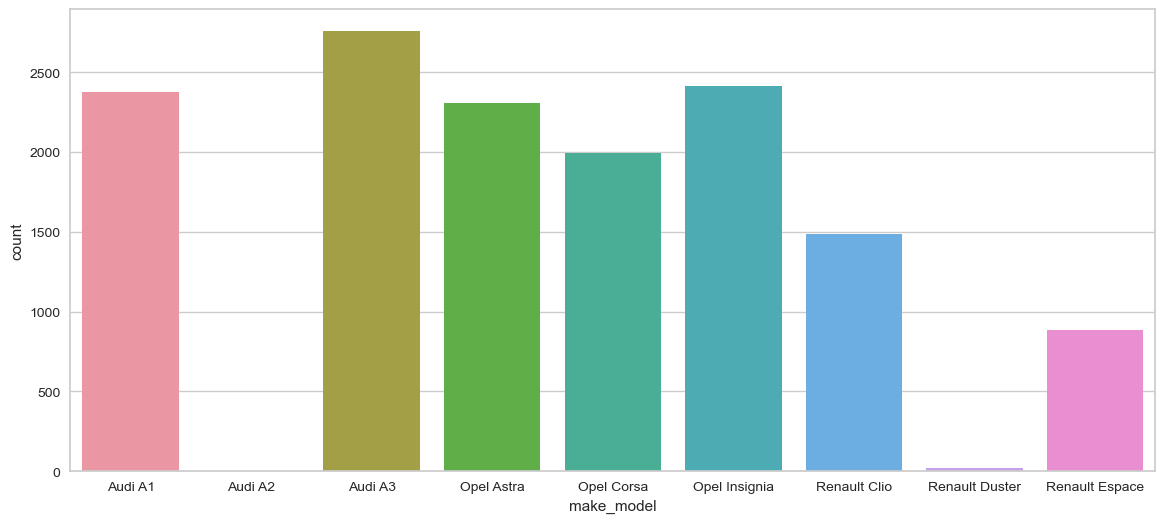

In [12]:
#Seeing the countplot of make_model
sns.countplot(x=df["make_model"])
plt.show()
#As we can see from the graph, we have 9 classes, for Audi A3 and Renault Duster, they are not high at all, and there values
#are so small compared to the others

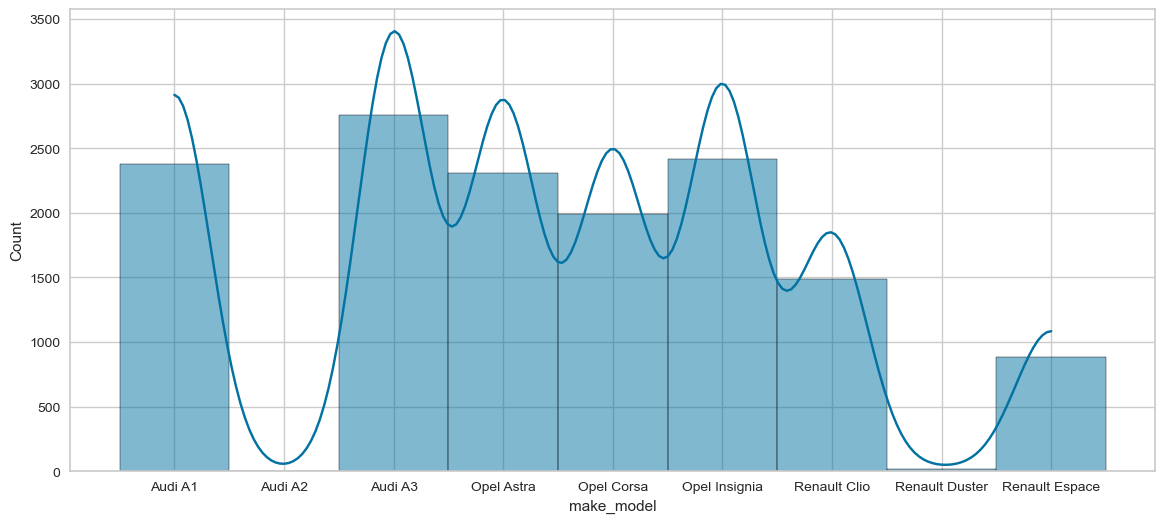

In [13]:
#Seeing the histplot of make_model
sns.histplot(df["make_model"], kde=True)
plt.show()
#We can see the same here as well, the values of Audi A3 and Renault Duster are so small

In [14]:
#Seeing the value counts of make_model
df.make_model.value_counts()
#As we can see, there are some of them have low values, so i am going to drop them (Audi A3 and Renault Duster)

make_model
Audi A3           2758
Opel Insignia     2417
Audi A1           2377
Opel Astra        2305
Opel Corsa        1994
Renault Clio      1486
Renault Espace     884
Renault Duster      20
Audi A2              1
Name: count, dtype: int64

In [15]:
#Making a variable to see the classes that have less than 100, as it may affect the model
low = df.make_model.value_counts()[df.make_model.value_counts() <= 100].index
low

Index(['Renault Duster', 'Audi A2'], dtype='object', name='make_model')

In [16]:
#Dropping the low values of make_model
for i in low:
    drop_index = df[df['make_model'] == i].index
    df.drop(index = drop_index, inplace=True)

df.reset_index(drop=True, inplace=True)

In [17]:
#Seeing the value counts of make_model after dropping
df.make_model.value_counts()
#As we can see, now we do not have classes with less than 100

make_model
Audi A3           2758
Opel Insignia     2417
Audi A1           2377
Opel Astra        2305
Opel Corsa        1994
Renault Clio      1486
Renault Espace     884
Name: count, dtype: int64

### body_type

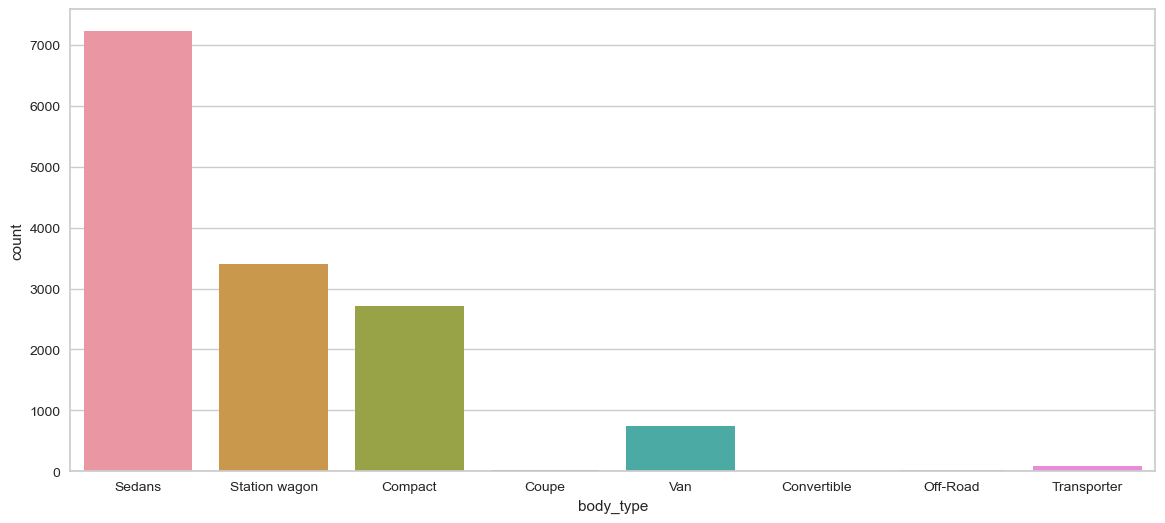

In [18]:
#Seeing the countplot of body_type
sns.countplot(x=df["body_type"])
plt.show()
#As we can see from the graph, we have 8 classes, for coupe, Off-Road, convertible, and Transporter, we can see that they 
#have tiny values.

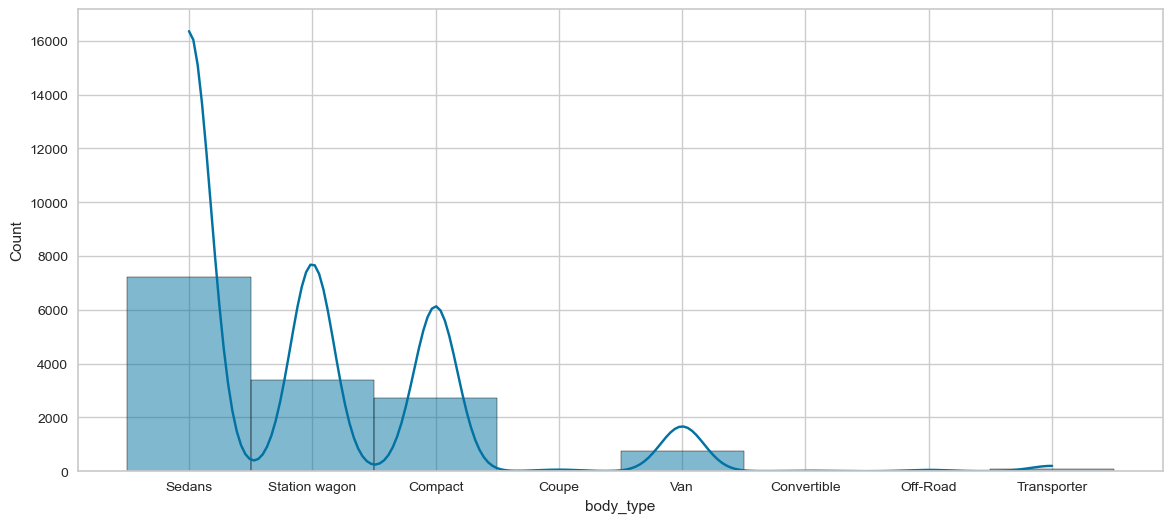

In [19]:
#Seeing the histplot of body_type
sns.histplot(df["body_type"], kde=True)
plt.show()
#We can see the same here as well, for coupe, Off-Road, convertible, and Transporter, we can see that they 
#have tiny values.

In [20]:
#Seeing the value counts of body_type
df.body_type.value_counts()

body_type
Sedans           7230
Station wagon    3405
Compact          2710
Van               735
Transporter        87
Coupe              25
Off-Road           21
Convertible         8
Name: count, dtype: int64

### price

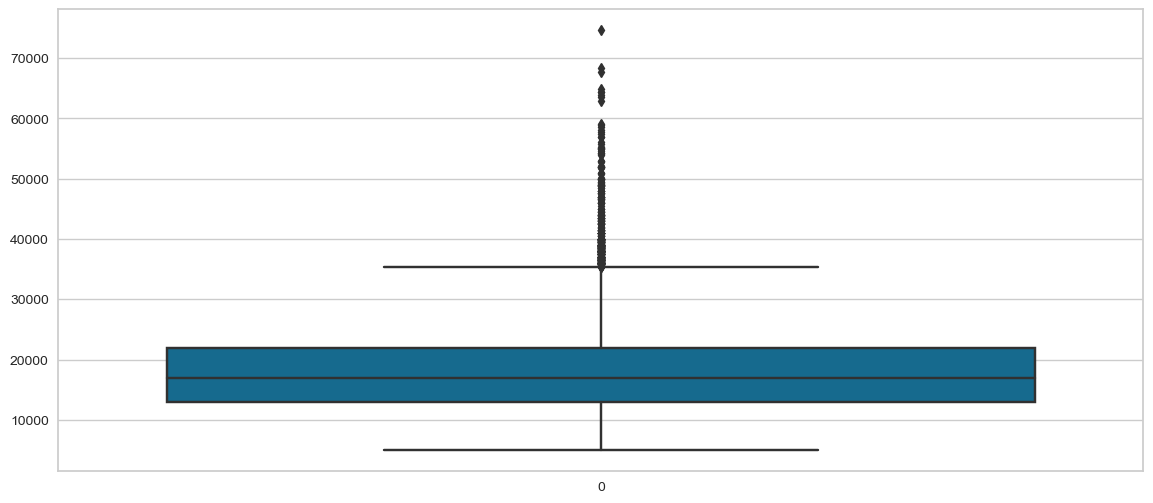

In [21]:
#Seeing teh boxplot of price
sns.boxplot(df['price'])
plt.show()
#As we can see, there are some outliers in price, i am going to drop them in the feature engineering part

In [22]:
#Seeing the value counts of price
df.price.value_counts()

price
14990    124
15990    121
15900    105
17990    100
10990     92
        ... 
20860      1
21005      1
21334      1
21360      1
39875      1
Name: count, Length: 2948, dtype: int64

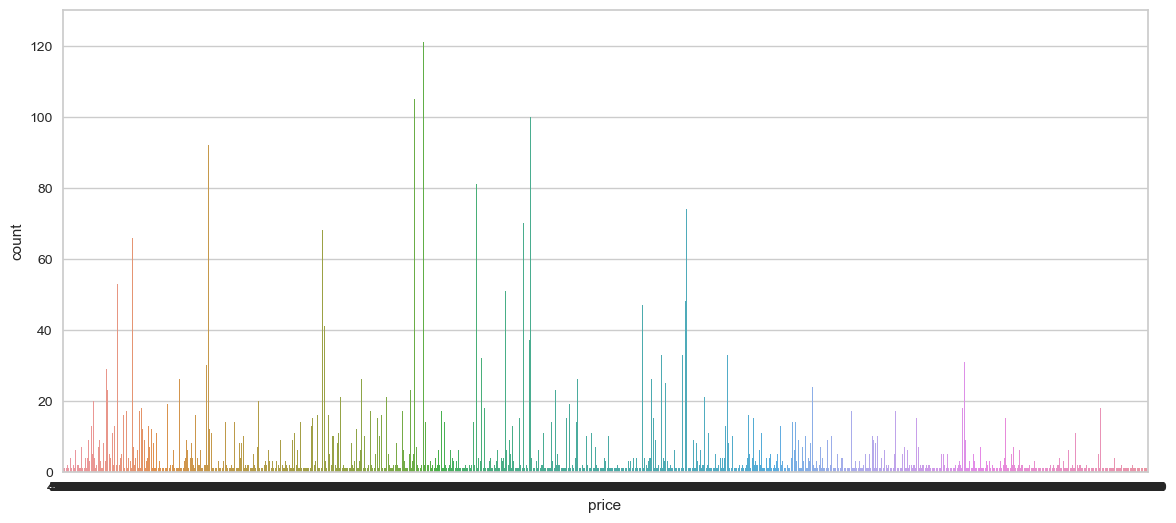

In [23]:
#Seeing the countplot of price
sns.countplot(x=df["price"])
plt.show()
#As we can see from the graph, there are a lot of values. So, it is not shown very well in this countplot

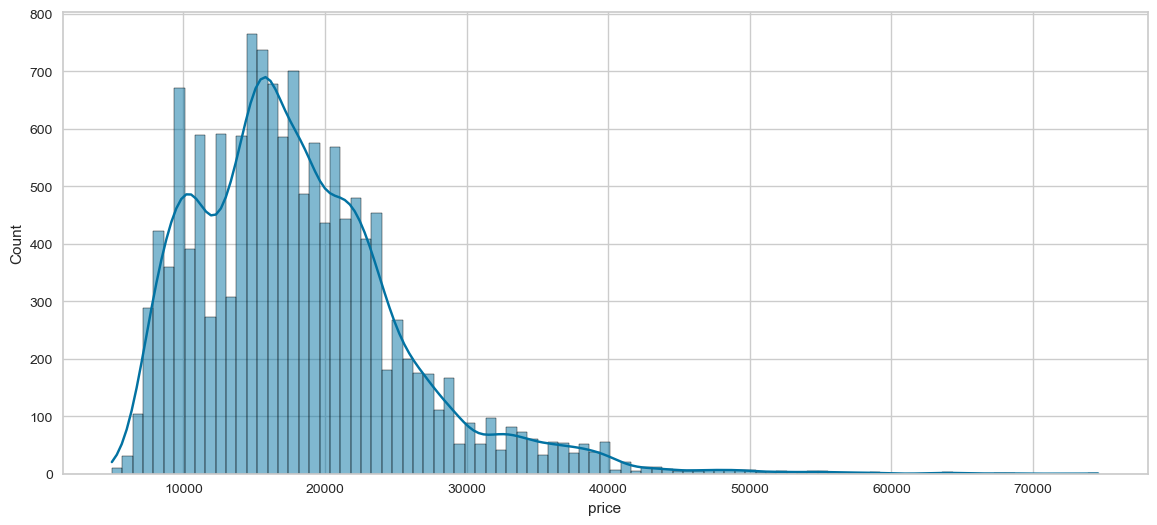

In [24]:
#Seeing the histplot of price
sns.histplot(df["price"], kde=True)
plt.show()
#As we can see, there are low values from about 40000 to 70000

### vat

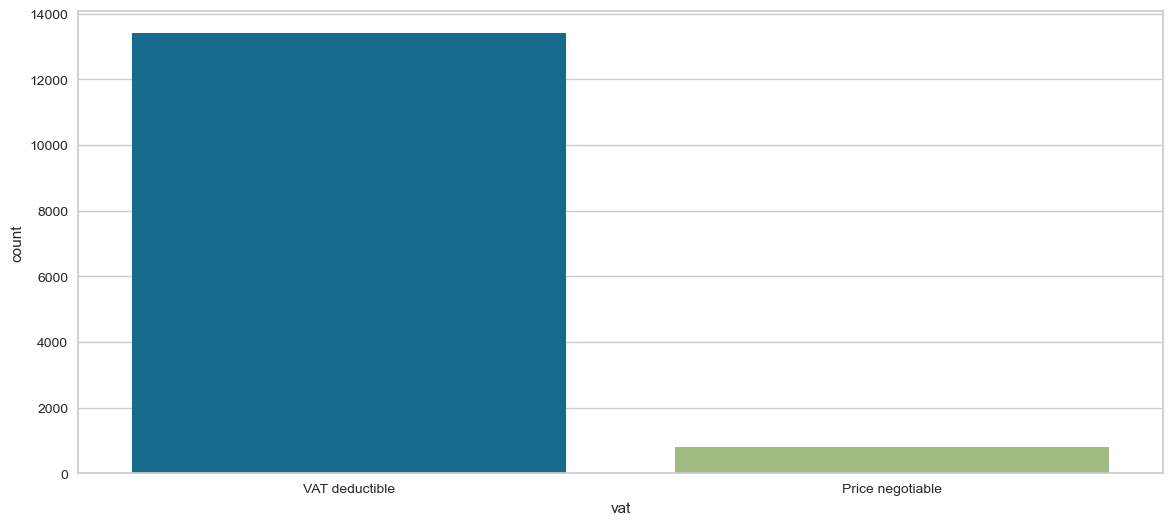

In [25]:
#Seeing the countplot of vat
sns.countplot(x=df["vat"])
plt.show()
#As we can see from the graph, there are two classes, but VAT deductible is more than Price negotiable

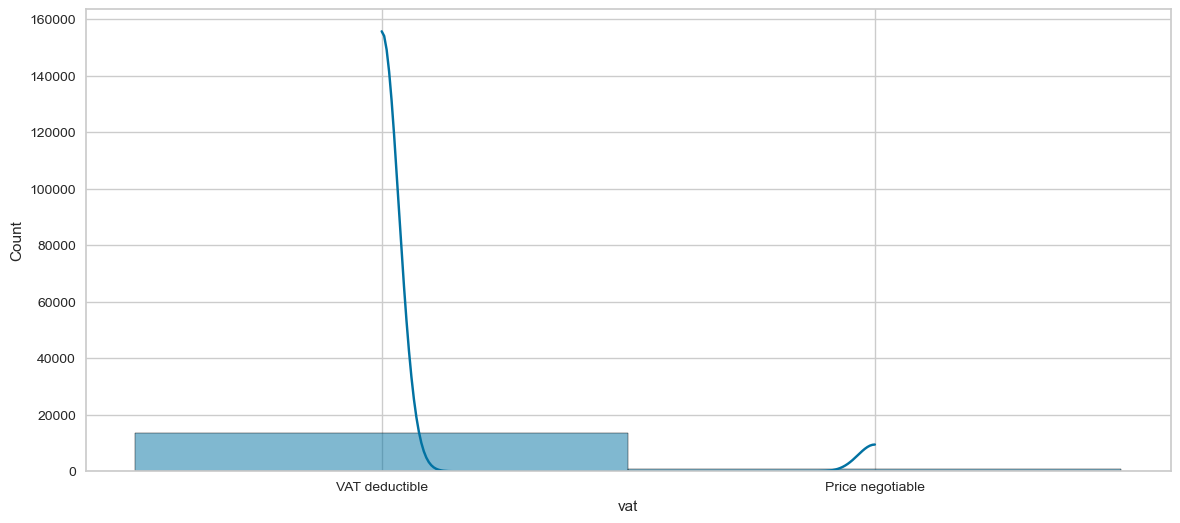

In [26]:
#Seeing the histplot of vat
sns.histplot(df["vat"], kde=True)
plt.show()

In [27]:
#Seeing the value counts of price
df.vat.value_counts()
#We can see from here that VAT deductible has about 13405 and this is more that Price negotiable

vat
VAT deductible      13405
Price negotiable      816
Name: count, dtype: int64

### km

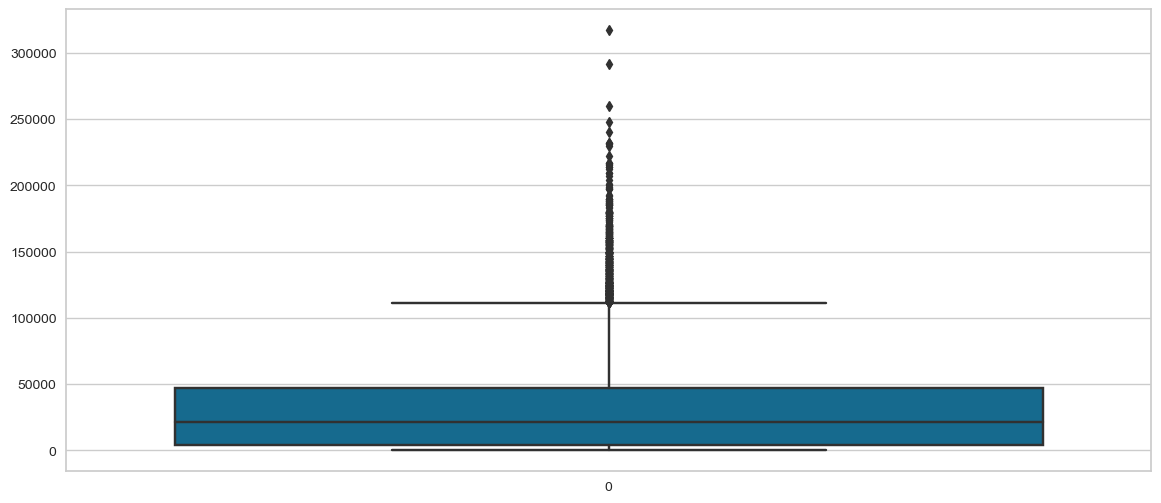

In [28]:
#SEeing teh boxplot of km
sns.boxplot(df['km'])
plt.show()
#As we can see, there are some outliers in km

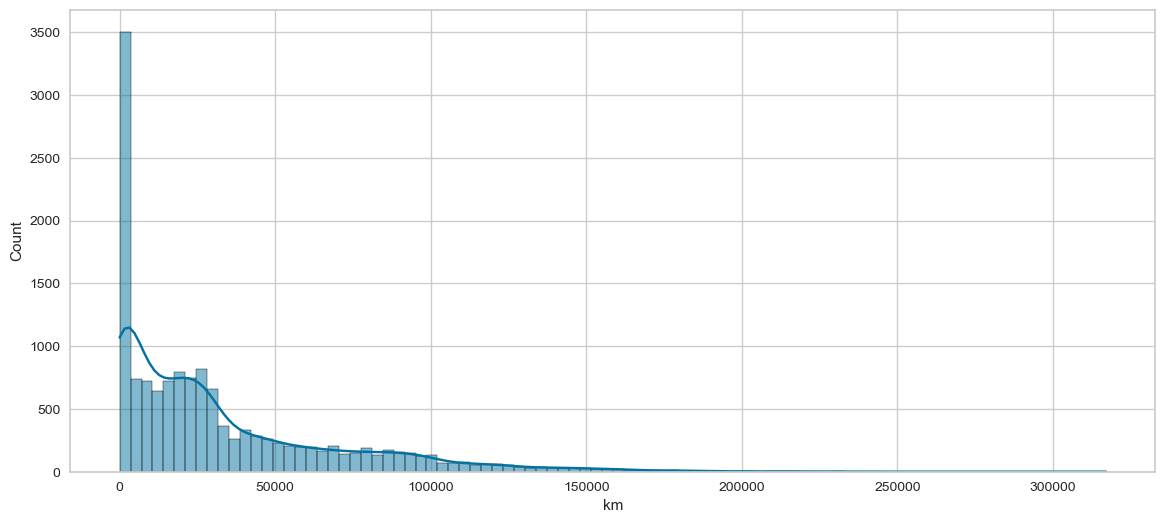

In [29]:
#Seeing the histplot of km
sns.histplot(df["km"], kde=True)
plt.show()

### Type

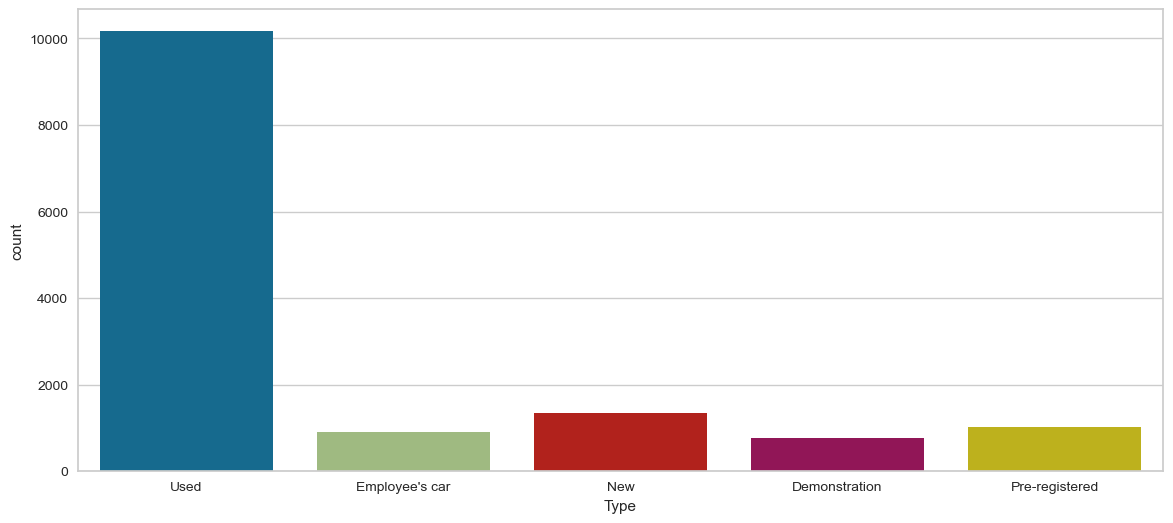

In [30]:
#Seeing the countplot of Type
sns.countplot(x=df["Type"])
plt.show()
#As we can see from the graph, there are 5 classes, and Used has the highest value comapred with the others

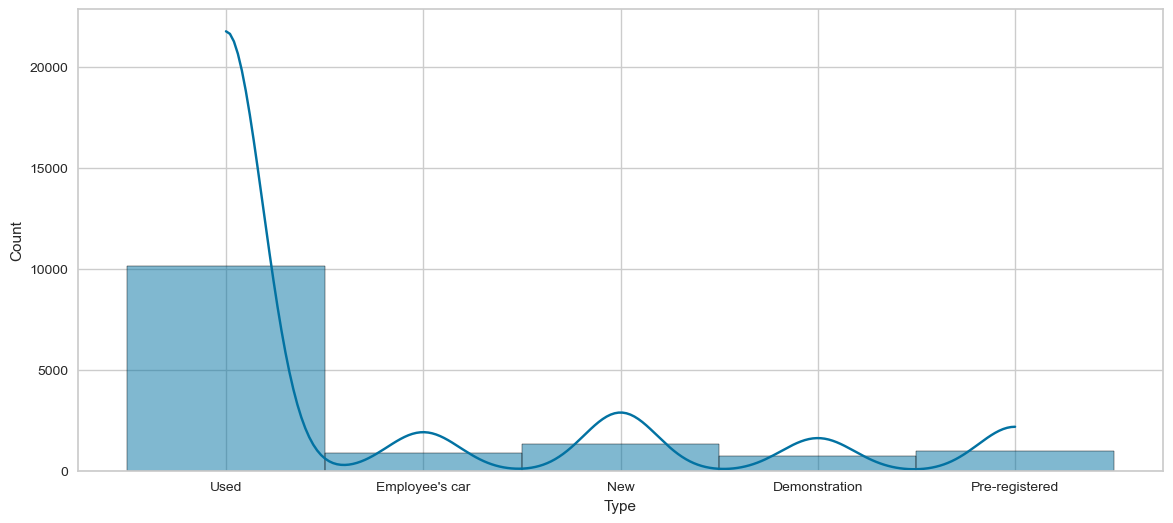

In [31]:
#Seeing the histplot of Type
sns.histplot(df["Type"], kde=True)
plt.show()

### Fuel

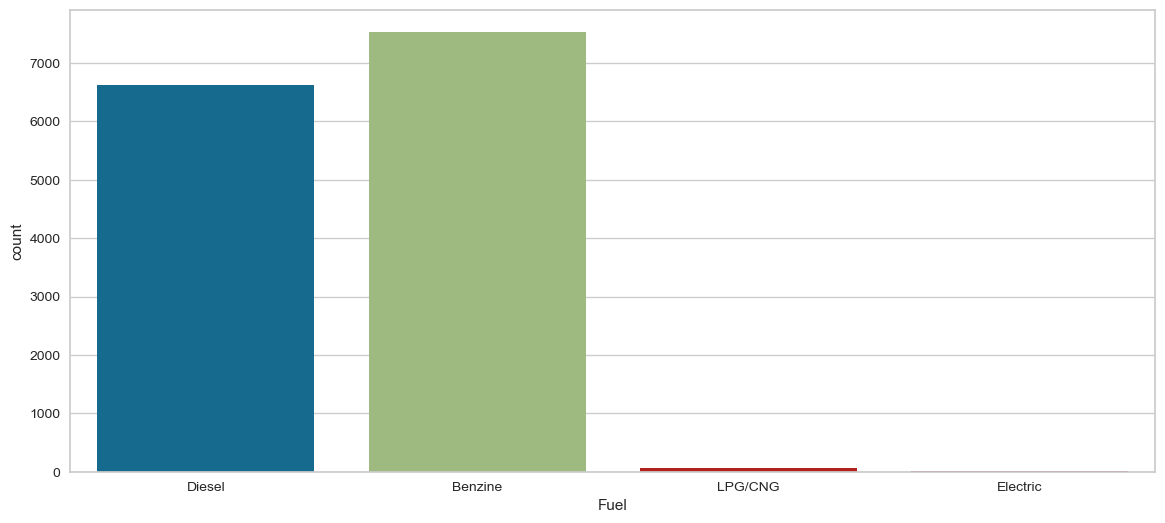

In [32]:
#Seeing the countplot of Fuel
sns.countplot(x=df["Fuel"])
plt.show()
#As we can see from the graph, there are 4 classes, the most used ones are Diesel and Benzine

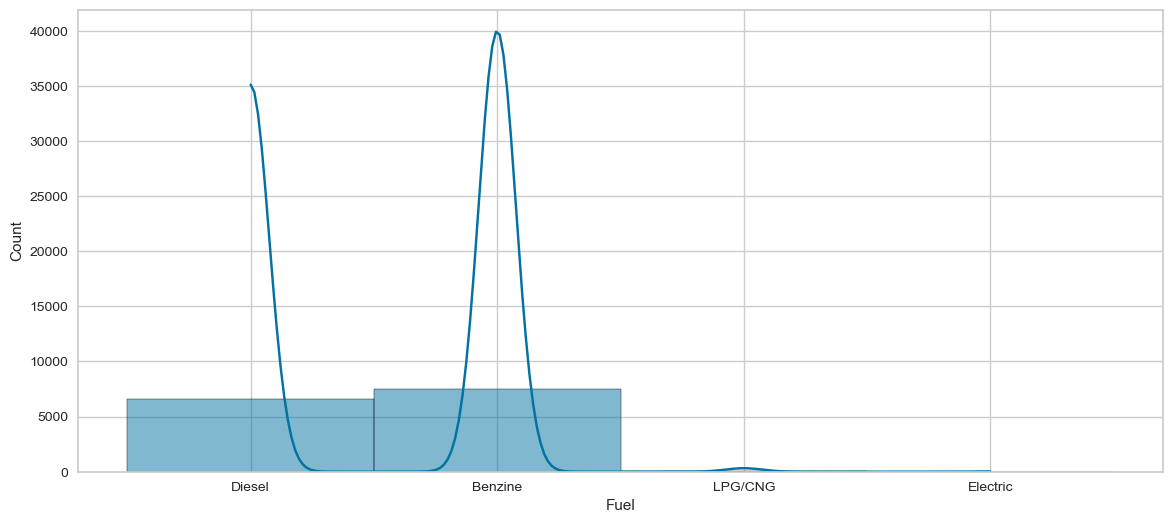

In [33]:
#Seeing the histplot of Fuel
sns.histplot(df["Fuel"], kde=True)
plt.show()

### Gears

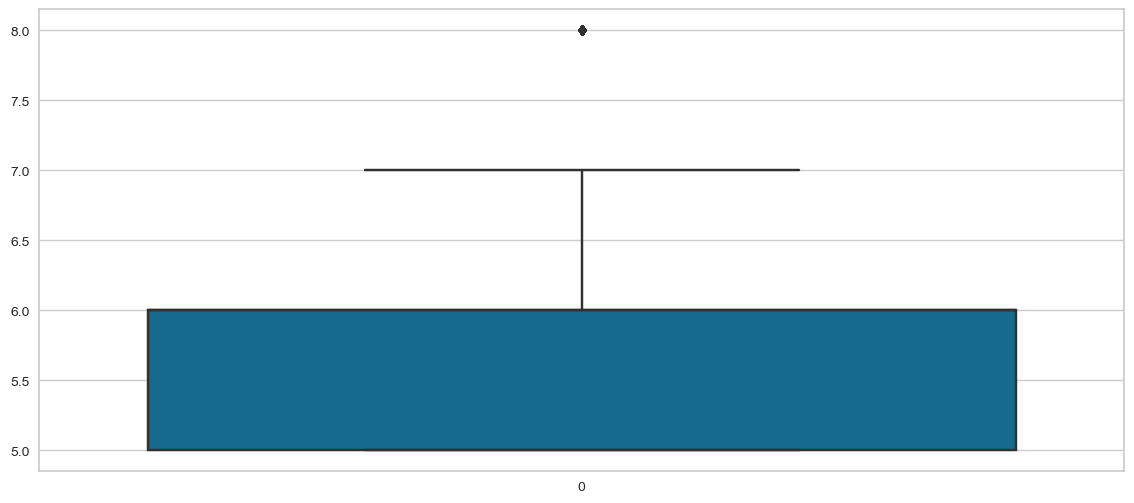

In [34]:
#SEeing teh boxplot of Gears
sns.boxplot(df['Gears'])
plt.show()
#As we can see, there are some outliers in Gears

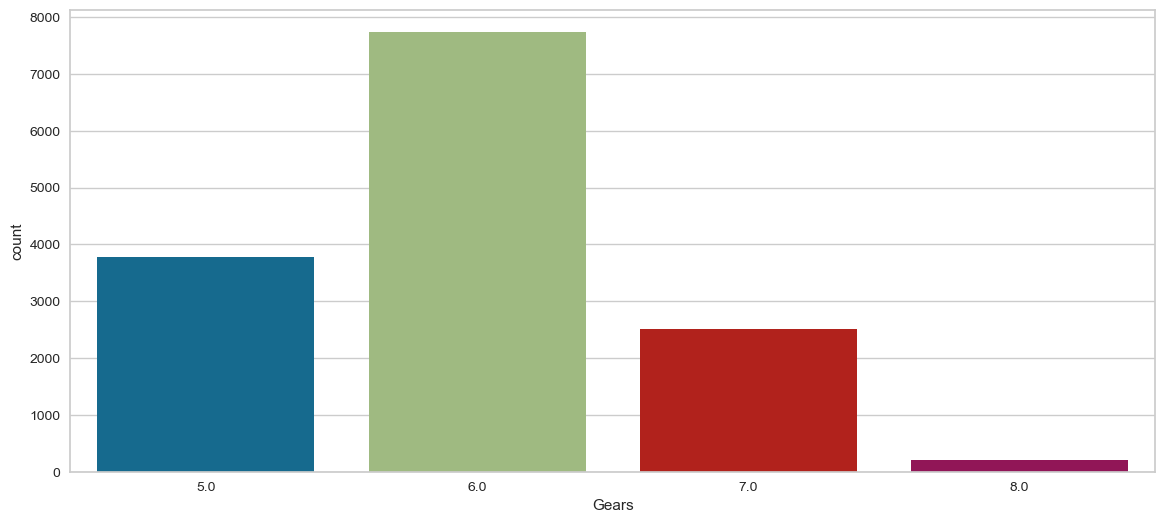

In [35]:
#Seeing the countplot of Gears
sns.countplot(x=df["Gears"])
plt.show()
#As we can see from the graph, there are 4 classes, the most used ones is 6.0, but 8.0 is not used so much

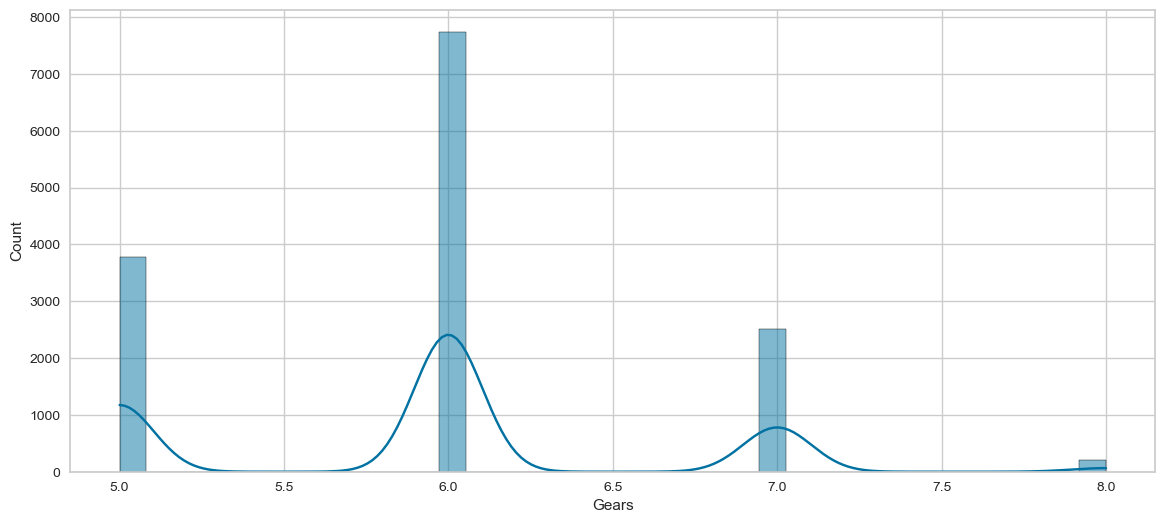

In [36]:
#Seeing the histplot of Gears
sns.histplot(df["Gears"], kde=True)
plt.show()

### Comfort_Convenience 

In [37]:
#Seeing the Comfort_Convenience
df["Comfort_Convenience"]
#As we can see, this is not good for plotting, so i am not going to plot this one

0        Air conditioning,Armrest,Automatic climate con...
1        Air conditioning,Automatic climate control,Hil...
2        Air conditioning,Cruise control,Electrical sid...
3        Air suspension,Armrest,Auxiliary heating,Elect...
4        Air conditioning,Armrest,Automatic climate con...
                               ...                        
14216    Air conditioning,Armrest,Automatic climate con...
14217    Air conditioning,Automatic climate control,Cru...
14218    Air conditioning,Armrest,Automatic climate con...
14219    Air conditioning,Automatic climate control,Cru...
14220    Air conditioning,Armrest,Automatic climate con...
Name: Comfort_Convenience, Length: 14221, dtype: object

### Entertainment_Media

In [38]:
#Seeing Entertainment_Media
df["Entertainment_Media"]
#As we can see, this is not good for plotting, so i am not going to plot this one

0        Bluetooth,Hands-free equipment,On-board comput...
1        Bluetooth,Hands-free equipment,On-board comput...
2                                    MP3,On-board computer
3        Bluetooth,CD player,Hands-free equipment,MP3,O...
4        Bluetooth,CD player,Hands-free equipment,MP3,O...
                               ...                        
14216    Bluetooth,Digital radio,Hands-free equipment,O...
14217    Bluetooth,Digital radio,Hands-free equipment,O...
14218    Bluetooth,Digital radio,Hands-free equipment,M...
14219    Bluetooth,Digital radio,Hands-free equipment,R...
14220    Bluetooth,Hands-free equipment,On-board comput...
Name: Entertainment_Media, Length: 14221, dtype: object

###  Extras

In [39]:
#Seeing Extras
df["Extras"]
#As we can see, this is not good for plotting, so i am not going to plot this one

0           Alloy wheels,Catalytic Converter,Voice Control
1        Alloy wheels,Sport seats,Sport suspension,Voic...
2                               Alloy wheels,Voice Control
3                   Alloy wheels,Sport seats,Voice Control
4        Alloy wheels,Sport package,Sport suspension,Vo...
                               ...                        
14216              Alloy wheels,Touch screen,Voice Control
14217                            Alloy wheels,Touch screen
14218    Alloy wheels,Catalytic Converter,Sport suspens...
14219              Alloy wheels,Touch screen,Voice Control
14220                                         Alloy wheels
Name: Extras, Length: 14221, dtype: object

### Safety_Security 

In [40]:
#Seeing Safety_Security
df["Safety_Security"]
#As we can see, this is not good for plotting, so i am not going to plot this one

0        ABS,Central door lock,Daytime running lights,D...
1        ABS,Central door lock,Central door lock with r...
2        ABS,Central door lock,Daytime running lights,D...
3        ABS,Alarm system,Central door lock with remote...
4        ABS,Central door lock,Driver-side airbag,Elect...
                               ...                        
14216    ABS,Adaptive Cruise Control,Central door lock,...
14217    ABS,Central door lock,Central door lock with r...
14218    ABS,Adaptive Cruise Control,Blind spot monitor...
14219    ABS,Adaptive Cruise Control,Blind spot monitor...
14220    ABS,Adaptive Cruise Control,Blind spot monitor...
Name: Safety_Security, Length: 14221, dtype: object

### age 

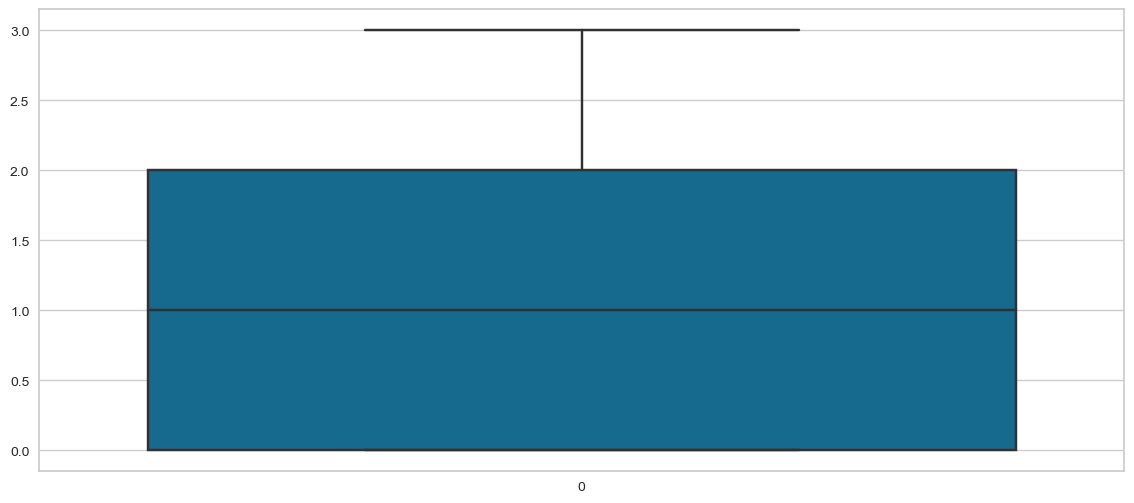

In [41]:
#Seeing teh boxplot of age
sns.boxplot(df['age'])
plt.show()
#As we can see, there is no outliers

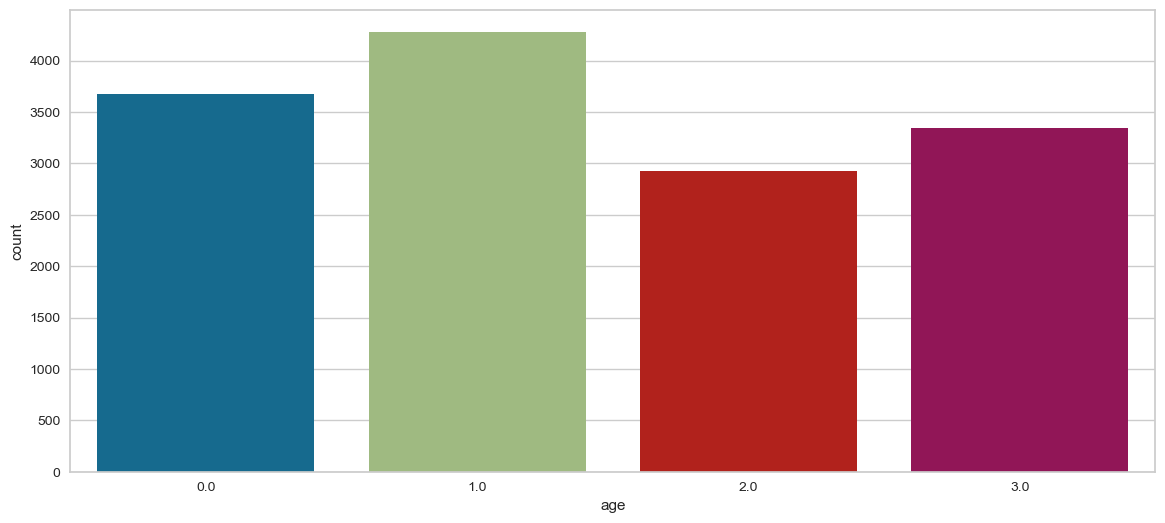

In [42]:
#Seeing the countplot of age
sns.countplot(x=df["age"])
plt.show()
#As we can see from the graph, there are 4 classes and class one is the highest

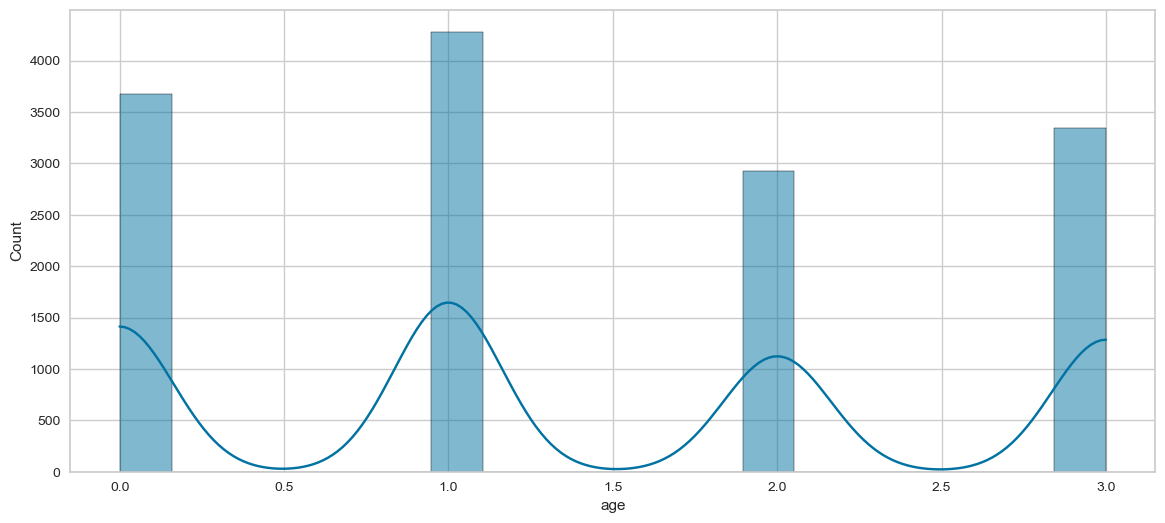

In [43]:
#Seeing the histplot of age
sns.histplot(df["age"], kde=True)
plt.show()

### Previous_Owners 

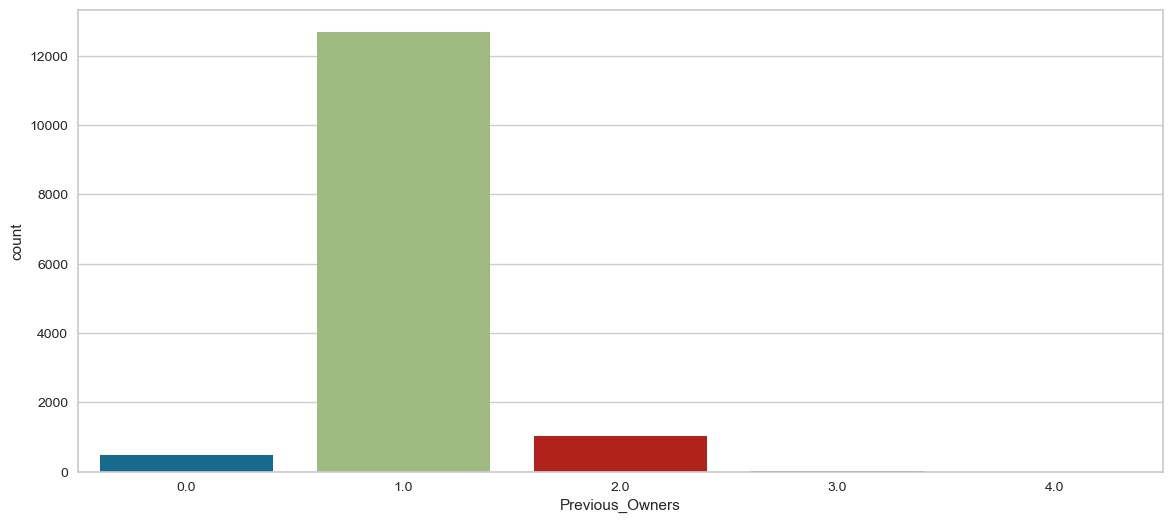

In [44]:
#Seeing the countplot of Previous_Owners
sns.countplot(x=df["Previous_Owners"])
plt.show()
#As we can see from the graph, there are 5 classes, class 1 is the highest compared with the tiny values of the others

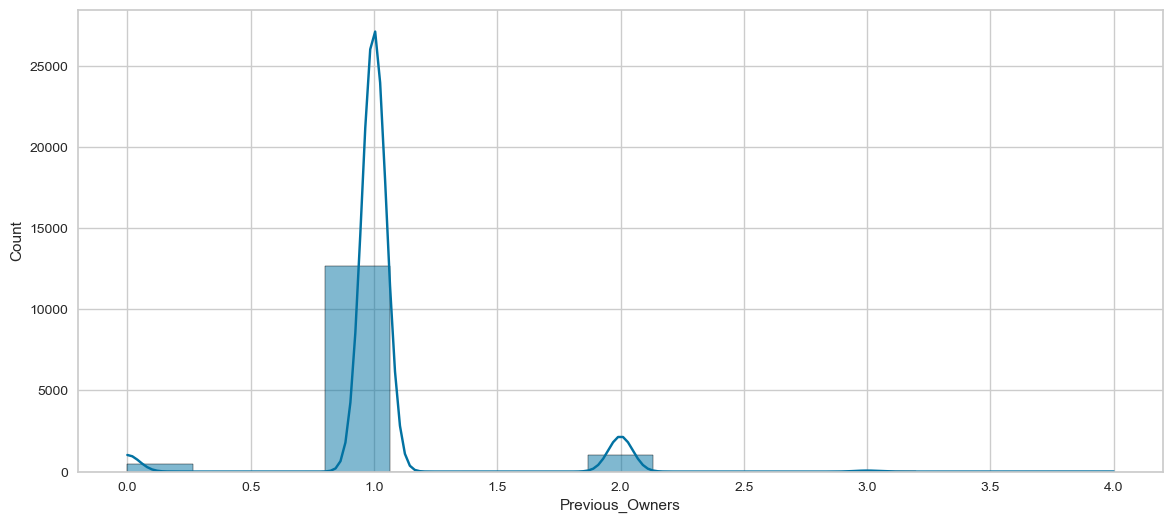

In [45]:
#Seeing the histplot of Previous_Owners
sns.histplot(df["Previous_Owners"], kde=True)
plt.show()

### hp_kW 

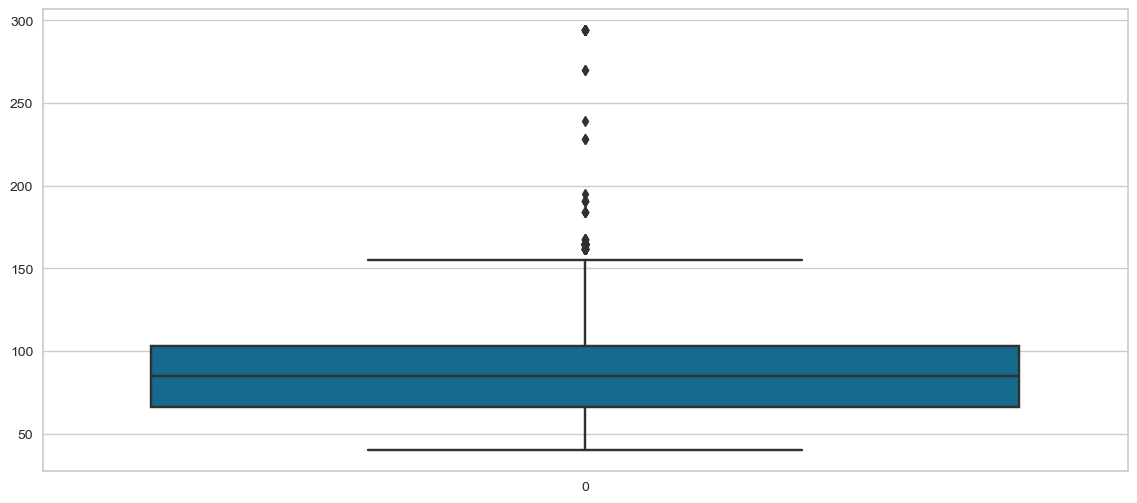

In [46]:
#SEeing teh boxplot of hp_kW
sns.boxplot(df['hp_kW'])
plt.show()
#As we can see, there are some outliers in hp_kW

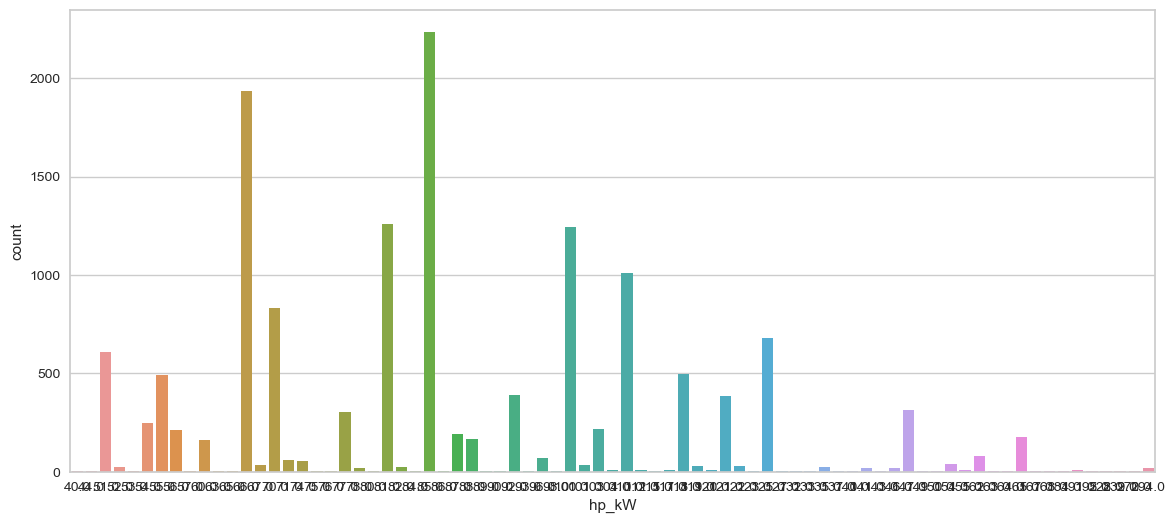

In [47]:
#Seeing the countplot of hp_kW
sns.countplot(x=df["hp_kW"])
plt.show()

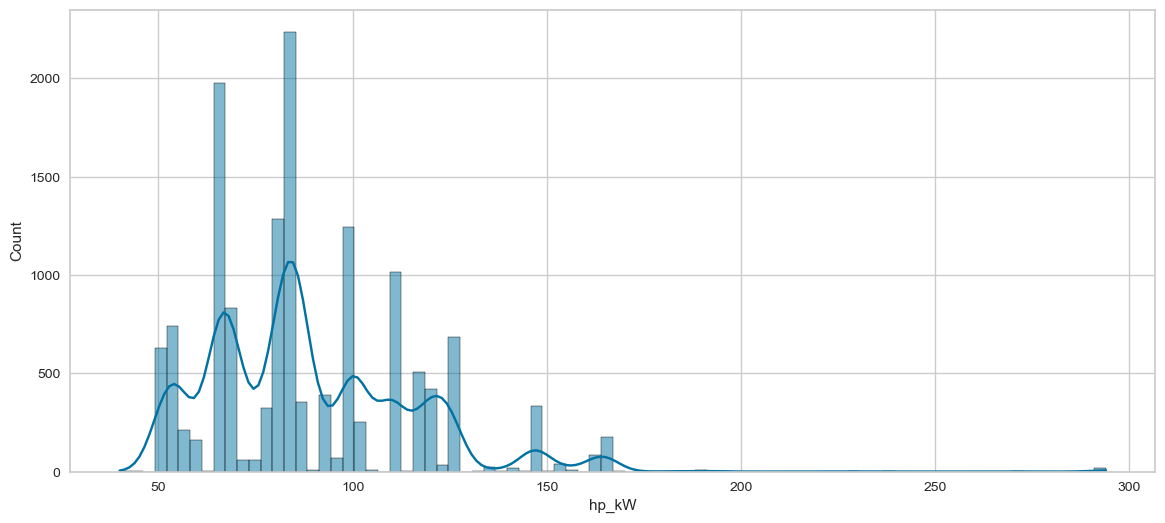

In [48]:
#Seeing the histplot of hp_kW
sns.histplot(df["hp_kW"], kde=True)
plt.show()

### Inspection_new 
       

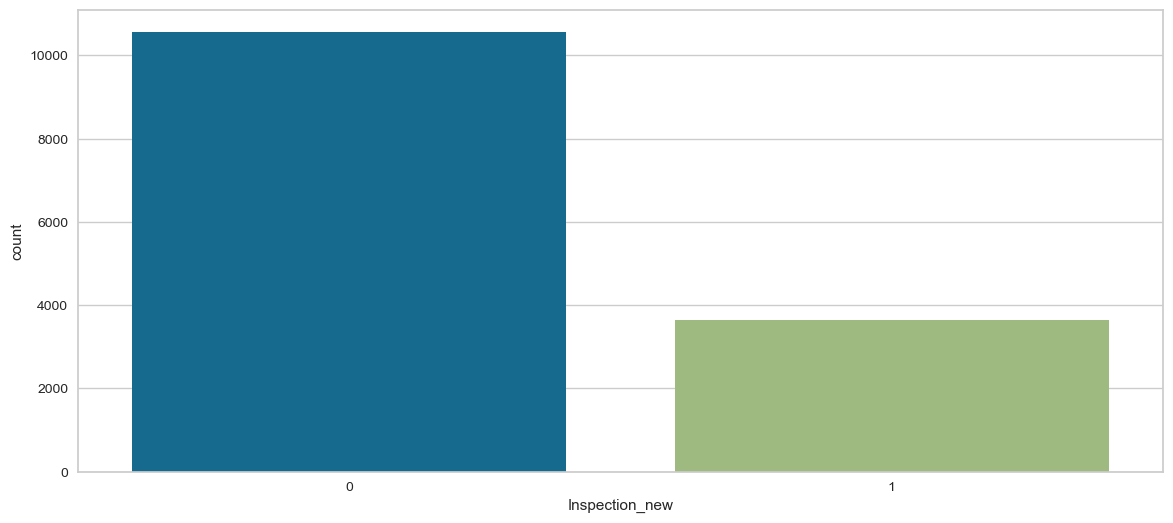

In [49]:
#Seeing the countplot of Inspection_new
sns.countplot(x=df["Inspection_new"])
plt.show()
#As we can see from the graph, there are 2 classes, class 0 is the highest compared to class 1

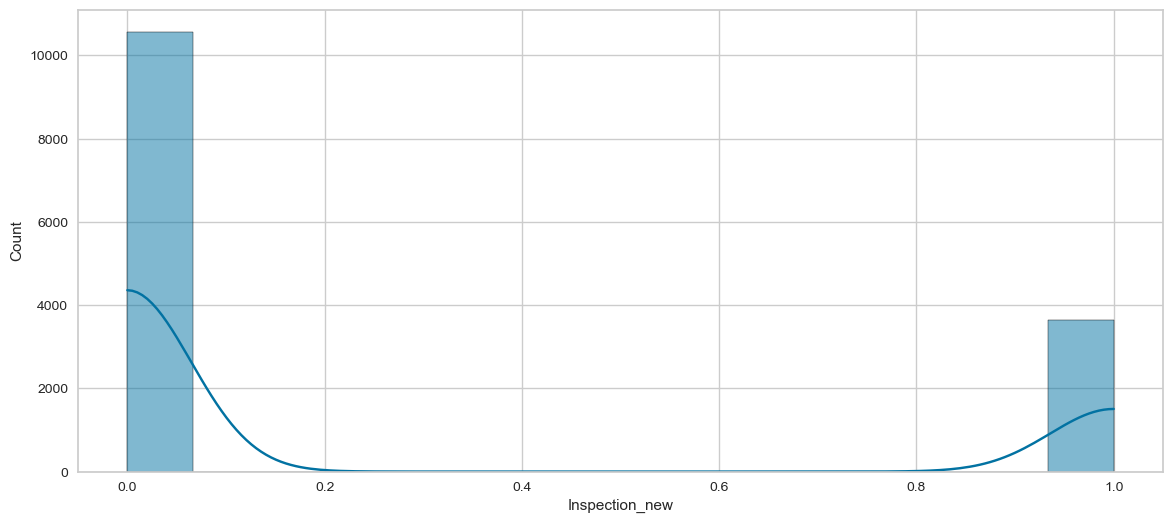

In [50]:
#Seeing the histplot of Inspection_new
sns.histplot(df["Inspection_new"], kde=True)
plt.show()

### Paint_Type 

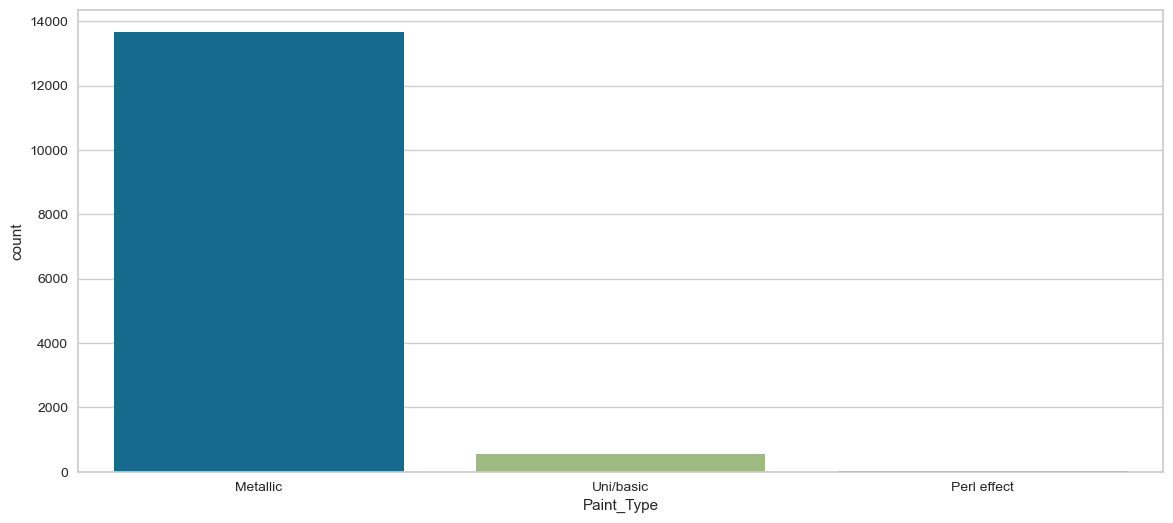

In [51]:
#Seeing the countplot of Paint_Type
sns.countplot(x=df["Paint_Type"])
plt.show()
#As we can see from the graph, there are 3 classes, Metalic has a lot of values but the others have so small values

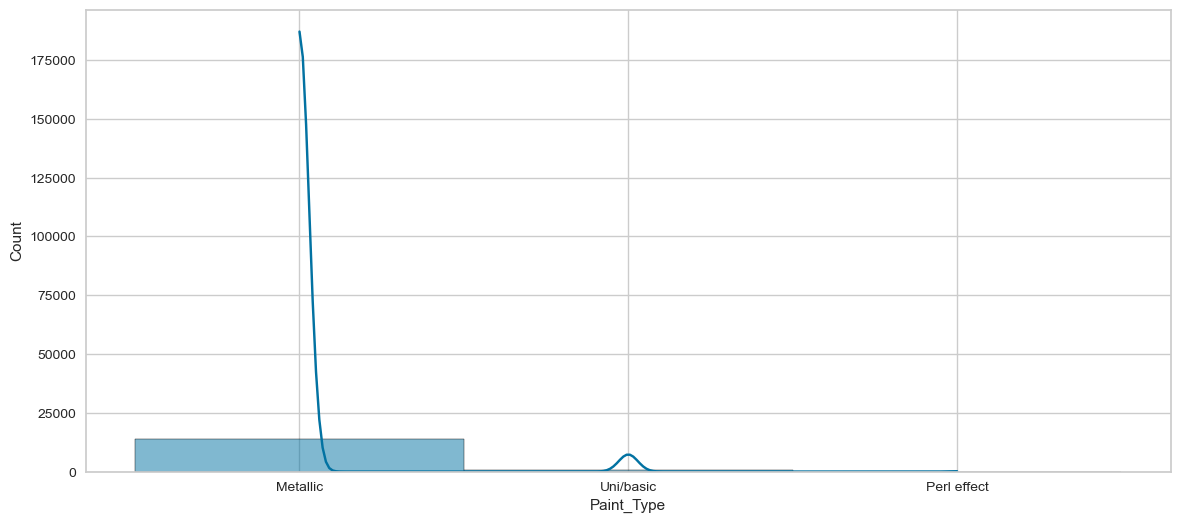

In [52]:
#Seeing the histplot of Paint_Type
sns.histplot(df["Paint_Type"], kde=True)
plt.show()

### Upholstery_type 

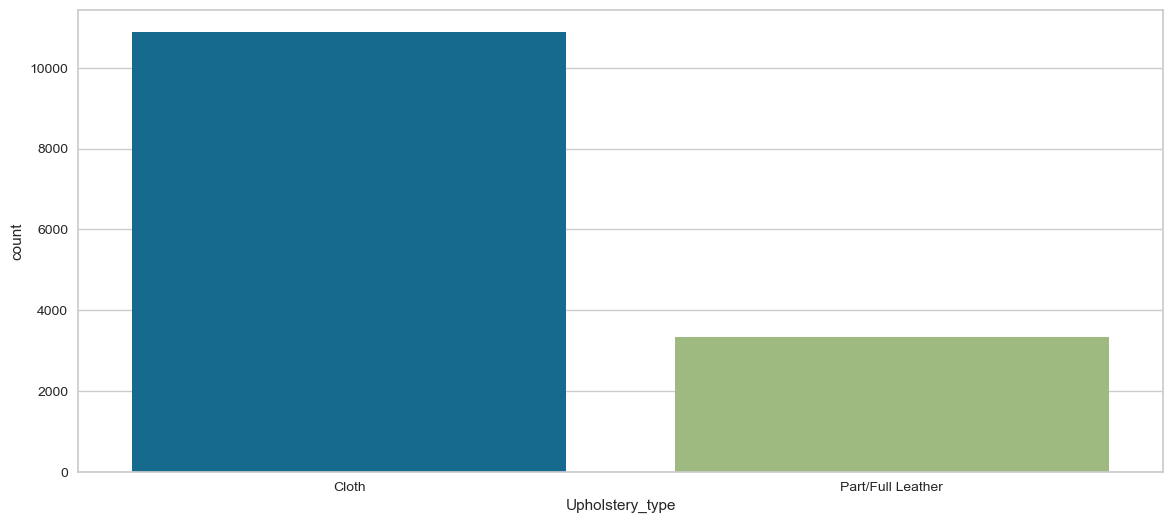

In [53]:
#Seeing the countplot of Upholstery_type
sns.countplot(x=df["Upholstery_type"])
plt.show()
#As we can see from the graph, there are 2 classes, Cloth has a lot of values. which means most of the cars have it

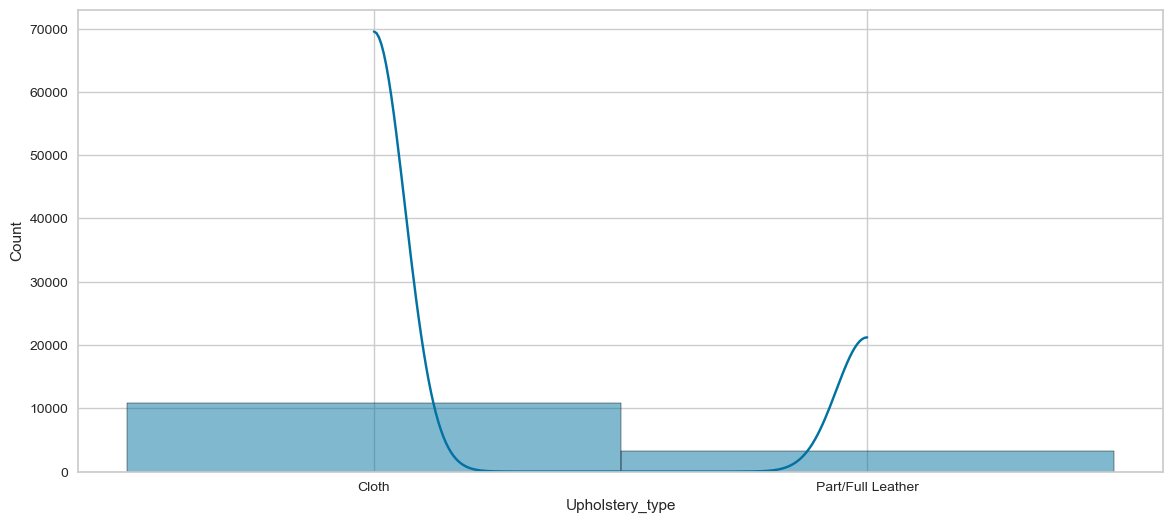

In [54]:
#Seeing the histplot of Upholstery_type
sns.histplot(df["Upholstery_type"], kde=True)
plt.show()

### Gearing_Type 

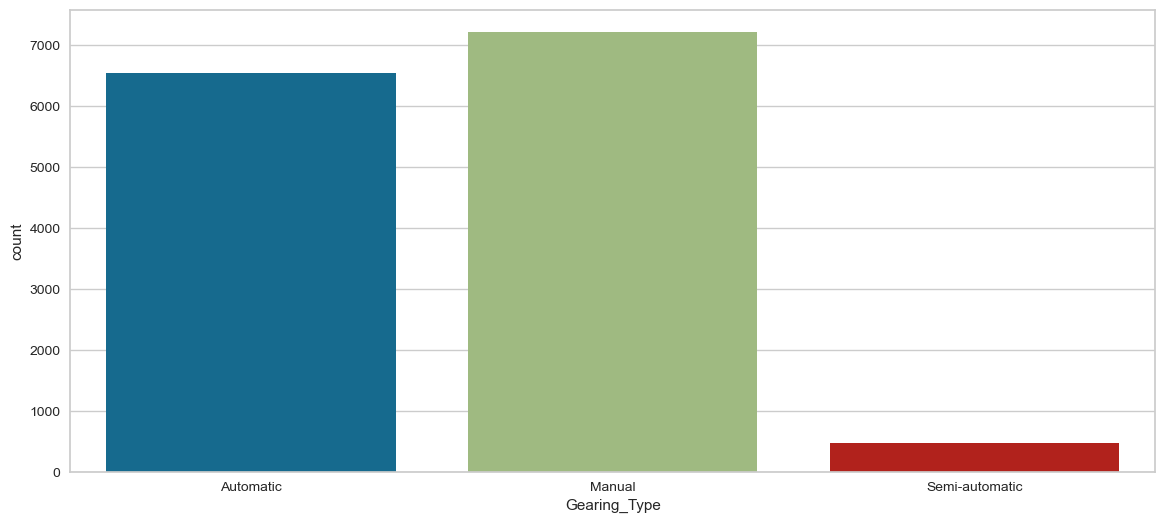

In [55]:
#Seeing the countplot of Gearing_Type
sns.countplot(x=df["Gearing_Type"])
plt.show()
#As we can see from the graph, there are 3 classes, Semi-automatic does not have a lot of values compared with the others

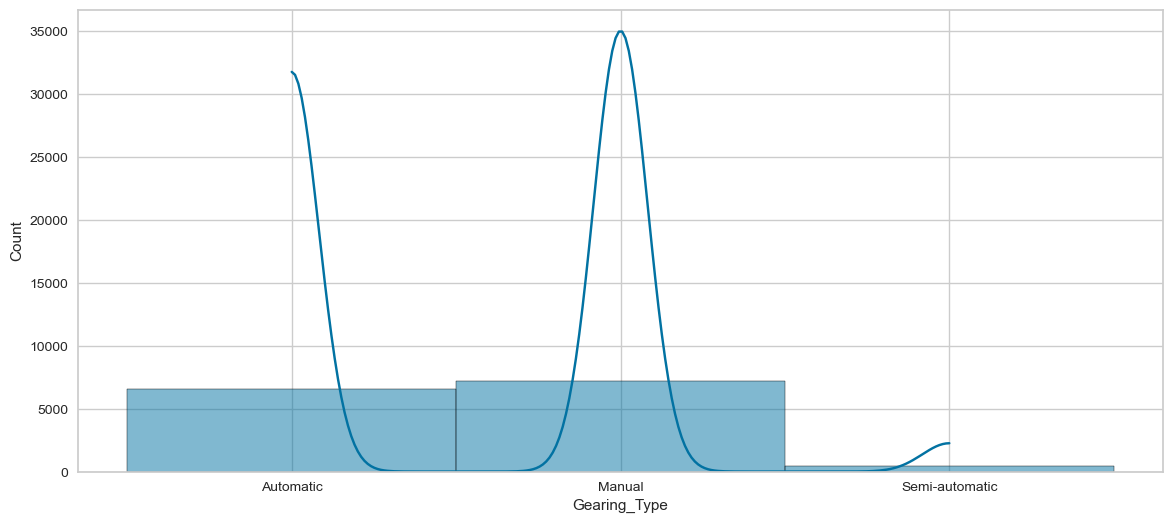

In [56]:
#Seeing the histplot of Gearing_Type
sns.histplot(df["Gearing_Type"], kde=True)
plt.show()

### Displacement_cc
      

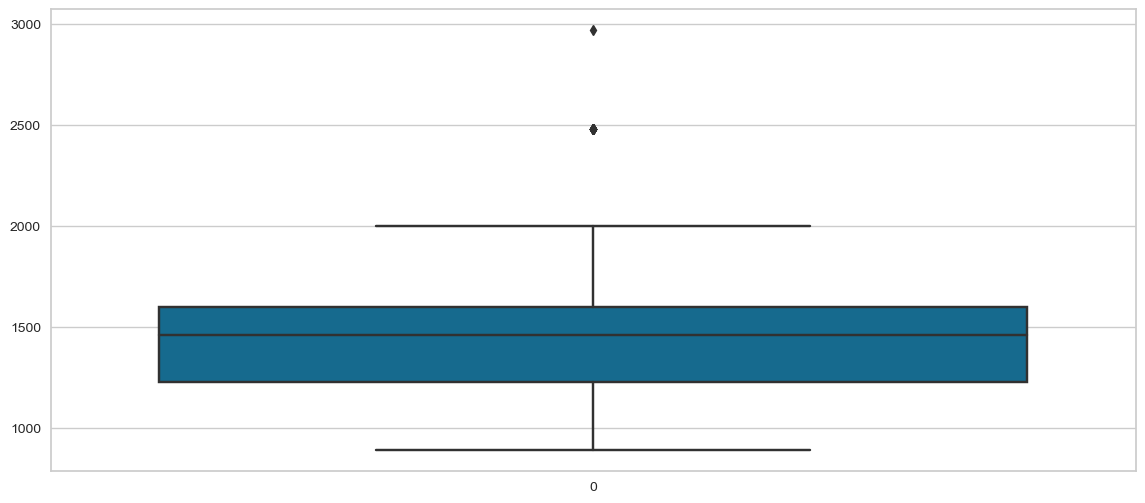

In [57]:
#SEeing teh boxplot of Displacement_cc
sns.boxplot(df['Displacement_cc'])
plt.show()
#As we can see, there are some outliers in Displacement_cc

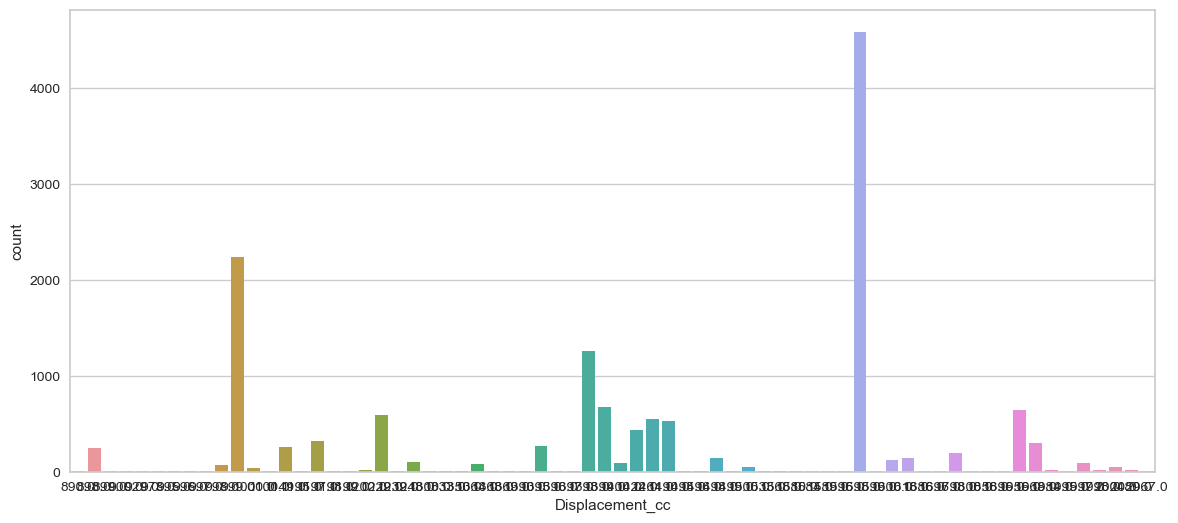

In [58]:
#Seeing the countplot of Displacement_cc
sns.countplot(x=df["Displacement_cc"])
plt.show()

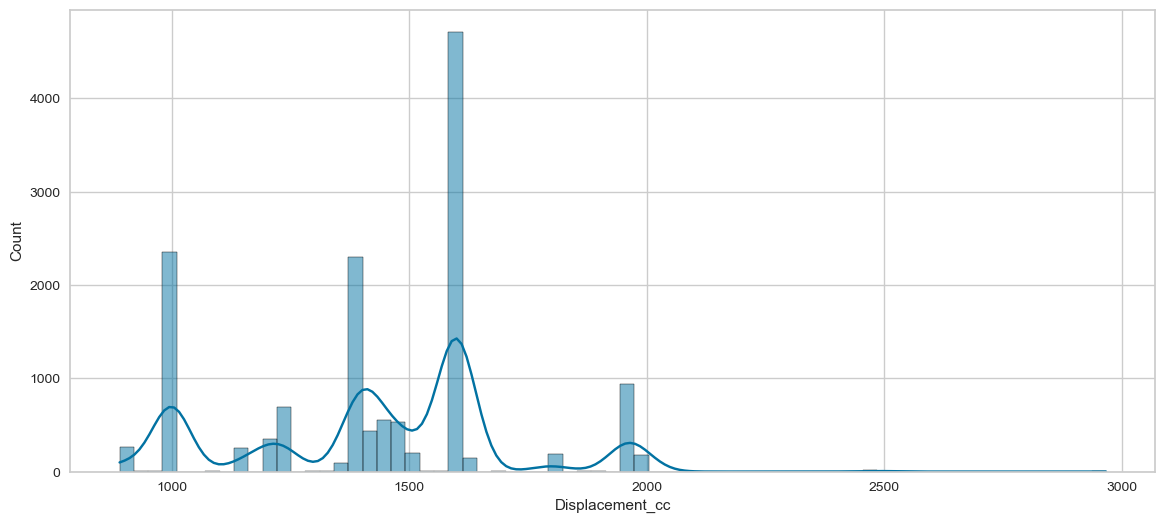

In [59]:
#Seeing the histplot of Displacement_cc
sns.histplot(df["Displacement_cc"], kde=True)
plt.show()

###  Weight_kg 

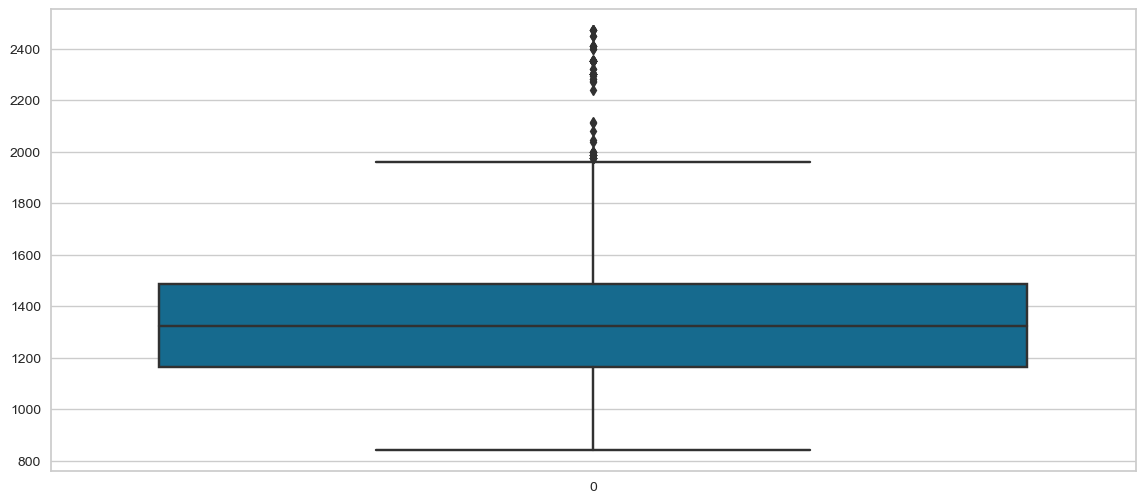

In [60]:
#SEeing teh boxplot of Weight_kg
sns.boxplot(df['Weight_kg'])
plt.show()
#As we can see, there are some outliers in Weight_kg

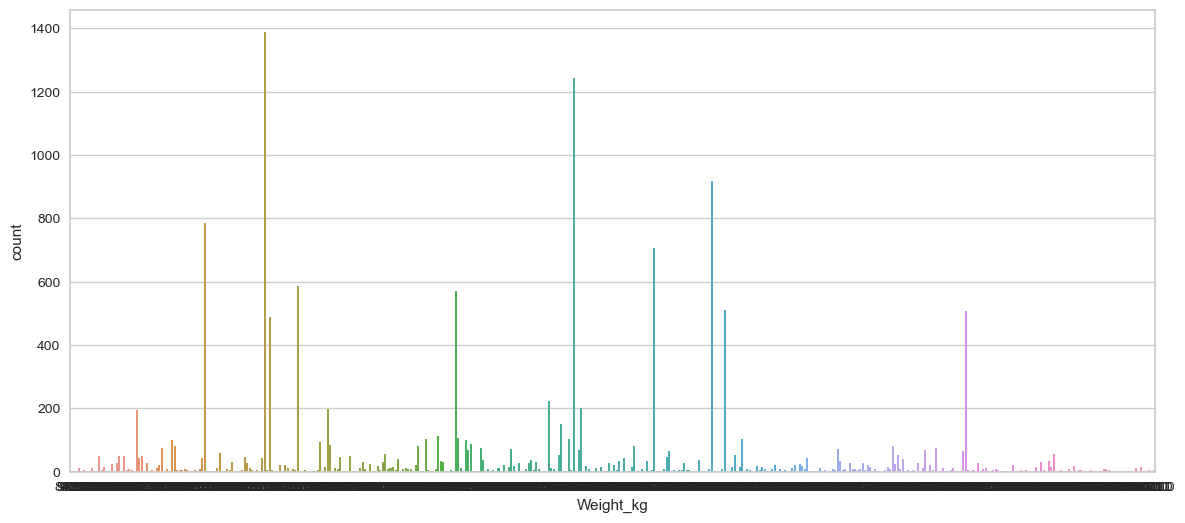

In [61]:
#Seeing the countplot of Weight_kg
sns.countplot(x=df["Weight_kg"])
plt.show()

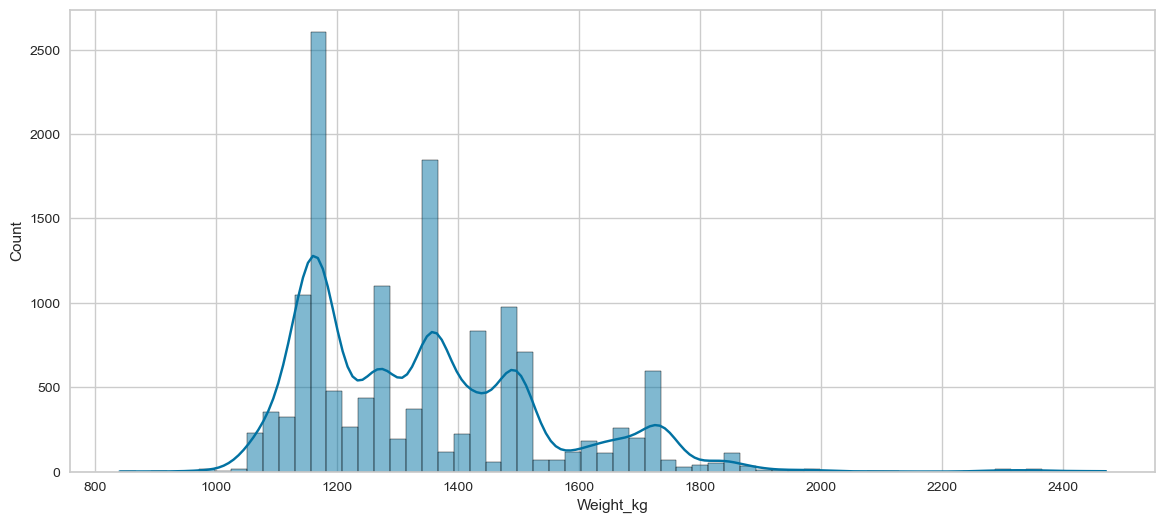

In [62]:
#Seeing the histplot of Weight_kg
sns.histplot(df["Weight_kg"], kde=True)
plt.show()
#As we can see, most of the values are located between 1000 and 1700

### Drive_chain 

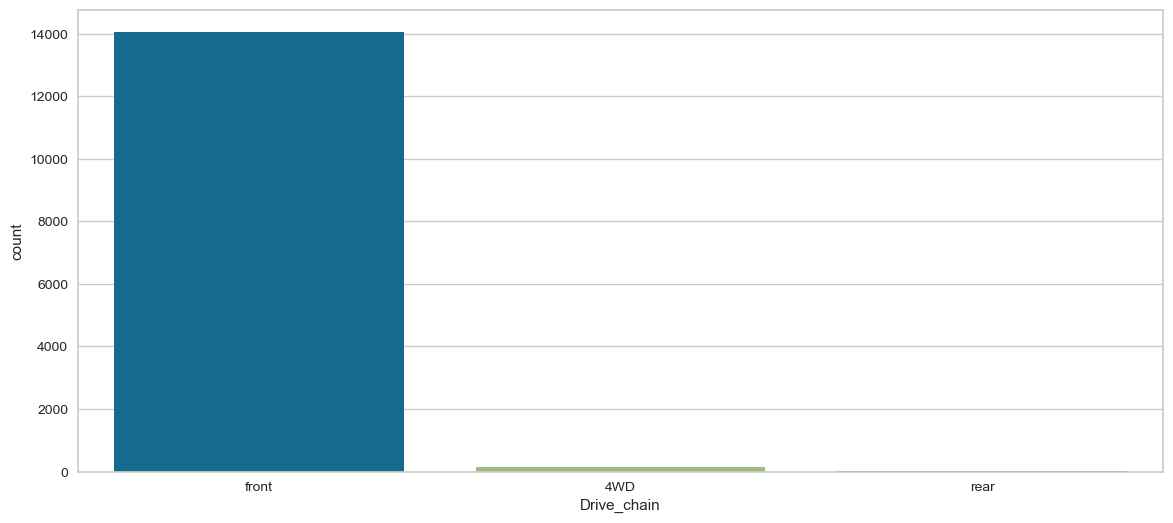

In [63]:
#Seeing the countplot of Drive_chain
sns.countplot(x=df["Drive_chain"])
plt.show()
#As we can see from the graph, there are 3 classes, front has a lot of values, but the others have only tiny values

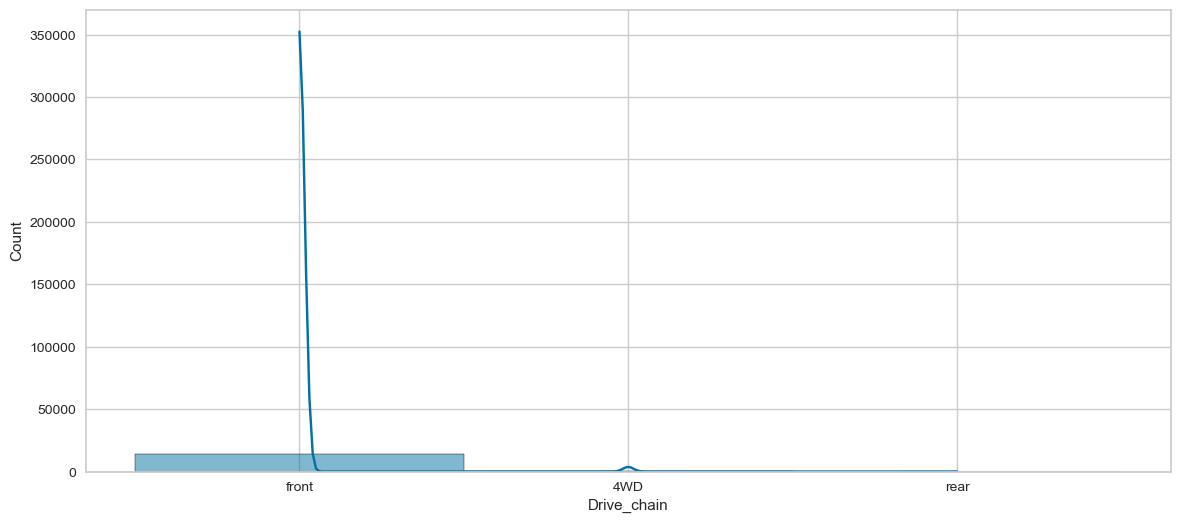

In [64]:
#Seeing the histplot of Drive_chain
sns.histplot(df["Drive_chain"], kde=True)
plt.show()

### cons_comb

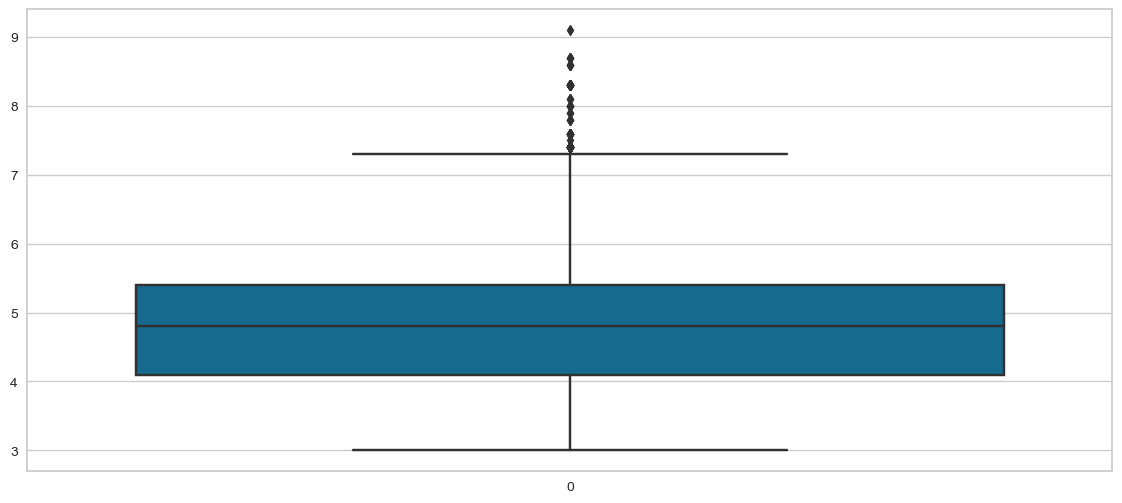

In [65]:
#SEeing teh boxplot of cons_comb
sns.boxplot(df['cons_comb'])
plt.show()
#As we can see, there are some outliers in cons_comb

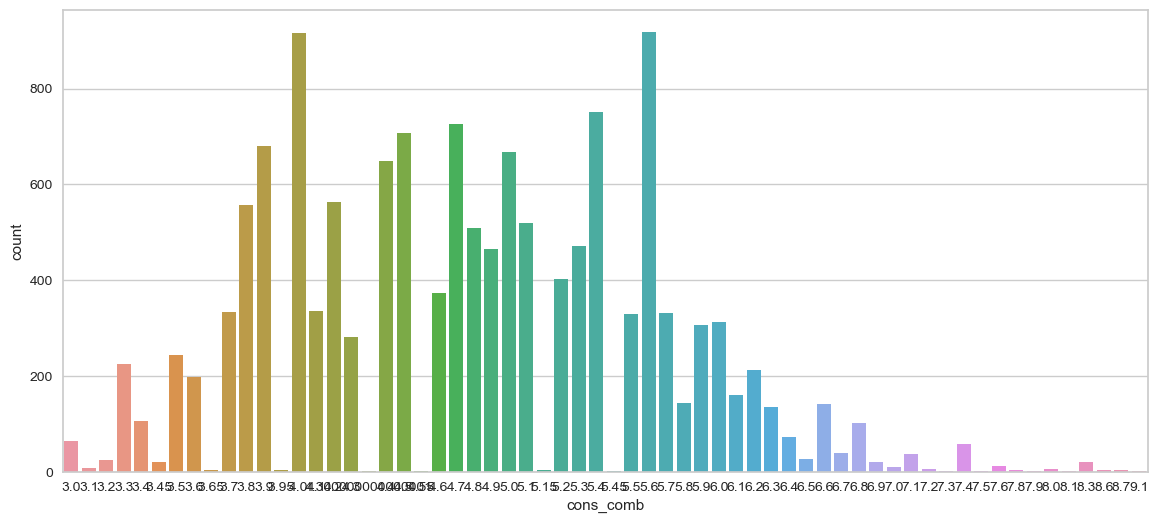

In [66]:
#Seeing the countplot of cons_comb
sns.countplot(x=df["cons_comb"])
plt.show()

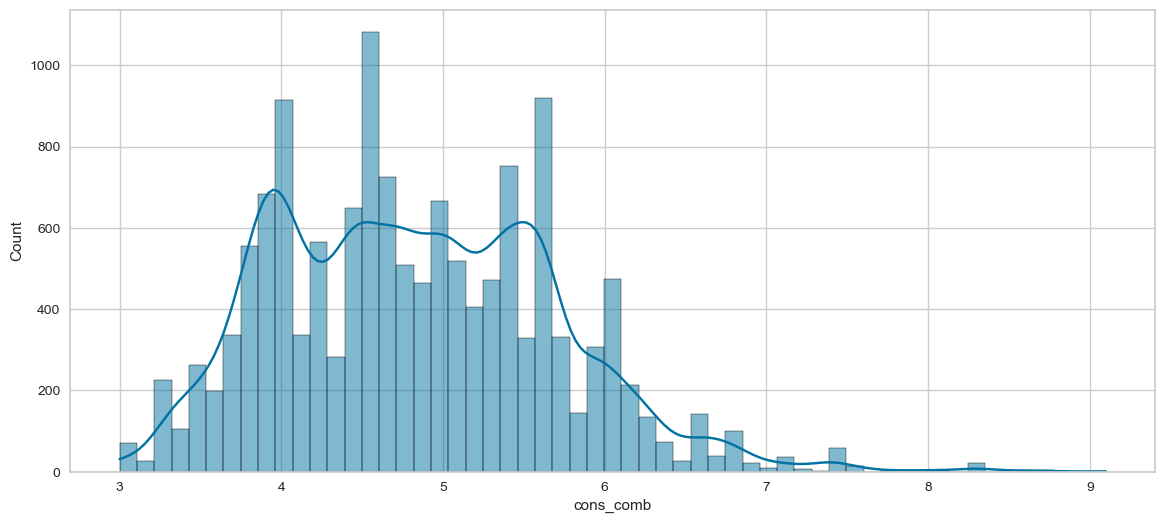

In [67]:
#Seeing the histplot of cons_comb
sns.histplot(df["cons_comb"], kde=True)
plt.show()

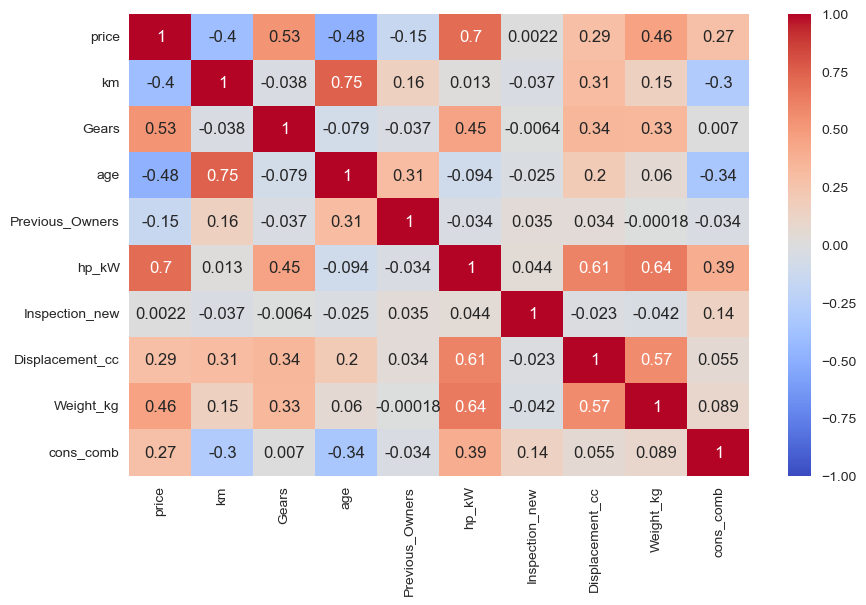

In [68]:
#Seeing the correlation 
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1, annot =True, cmap="coolwarm");
#As we can see, there is not correlation here

In [69]:
#Seeing the multicollinearity
df.corr(numeric_only=True)[(abs(df.corr(numeric_only=True))>= 0.9) & (abs(df.corr(numeric_only=True)) < 1)].any().any()
#As we can see, we do not have multicollinearity

False

## Feature Engineering

In [70]:
#Seeing the head of the data 
df.head()
#Well, from the EDA, i can not see vat as a important feature, so i am going to drop it. The reason for this is that 
#this may affect our target which is the price, so in my opinio, dropping it is better

make_model body_type  price               vat        km  Type     Fuel  \
0    Audi A1    Sedans  15770    VAT deductible 56013.000  Used   Diesel   
1    Audi A1    Sedans  14500  Price negotiable 80000.000  Used  Benzine   
2    Audi A1    Sedans  14640    VAT deductible 83450.000  Used   Diesel   
3    Audi A1    Sedans  14500    VAT deductible 73000.000  Used   Diesel   
4    Audi A1    Sedans  16790    VAT deductible 16200.000  Used   Diesel   

   Gears                                Comfort_Convenience  \
0  7.000  Air conditioning,Armrest,Automatic climate con...   
1  7.000  Air conditioning,Automatic climate control,Hil...   
2  7.000  Air conditioning,Cruise control,Electrical sid...   
3  6.000  Air suspension,Armrest,Auxiliary heating,Elect...   
4  7.000  Air conditioning,Armrest,Automatic climate con...   

                                 Entertainment_Media  \
0  Bluetooth,Hands-free equipment,On-board comput...   
1  Bluetooth,Hands-free equipment,On-board comput...   
2                              MP3,On-board computer   
3  Bluetooth,CD player,Hands-free equipment,MP3,O...   
4  Bluetooth,CD player,Hands-free equipment,MP3,O...   

                                              Extras  \
0     Alloy wheels,Catalytic Converter,Voice Control   
1  Alloy wheels,Sport seats,Sport suspension,Voic...   
2                         Alloy wheels,Voice Control   
3             Alloy wheels,Sport seats,Voice Control   
4  Alloy wheels,Sport package,Sport suspension,Vo...   

                                     Safety_Security   age  Previous_Owners  \
0  ABS,Central door lock,Daytime running lights,D... 3.000            2.000   
1  ABS,Central door lock,Central door lock with r... 2.000            1.000   
2  ABS,Central door lock,Daytime running lights,D... 3.000            1.000   
3  ABS,Alarm system,Central door lock with remote... 3.000            1.000   
4  ABS,Central door lock,Driver-side airbag,Elect... 3.000            1.000   

    hp_kW  Inspection_new Paint_Type Upholstery_type Gearing_Type  \
0  66.000               1   Metallic           Cloth    Automatic   
1 141.000               0   Metallic           Cloth    Automatic   
2  85.000               0   Metallic           Cloth    Automatic   
3  66.000               0   Metallic           Cloth    Automatic   
4  66.000               1   Metallic           Cloth    Automatic   

   Displacement_cc  Weight_kg Drive_chain  cons_comb  
0         1422.000   1220.000       front      3.800  
1         1798.000   1255.000       front      5.600  
2         1598.000   1135.000       front      3.800  
3         1422.000   1195.000       front      3.800  
4         1422.000   1135.000       front      4.100

In [71]:
#Dropping vat from the dataset
# df.drop(columns=["vat", "Displacement_cc"], inplace=True)
# df.reset_index(drop=True, inplace=True)


df.drop(columns=["vat"], inplace=True)
df.reset_index(drop=True, inplace=True)

In [72]:
#Seeing the head of the dataset after dropping vat
df.head()
#As we can see, we do not have vat column now

make_model body_type  price        km  Type     Fuel  Gears  \
0    Audi A1    Sedans  15770 56013.000  Used   Diesel  7.000   
1    Audi A1    Sedans  14500 80000.000  Used  Benzine  7.000   
2    Audi A1    Sedans  14640 83450.000  Used   Diesel  7.000   
3    Audi A1    Sedans  14500 73000.000  Used   Diesel  6.000   
4    Audi A1    Sedans  16790 16200.000  Used   Diesel  7.000   

                                 Comfort_Convenience  \
0  Air conditioning,Armrest,Automatic climate con...   
1  Air conditioning,Automatic climate control,Hil...   
2  Air conditioning,Cruise control,Electrical sid...   
3  Air suspension,Armrest,Auxiliary heating,Elect...   
4  Air conditioning,Armrest,Automatic climate con...   

                                 Entertainment_Media  \
0  Bluetooth,Hands-free equipment,On-board comput...   
1  Bluetooth,Hands-free equipment,On-board comput...   
2                              MP3,On-board computer   
3  Bluetooth,CD player,Hands-free equipment,MP3,O...   
4  Bluetooth,CD player,Hands-free equipment,MP3,O...   

                                              Extras  \
0     Alloy wheels,Catalytic Converter,Voice Control   
1  Alloy wheels,Sport seats,Sport suspension,Voic...   
2                         Alloy wheels,Voice Control   
3             Alloy wheels,Sport seats,Voice Control   
4  Alloy wheels,Sport package,Sport suspension,Vo...   

                                     Safety_Security   age  Previous_Owners  \
0  ABS,Central door lock,Daytime running lights,D... 3.000            2.000   
1  ABS,Central door lock,Central door lock with r... 2.000            1.000   
2  ABS,Central door lock,Daytime running lights,D... 3.000            1.000   
3  ABS,Alarm system,Central door lock with remote... 3.000            1.000   
4  ABS,Central door lock,Driver-side airbag,Elect... 3.000            1.000   

    hp_kW  Inspection_new Paint_Type Upholstery_type Gearing_Type  \
0  66.000               1   Metallic           Cloth    Automatic   
1 141.000               0   Metallic           Cloth    Automatic   
2  85.000               0   Metallic           Cloth    Automatic   
3  66.000               0   Metallic           Cloth    Automatic   
4  66.000               1   Metallic           Cloth    Automatic   

   Displacement_cc  Weight_kg Drive_chain  cons_comb  
0         1422.000   1220.000       front      3.800  
1         1798.000   1255.000       front      5.600  
2         1598.000   1135.000       front      3.800  
3         1422.000   1195.000       front      3.800  
4         1422.000   1135.000       front      4.100

In [73]:
#Seeing the object columns in the dataset and assignt it to a variable
df_ob = df.select_dtypes(include ="object").head()
df_ob
#As we can see, there are a lot of object columns in the dataset

make_model body_type  Type     Fuel  \
0    Audi A1    Sedans  Used   Diesel   
1    Audi A1    Sedans  Used  Benzine   
2    Audi A1    Sedans  Used   Diesel   
3    Audi A1    Sedans  Used   Diesel   
4    Audi A1    Sedans  Used   Diesel   

                                 Comfort_Convenience  \
0  Air conditioning,Armrest,Automatic climate con...   
1  Air conditioning,Automatic climate control,Hil...   
2  Air conditioning,Cruise control,Electrical sid...   
3  Air suspension,Armrest,Auxiliary heating,Elect...   
4  Air conditioning,Armrest,Automatic climate con...   

                                 Entertainment_Media  \
0  Bluetooth,Hands-free equipment,On-board comput...   
1  Bluetooth,Hands-free equipment,On-board comput...   
2                              MP3,On-board computer   
3  Bluetooth,CD player,Hands-free equipment,MP3,O...   
4  Bluetooth,CD player,Hands-free equipment,MP3,O...   

                                              Extras  \
0     Alloy wheels,Catalytic Converter,Voice Control   
1  Alloy wheels,Sport seats,Sport suspension,Voic...   
2                         Alloy wheels,Voice Control   
3             Alloy wheels,Sport seats,Voice Control   
4  Alloy wheels,Sport package,Sport suspension,Vo...   

                                     Safety_Security Paint_Type  \
0  ABS,Central door lock,Daytime running lights,D...   Metallic   
1  ABS,Central door lock,Central door lock with r...   Metallic   
2  ABS,Central door lock,Daytime running lights,D...   Metallic   
3  ABS,Alarm system,Central door lock with remote...   Metallic   
4  ABS,Central door lock,Driver-side airbag,Elect...   Metallic   

  Upholstery_type Gearing_Type Drive_chain  
0           Cloth    Automatic       front  
1           Cloth    Automatic       front  
2           Cloth    Automatic       front  
3           Cloth    Automatic       front  
4           Cloth    Automatic       front

### Comfort_Convenience

In [74]:
#Seeing Comfort_Convenience 
df.Comfort_Convenience.sample(5)
#As we can see, we do have many things in it, and the best way is separite them from the comma, as there is different thing
#after each comma

1693     Air conditioning,Automatic climate control,Cru...
578      Air conditioning,Armrest,Cruise control,Leathe...
10632    Air conditioning,Armrest,Automatic climate con...
11634    Air conditioning,Armrest,Automatic climate con...
3687     Air conditioning,Automatic climate control,Cru...
Name: Comfort_Convenience, dtype: object

In [75]:
#Converting Comfort_Convenience from object to numeric
df["Comfort_Convenience"] = df.Comfort_Convenience.apply(lambda x: len(x.split(',')))

In [76]:
#Seeing Comfort_Convenience after converting
df["Comfort_Convenience"]
#As we can see, now it is numeric not object

0        16
1         9
2        13
3        16
4        13
         ..
14216    27
14217    20
14218    26
14219    23
14220    24
Name: Comfort_Convenience, Length: 14221, dtype: int64

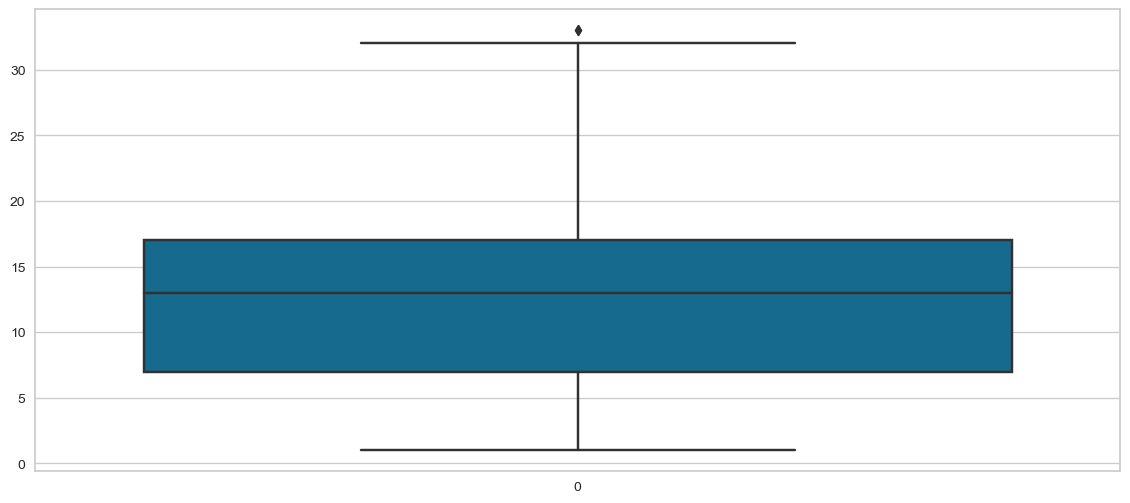

In [77]:
#SEeing teh boxplot of Comfort_Convenience
sns.boxplot(df['Comfort_Convenience'])
plt.show()
#As we can see, there are some outliers in Comfort_Convenience.

In [78]:
#Seeing the value counts of Comfort_Convenience
df.Comfort_Convenience.value_counts()

Comfort_Convenience
15    1011
17     973
14     960
16     846
13     787
4      778
11     731
6      714
12     690
10     676
7      650
5      621
18     578
8      566
3      552
9      495
19     436
21     389
20     366
23     301
22     291
2      230
1      168
24     126
25     105
26      80
27      44
28      31
29      14
31       4
30       4
32       2
33       2
Name: count, dtype: int64

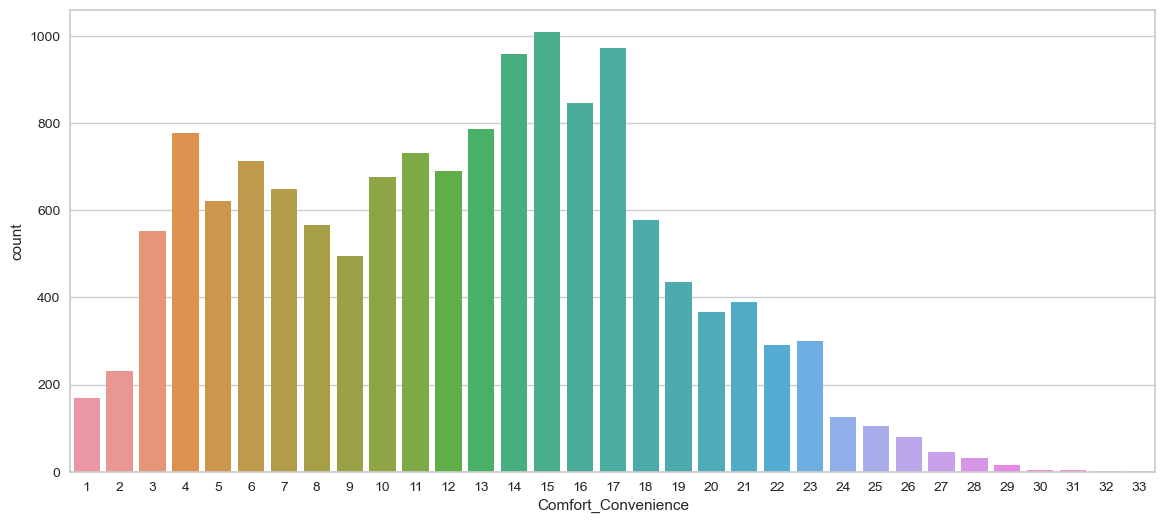

In [79]:
#Seeing the countplot of Comfort_Convenience
sns.countplot(x=df["Comfort_Convenience"])
plt.show()
#As we can see from the graph, there are about 33 ones in Comfort_Convenience, however, from nearly 24, the numbers
#started to decrease.

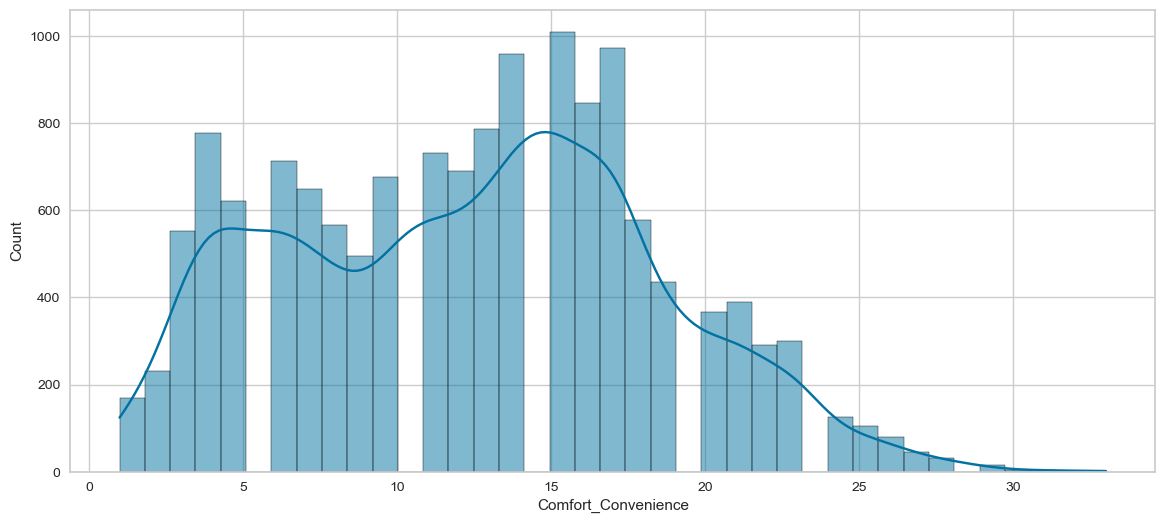

In [80]:
#Seeing the histplot of Comfort_Convenience
sns.histplot(df["Comfort_Convenience"], kde=True)
plt.show()
#As we can see, there are low values from about 24

### Entertainment_Media

In [81]:
#Seeing Entertainment_Media 
df.Entertainment_Media.sample(5)
#As we can see, we do have many things in it, and the best way is separite them from the comma, as there is different thing
#after each comma

11790    Bluetooth,Digital radio,On-board computer,Radi...
5376     Bluetooth,Hands-free equipment,MP3,On-board co...
2772     Bluetooth,CD player,Hands-free equipment,On-bo...
3807     Bluetooth,Hands-free equipment,On-board comput...
2135     Bluetooth,CD player,Hands-free equipment,MP3,O...
Name: Entertainment_Media, dtype: object

In [82]:
#Converting Entertainment_Media from object to numeric
df["Entertainment_Media"] = df.Entertainment_Media.apply(lambda x: len(x.split(',')))

In [83]:
#Seeing Entertainment_Media after converting
df["Entertainment_Media"]
#As we can see, now it is numeric not object

0        4
1        5
2        2
3        8
4        7
        ..
14216    7
14217    6
14218    7
14219    5
14220    4
Name: Entertainment_Media, Length: 14221, dtype: int64

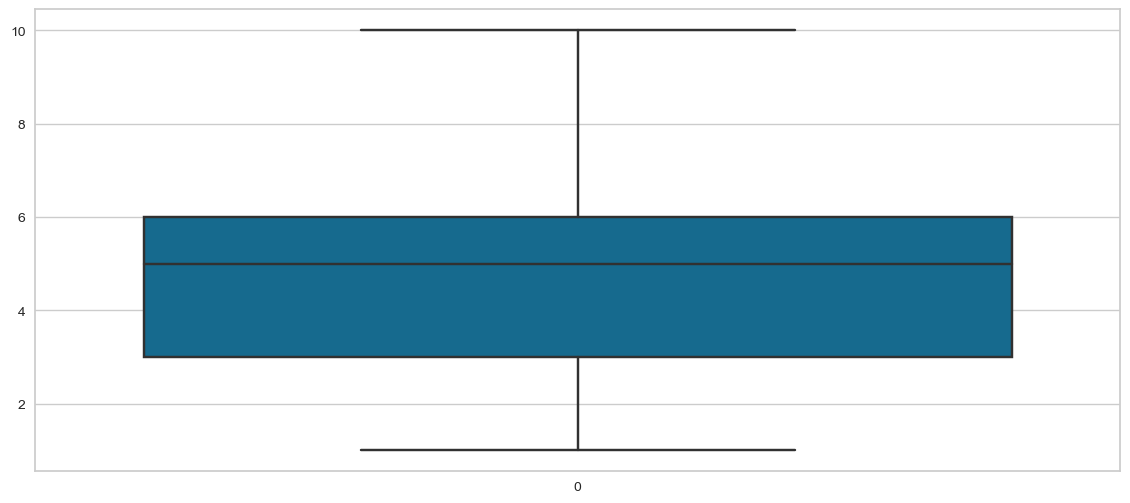

In [84]:
#SEeing teh boxplot of Entertainment_Media
sns.boxplot(df['Entertainment_Media'])
plt.show()
#As we can see, there is no outliers in Entertainment_Media

In [85]:
#Seeing the value counts of Entertainment_Media
df.Entertainment_Media.value_counts()

Entertainment_Media
5     3187
6     2805
7     1756
4     1648
3     1411
2     1337
1     1222
8      670
9      171
10      14
Name: count, dtype: int64

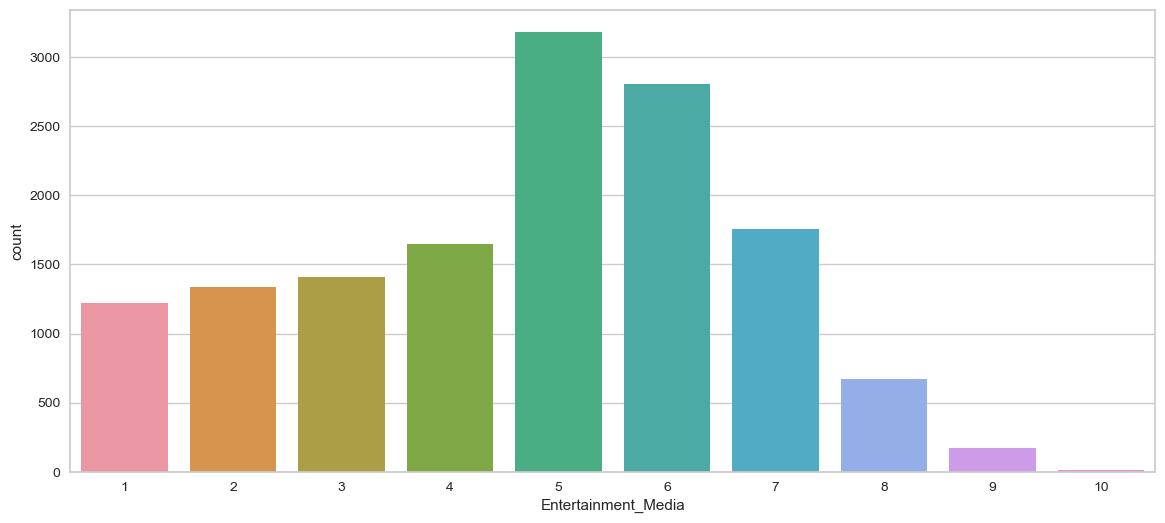

In [86]:
#Seeing the countplot of Entertainment_Media
sns.countplot(x=df["Entertainment_Media"])
plt.show()
#As we can see from the graph, there are 10 values, and 9 and 10 are the lest ones.

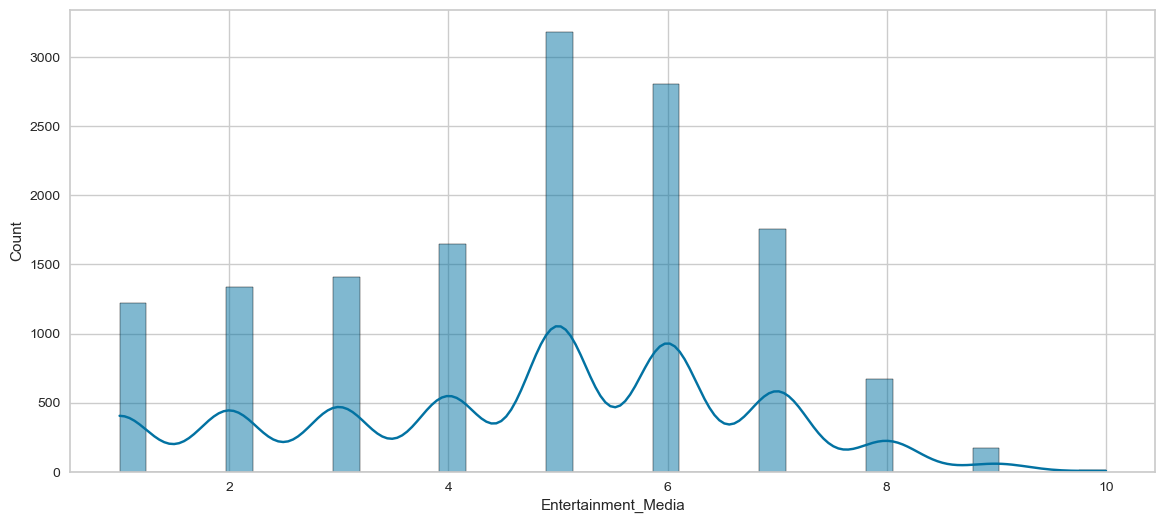

In [87]:
#Seeing the histplot of Entertainment_Media
sns.histplot(df["Entertainment_Media"], kde=True)
plt.show()
#As we can see, there are low values in 9 and 10

### Extras

In [88]:
#Seeing Extras 
df.Extras.sample(5)
#As we can see, we do have many things in it, and the best way is separite them from the comma, as there is different thing
#after each comma

5205     Catalytic Converter,Roof rack,Touch screen,Voi...
11816    Alloy wheels,Roof rack,Sport package,Sport sea...
12483                                         Alloy wheels
5336                             Alloy wheels,Touch screen
2032               Alloy wheels,Touch screen,Voice Control
Name: Extras, dtype: object

In [89]:
#Converting Extras from object to numeric
df["Extras"] = df.Extras.apply(lambda x: len(x.split(',')))

In [90]:
#Seeing Extras after converting
df["Extras"]
#As we can see, now it is numeric not object

0        3
1        4
2        2
3        3
4        4
        ..
14216    3
14217    2
14218    5
14219    3
14220    1
Name: Extras, Length: 14221, dtype: int64

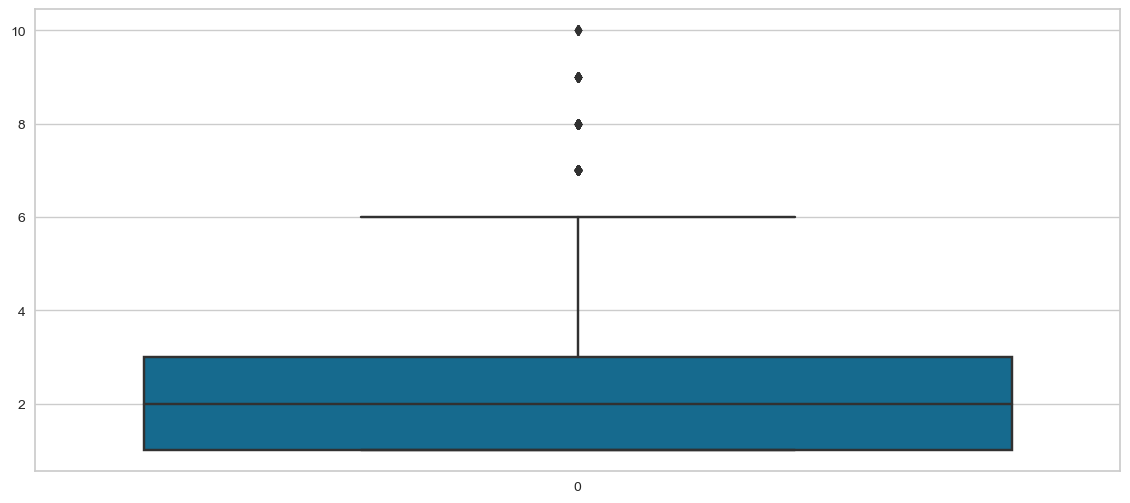

In [91]:
#SEeing teh boxplot of Extras
sns.boxplot(df['Extras'])
plt.show()
#As we can see, there are some outliers in Extras.

In [92]:
#Seeing the value counts of Extras
df.Extras.value_counts()

Extras
1     6079
2     3069
3     2398
4     1341
5      721
6      380
7      139
8       59
9       28
10       7
Name: count, dtype: int64

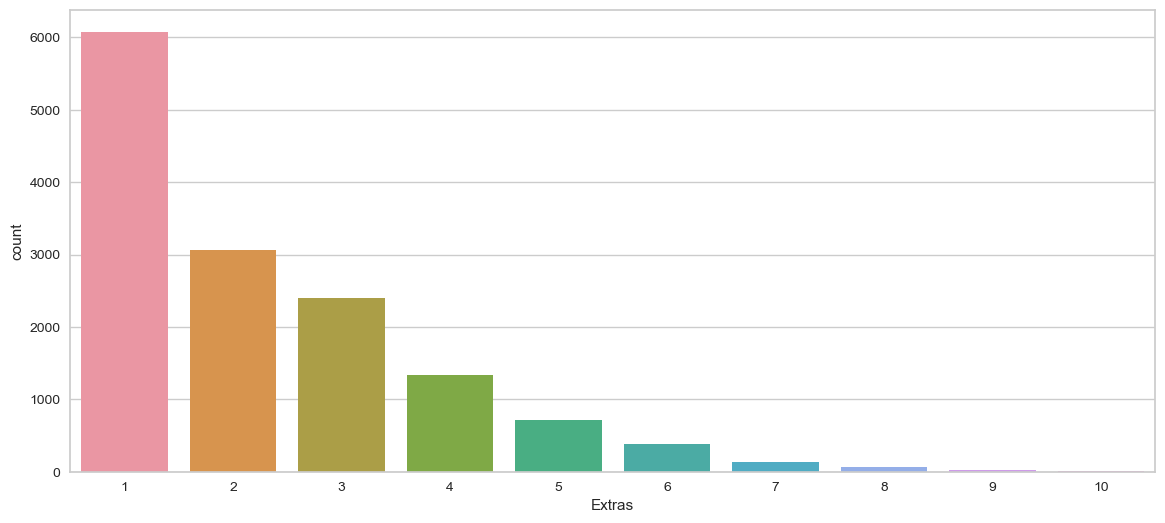

In [93]:
#Seeing the countplot of Extras
sns.countplot(x=df["Extras"])
plt.show()
#As we can see from the graph, there are 10 values, but 1, 2, 3 and 4 are the highest compared to the others

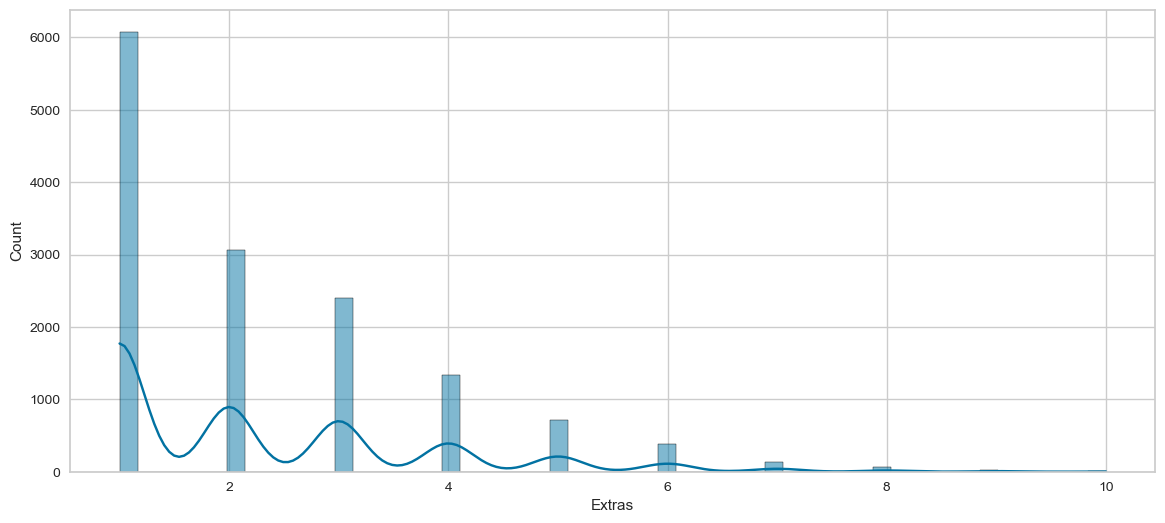

In [94]:
#Seeing the histplot of Extras
sns.histplot(df["Extras"], kde=True)
plt.show()
#As we can see, we can see the same here again the last classes have small values

### Safety_Security

In [95]:
#Seeing Safety_Security 
df.Safety_Security.sample(5)
#As we can see, we do have many things in it, and the best way is separite them from the comma, as there is different thing
#after each comma

13529    ABS,Adaptive headlights,Alarm system,Blind spo...
5588     ABS,Central door lock,Daytime running lights,D...
6870     Central door lock,Driver-side airbag,Passenger...
3517     ABS,Central door lock,Driver-side airbag,Elect...
9265     ABS,Central door lock,Daytime running lights,D...
Name: Safety_Security, dtype: object

In [96]:
#Converting Safety_Security from object to numeric
df["Safety_Security"] = df.Safety_Security.apply(lambda x: len(x.split(',')))

In [97]:
#Seeing Safety_Security after converting
df["Safety_Security"]
#As we can see, now it is numeric not object

0        14
1        15
2        12
3        14
4        13
         ..
14216    18
14217    19
14218    19
14219    19
14220    18
Name: Safety_Security, Length: 14221, dtype: int64

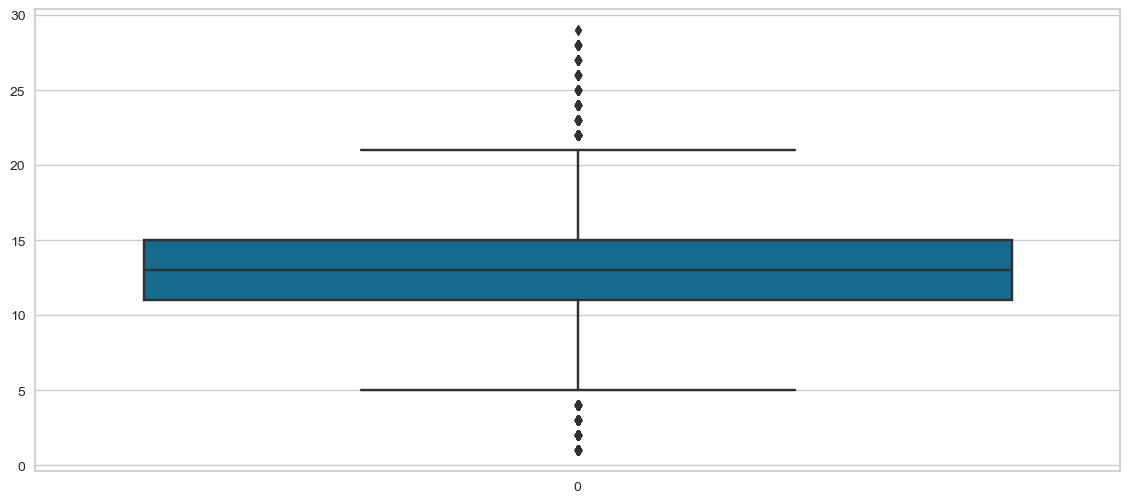

In [98]:
#SEeing teh boxplot of Safety_Security
sns.boxplot(df['Safety_Security'])
plt.show()
#As we can see, there are some outliers in Safety_Security.

In [99]:
#Seeing the value counts of Safety_Security
df.Safety_Security.value_counts()

Safety_Security
13    2201
14    1548
12    1540
11    1301
15     950
10     929
16     806
9      744
18     601
17     553
8      515
19     476
7      426
20     372
6      297
21     237
5      193
22     115
2       95
3       70
4       66
1       53
23      45
24      38
25      16
28      14
26      10
27       9
29       1
Name: count, dtype: int64

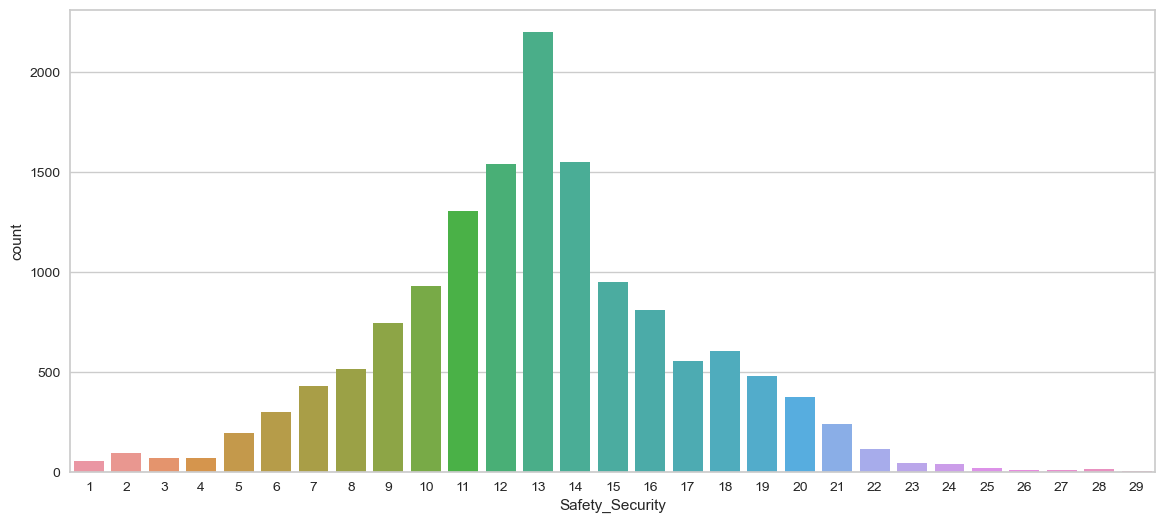

In [100]:
#Seeing the countplot of Safety_Security
sns.countplot(x=df["Safety_Security"])
plt.show()
#As we can see from the graph, there are about 29 classes adn 13 is the highest

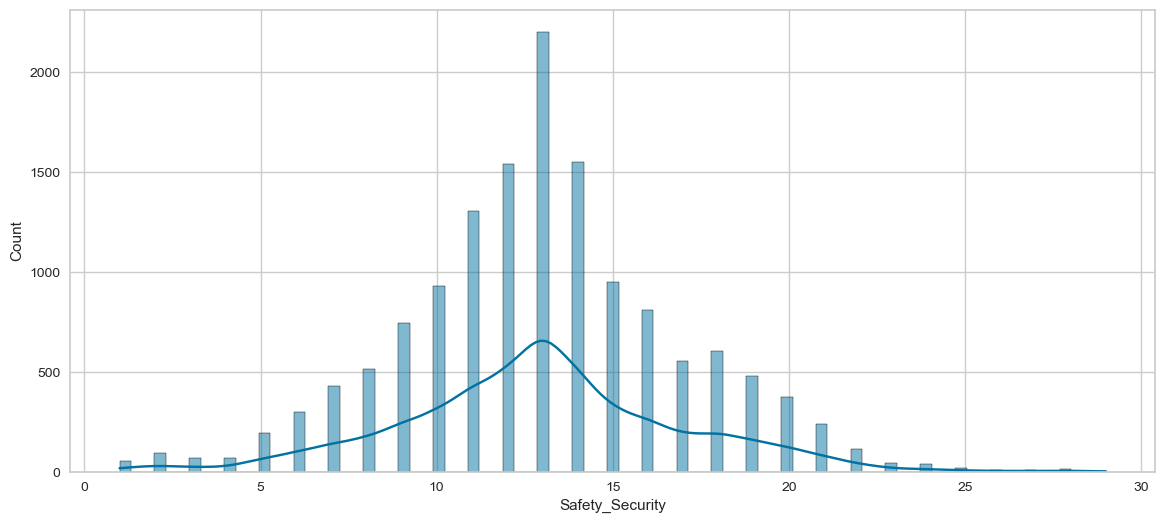

In [101]:
#Seeing the histplot of Safety_Security
sns.histplot(df["Safety_Security"], kde=True)
plt.show()

In [102]:
#Let's the dataset after converting
df.head()
#As we can see, they have converted successfuly

make_model body_type  price        km  Type     Fuel  Gears  \
0    Audi A1    Sedans  15770 56013.000  Used   Diesel  7.000   
1    Audi A1    Sedans  14500 80000.000  Used  Benzine  7.000   
2    Audi A1    Sedans  14640 83450.000  Used   Diesel  7.000   
3    Audi A1    Sedans  14500 73000.000  Used   Diesel  6.000   
4    Audi A1    Sedans  16790 16200.000  Used   Diesel  7.000   

   Comfort_Convenience  Entertainment_Media  Extras  Safety_Security   age  \
0                   16                    4       3               14 3.000   
1                    9                    5       4               15 2.000   
2                   13                    2       2               12 3.000   
3                   16                    8       3               14 3.000   
4                   13                    7       4               13 3.000   

   Previous_Owners   hp_kW  Inspection_new Paint_Type Upholstery_type  \
0            2.000  66.000               1   Metallic           Cloth   
1            1.000 141.000               0   Metallic           Cloth   
2            1.000  85.000               0   Metallic           Cloth   
3            1.000  66.000               0   Metallic           Cloth   
4            1.000  66.000               1   Metallic           Cloth   

  Gearing_Type  Displacement_cc  Weight_kg Drive_chain  cons_comb  
0    Automatic         1422.000   1220.000       front      3.800  
1    Automatic         1798.000   1255.000       front      5.600  
2    Automatic         1598.000   1135.000       front      3.800  
3    Automatic         1422.000   1195.000       front      3.800  
4    Automatic         1422.000   1135.000       front      4.100

In [103]:
#Seeing the object columns in the dataset and assignt it to a variable
df_ob2 = df.select_dtypes(include ="object").head()
df_ob2
#As we can see, now we can see that the numbers are decreased after converting

make_model body_type  Type     Fuel Paint_Type Upholstery_type Gearing_Type  \
0    Audi A1    Sedans  Used   Diesel   Metallic           Cloth    Automatic   
1    Audi A1    Sedans  Used  Benzine   Metallic           Cloth    Automatic   
2    Audi A1    Sedans  Used   Diesel   Metallic           Cloth    Automatic   
3    Audi A1    Sedans  Used   Diesel   Metallic           Cloth    Automatic   
4    Audi A1    Sedans  Used   Diesel   Metallic           Cloth    Automatic   

  Drive_chain  
0       front  
1       front  
2       front  
3       front  
4       front

In [104]:
#Dropping the prices that more than 40000
df = df[df['price'] < 40000]
df

make_model body_type  price        km            Type     Fuel  \
0             Audi A1    Sedans  15770 56013.000            Used   Diesel   
1             Audi A1    Sedans  14500 80000.000            Used  Benzine   
2             Audi A1    Sedans  14640 83450.000            Used   Diesel   
3             Audi A1    Sedans  14500 73000.000            Used   Diesel   
4             Audi A1    Sedans  16790 16200.000            Used   Diesel   
...               ...       ...    ...       ...             ...      ...   
14216  Renault Espace       Van  39980   100.000  Pre-registered   Diesel   
14217  Renault Espace       Van  39950  1647.363             New   Diesel   
14218  Renault Espace       Van  39950  1000.000   Demonstration  Benzine   
14219  Renault Espace       Van  39885  9900.000            Used  Benzine   
14220  Renault Espace       Van  39875    15.000  Pre-registered   Diesel   

       Gears  Comfort_Convenience  Entertainment_Media  Extras  \
0      7.000                   16                    4       3   
1      7.000                    9                    5       4   
2      7.000                   13                    2       2   
3      6.000                   16                    8       3   
4      7.000                   13                    7       4   
...      ...                  ...                  ...     ...   
14216  6.000                   27                    7       3   
14217  6.000                   20                    6       2   
14218  6.000                   26                    7       5   
14219  7.000                   23                    5       3   
14220  6.000                   24                    4       1   

       Safety_Security   age  Previous_Owners   hp_kW  Inspection_new  \
0                   14 3.000            2.000  66.000               1   
1                   15 2.000            1.000 141.000               0   
2                   12 3.000            1.000  85.000               0   
3                   14 3.000            1.000  66.000               0   
4                   13 3.000            1.000  66.000               1   
...                ...   ...              ...     ...             ...   
14216               18 0.000            1.000 118.000               0   
14217               19 0.000            1.000 147.000               0   
14218               19 0.000            1.000 165.000               0   
14219               19 0.000            1.000 165.000               0   
14220               18 0.000            1.000 146.000               1   

      Paint_Type    Upholstery_type Gearing_Type  Displacement_cc  Weight_kg  \
0       Metallic              Cloth    Automatic         1422.000   1220.000   
1       Metallic              Cloth    Automatic         1798.000   1255.000   
2       Metallic              Cloth    Automatic         1598.000   1135.000   
3       Metallic              Cloth    Automatic         1422.000   1195.000   
4       Metallic              Cloth    Automatic         1422.000   1135.000   
...          ...                ...          ...              ...        ...   
14216   Metallic  Part/Full Leather    Automatic         1598.000   1734.000   
14217   Metallic  Part/Full Leather    Automatic         1997.000   1758.000   
14218   Metallic  Part/Full Leather    Automatic         1798.000   1734.000   
14219   Metallic              Cloth    Automatic         1798.000   1708.000   
14220   Metallic  Part/Full Leather    Automatic         1997.000   1734.000   

      Drive_chain  cons_comb  
0           front      3.800  
1           front      5.600  
2           front      3.800  
3           front      3.800  
4           front      4.100  
...           ...        ...  
14216       front      4.700  
14217       front      5.300  
14218       front      6.800  
14219       front      7.400  
14220       front      5.300  

[14070 rows x 22 columns]

In [105]:
#Seeing the prices after filtering
df.price

0        15770
1        14500
2        14640
3        14500
4        16790
         ...  
14216    39980
14217    39950
14218    39950
14219    39885
14220    39875
Name: price, Length: 14070, dtype: int64

In [106]:
#Seeing the sum of prices that are more than 40000
(df.price > 40000).sum()

0

In [107]:
#Seeing the prices that less than 40000
(df.price < 40000).sum()

14070

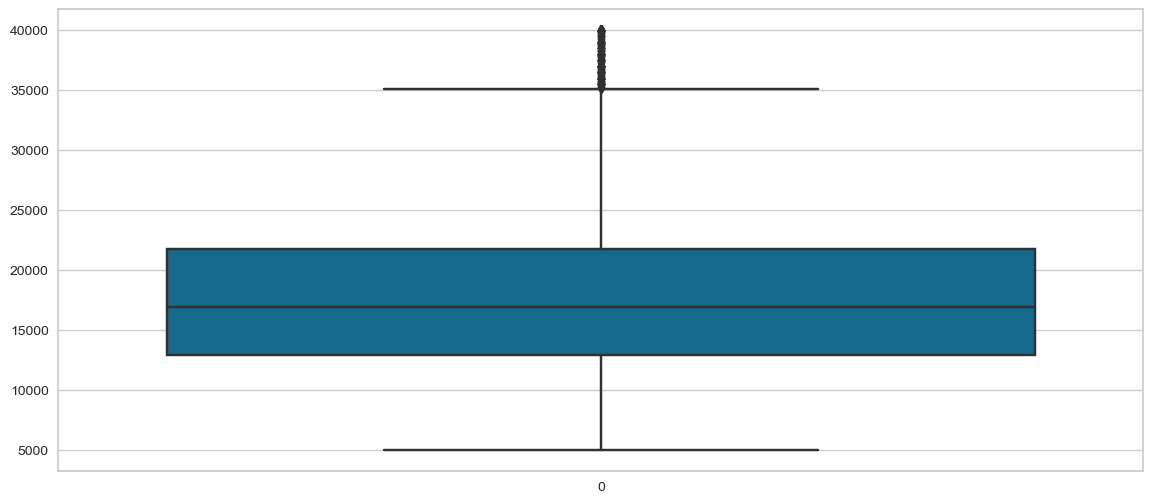

In [108]:
#SEeing teh boxplot of price after filterring 
sns.boxplot(df['price'])
plt.show()
#As we can see, there are some outliers in price, but it is not like before dropping them, the percentage now is low

## Modeling

### Train | Test Split

In [109]:
#Splitting the data to X and y
X= df.drop(columns="price")
y= df.price

In [110]:
#Seeing the head of X
X.head()

make_model body_type        km  Type     Fuel  Gears  Comfort_Convenience  \
0    Audi A1    Sedans 56013.000  Used   Diesel  7.000                   16   
1    Audi A1    Sedans 80000.000  Used  Benzine  7.000                    9   
2    Audi A1    Sedans 83450.000  Used   Diesel  7.000                   13   
3    Audi A1    Sedans 73000.000  Used   Diesel  6.000                   16   
4    Audi A1    Sedans 16200.000  Used   Diesel  7.000                   13   

   Entertainment_Media  Extras  Safety_Security   age  Previous_Owners  \
0                    4       3               14 3.000            2.000   
1                    5       4               15 2.000            1.000   
2                    2       2               12 3.000            1.000   
3                    8       3               14 3.000            1.000   
4                    7       4               13 3.000            1.000   

    hp_kW  Inspection_new Paint_Type Upholstery_type Gearing_Type  \
0  66.000               1   Metallic           Cloth    Automatic   
1 141.000               0   Metallic           Cloth    Automatic   
2  85.000               0   Metallic           Cloth    Automatic   
3  66.000               0   Metallic           Cloth    Automatic   
4  66.000               1   Metallic           Cloth    Automatic   

   Displacement_cc  Weight_kg Drive_chain  cons_comb  
0         1422.000   1220.000       front      3.800  
1         1798.000   1255.000       front      5.600  
2         1598.000   1135.000       front      3.800  
3         1422.000   1195.000       front      3.800  
4         1422.000   1135.000       front      4.100

In [111]:
#seeing the head of y
y.head()

0    15770
1    14500
2    14640
3    14500
4    16790
Name: price, dtype: int64

In [112]:
#Seeing the shape of X and y
print('X shape is:', X.shape)
print('y shape is:', y.shape)

X shape is: (14070, 21)
y shape is: (14070,)


In [113]:
#Splitting the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t, random_state=s)

In [114]:
#Seeing the shape of X_train and X_test
print('X_train, shape is:', X_train.shape)
print('X_test shape is:', X_test.shape)


#Seeing the shape of y_train and y_test
print('y_train, shape is:', y_train.shape)
print('y_test shape is:', y_test.shape)

X_train, shape is: (11256, 21)
X_test shape is: (2814, 21)
y_train, shape is: (11256,)
y_test shape is: (2814,)


In [115]:
#Seeing the head of X_train
X_train.head()

make_model      body_type         km            Type     Fuel  \
8963       Opel Corsa        Compact      9.000  Pre-registered  Benzine   
13900  Renault Espace            Van  21709.000            Used   Diesel   
11322   Opel Insignia  Station wagon   1647.363   Demonstration   Diesel   
2917          Audi A3         Sedans 156000.000            Used   Diesel   
10780   Opel Insignia  Station wagon  29900.000            Used   Diesel   

       Gears  Comfort_Convenience  Entertainment_Media  Extras  \
8963   6.000                   18                    7       3   
13900  6.000                    2                    4       1   
11322  6.000                   13                    1       4   
2917   6.000                    6                    5       1   
10780  6.000                   24                    5       6   

       Safety_Security   age  Previous_Owners   hp_kW  Inspection_new  \
8963                19 0.000            1.000  66.000               0   
13900                5 2.000            1.000 118.000               0   
11322               13 0.000            1.000 100.000               0   
2917                12 3.000            1.000  81.000               0   
10780               18 1.000            1.000 125.000               1   

      Paint_Type    Upholstery_type Gearing_Type  Displacement_cc  Weight_kg  \
8963    Metallic  Part/Full Leather    Automatic         1398.000   1163.000   
13900   Metallic  Part/Full Leather    Automatic         1598.000   1734.000   
11322   Metallic  Part/Full Leather    Automatic         1598.000   1487.000   
2917    Metallic              Cloth       Manual         1598.000   1335.000   
10780   Metallic  Part/Full Leather    Automatic         1956.000   1487.000   

      Drive_chain  cons_comb  
8963        front      6.200  
13900       front      4.600  
11322       front      5.600  
2917        front      3.800  
10780       front      5.600

In [116]:
#Seeing the head of X_test
X_test.head()

make_model      body_type        km            Type     Fuel  Gears  \
2102         Audi A1         Sedans  4500.000  Employee's car   Diesel  5.000   
1985         Audi A1         Sedans  7500.000            Used  Benzine  7.000   
11624  Opel Insignia  Station wagon  1647.363             New  Benzine  6.000   
666          Audi A1        Compact 11707.000            Used  Benzine  5.000   
7689      Opel Corsa         Sedans 22635.000            Used  Benzine  6.000   

       Comfort_Convenience  Entertainment_Media  Extras  Safety_Security  \
2102                     7                    1       1                9   
1985                    12                    4       1                6   
11624                   21                    5       4               21   
666                      6                    3       1                9   
7689                    11                    7       2               10   

        age  Previous_Owners   hp_kW  Inspection_new Paint_Type  \
2102  0.000            1.000  66.000               0   Metallic   
1985  0.000            1.000  85.000               0   Metallic   
11624 0.000            1.000 121.000               1   Metallic   
666   1.000            1.000  60.000               1   Metallic   
7689  3.000            1.000  66.000               0   Metallic   

         Upholstery_type Gearing_Type  Displacement_cc  Weight_kg Drive_chain  \
2102               Cloth       Manual         1422.000   1135.000       front   
1985               Cloth    Automatic          999.000   1680.000       front   
11624  Part/Full Leather       Manual         1490.000   1487.000       front   
666                Cloth       Manual          999.000   1110.000       front   
7689               Cloth    Automatic         1398.000   1203.000       front   

       cons_comb  
2102       3.800  
1985       4.200  
11624      5.600  
666        4.200  
7689       6.200

In [117]:
#Seeing the head of y_train
y_train.head()

8963     16990
13900    29990
11322    34490
2917     11990
10780    23970
Name: price, dtype: int64

In [118]:
#Seeing the head of y_test
y_test.head()

2102     20000
1985     24999
11624    33335
666      14220
7689     11990
Name: price, dtype: int64

In [119]:
#Seeing the object classes in the data set
df.select_dtypes(include="object").head(1)

make_model body_type  Type    Fuel Paint_Type Upholstery_type Gearing_Type  \
0    Audi A1    Sedans  Used  Diesel   Metallic           Cloth    Automatic   

  Drive_chain  
0       front

In [120]:
df.Type.value_counts()

Type
Used              10131
New                1305
Pre-registered     1013
Employee's car      902
Demonstration       719
Name: count, dtype: int64

In [121]:
cat = X_train.select_dtypes("object").columns
cat

Index(['make_model', 'body_type', 'Type', 'Fuel', 'Paint_Type',
       'Upholstery_type', 'Gearing_Type', 'Drive_chain'],
      dtype='object')

In [122]:
ord_enc = OrdinalEncoder()
trans = make_column_transformer((ord_enc, cat), remainder='passthrough', verbose_feature_names_out=False).set_output(transform="pandas")


In [123]:
# Making a variable for the columns that i will use in OneHotEncoder
c_onehot = ['make_model', 'body_type', 'Fuel', 'Upholstery_type', 'Gearing_Type', 'Drive_chain', 'Paint_Type']

#Making a variable for the columns that i will use in OrdinalEncoder
c_ord = ['Type']

#Making the values of Type
c_Type = ["Used", "New", "Pre-registered", "Employee's car", "Demonstration"]

In [124]:
trans2 = make_column_transformer(
                        (OneHotEncoder(handle_unknown="ignore", sparse=False), c_onehot),
                        (OrdinalEncoder(categories= [c_Type],
                                       handle_unknown="use_encoded_value",
                                        unknown_value=-1) ,c_ord),
                                        remainder= 'passthrough',
#                          remainder= StandardScaler(),
    
                         verbose_feature_names_out=False)

trans2=trans2.set_output(transform="pandas")

In [125]:
#Seeing the head of X_train
X_train.head()

make_model      body_type         km            Type     Fuel  \
8963       Opel Corsa        Compact      9.000  Pre-registered  Benzine   
13900  Renault Espace            Van  21709.000            Used   Diesel   
11322   Opel Insignia  Station wagon   1647.363   Demonstration   Diesel   
2917          Audi A3         Sedans 156000.000            Used   Diesel   
10780   Opel Insignia  Station wagon  29900.000            Used   Diesel   

       Gears  Comfort_Convenience  Entertainment_Media  Extras  \
8963   6.000                   18                    7       3   
13900  6.000                    2                    4       1   
11322  6.000                   13                    1       4   
2917   6.000                    6                    5       1   
10780  6.000                   24                    5       6   

       Safety_Security   age  Previous_Owners   hp_kW  Inspection_new  \
8963                19 0.000            1.000  66.000               0   
13900                5 2.000            1.000 118.000               0   
11322               13 0.000            1.000 100.000               0   
2917                12 3.000            1.000  81.000               0   
10780               18 1.000            1.000 125.000               1   

      Paint_Type    Upholstery_type Gearing_Type  Displacement_cc  Weight_kg  \
8963    Metallic  Part/Full Leather    Automatic         1398.000   1163.000   
13900   Metallic  Part/Full Leather    Automatic         1598.000   1734.000   
11322   Metallic  Part/Full Leather    Automatic         1598.000   1487.000   
2917    Metallic              Cloth       Manual         1598.000   1335.000   
10780   Metallic  Part/Full Leather    Automatic         1956.000   1487.000   

      Drive_chain  cons_comb  
8963        front      6.200  
13900       front      4.600  
11322       front      5.600  
2917        front      3.800  
10780       front      5.600

In [126]:
#Fitting the trans with X_train
X_train_trans = trans.fit_transform(X_train)

#Fitting the trans with X_test
X_test_trans = trans.transform(X_test)

In [127]:
#Fitting the trans with X_train
X_train_trans2 = trans2.fit_transform(X_train)

#Fitting the trans with X_test
X_test_trans2 = trans2.transform(X_test)

In [128]:
#Seeing X_train_trans after converting
X_train_trans

make_model  body_type  Type  Fuel  Paint_Type  Upholstery_type  \
8963        3.000      0.000 3.000 0.000       0.000            1.000   
13900       6.000      7.000 4.000 1.000       0.000            1.000   
11322       4.000      5.000 0.000 1.000       0.000            1.000   
2917        1.000      4.000 4.000 1.000       0.000            0.000   
10780       4.000      5.000 4.000 1.000       0.000            1.000   
...           ...        ...   ...   ...         ...              ...   
5718        2.000      5.000 4.000 0.000       0.000            0.000   
8029        3.000      0.000 4.000 0.000       0.000            0.000   
1361        0.000      4.000 4.000 0.000       0.000            0.000   
1547        0.000      4.000 4.000 1.000       2.000            1.000   
13200       5.000      5.000 2.000 0.000       0.000            0.000   

       Gearing_Type  Drive_chain         km  Gears  Comfort_Convenience  \
8963          0.000        1.000      9.000  6.000                   18   
13900         0.000        1.000  21709.000  6.000                    2   
11322         0.000        1.000   1647.363  6.000                   13   
2917          1.000        1.000 156000.000  6.000                    6   
10780         0.000        1.000  29900.000  6.000                   24   
...             ...          ...        ...    ...                  ...   
5718          1.000        1.000  36600.000  5.000                   17   
8029          0.000        1.000   8930.000  6.000                   13   
1361          0.000        1.000   7987.000  7.000                   15   
1547          0.000        1.000   6600.000  7.000                   16   
13200         1.000        1.000   1647.363  5.000                    6   

       Entertainment_Media  Extras  Safety_Security   age  Previous_Owners  \
8963                     7       3               19 0.000            1.000   
13900                    4       1                5 2.000            1.000   
11322                    1       4               13 0.000            1.000   
2917                     5       1               12 3.000            1.000   
10780                    5       6               18 1.000            1.000   
...                    ...     ...              ...   ...              ...   
5718                     5       1               14 3.000            1.000   
8029                     7       1               11 1.000            1.000   
1361                     5       1               10 1.000            1.000   
1547                     5       5               13 1.000            1.000   
13200                    6       1               12 0.000            1.000   

        hp_kW  Inspection_new  Displacement_cc  Weight_kg  cons_comb  
8963   66.000               0         1398.000   1163.000      6.200  
13900 118.000               0         1598.000   1734.000      4.600  
11322 100.000               0         1598.000   1487.000      5.600  
2917   81.000               0         1598.000   1335.000      3.800  
10780 125.000               1         1956.000   1487.000      5.600  
...       ...             ...              ...        ...        ...  
5718   77.000               0          999.000   1263.000      4.500  
8029   66.000               1         1398.000   1203.000      5.600  
1361  141.000               0         1798.000   1135.000      5.600  
1547   85.000               1         1598.000   1135.000      4.000  
13200  66.000               0          898.000   1084.000      5.000  

[11256 rows x 21 columns]

In [129]:
#Seeing X_train without transforming or using encoder on it
X_train

make_model      body_type         km            Type     Fuel  \
8963       Opel Corsa        Compact      9.000  Pre-registered  Benzine   
13900  Renault Espace            Van  21709.000            Used   Diesel   
11322   Opel Insignia  Station wagon   1647.363   Demonstration   Diesel   
2917          Audi A3         Sedans 156000.000            Used   Diesel   
10780   Opel Insignia  Station wagon  29900.000            Used   Diesel   
...               ...            ...        ...             ...      ...   
5718       Opel Astra  Station wagon  36600.000            Used  Benzine   
8029       Opel Corsa        Compact   8930.000            Used  Benzine   
1361          Audi A1         Sedans   7987.000            Used  Benzine   
1547          Audi A1         Sedans   6600.000            Used   Diesel   
13200    Renault Clio  Station wagon   1647.363             New  Benzine   

       Gears  Comfort_Convenience  Entertainment_Media  Extras  \
8963   6.000                   18                    7       3   
13900  6.000                    2                    4       1   
11322  6.000                   13                    1       4   
2917   6.000                    6                    5       1   
10780  6.000                   24                    5       6   
...      ...                  ...                  ...     ...   
5718   5.000                   17                    5       1   
8029   6.000                   13                    7       1   
1361   7.000                   15                    5       1   
1547   7.000                   16                    5       5   
13200  5.000                    6                    6       1   

       Safety_Security   age  Previous_Owners   hp_kW  Inspection_new  \
8963                19 0.000            1.000  66.000               0   
13900                5 2.000            1.000 118.000               0   
11322               13 0.000            1.000 100.000               0   
2917                12 3.000            1.000  81.000               0   
10780               18 1.000            1.000 125.000               1   
...                ...   ...              ...     ...             ...   
5718                14 3.000            1.000  77.000               0   
8029                11 1.000            1.000  66.000               1   
1361                10 1.000            1.000 141.000               0   
1547                13 1.000            1.000  85.000               1   
13200               12 0.000            1.000  66.000               0   

      Paint_Type    Upholstery_type Gearing_Type  Displacement_cc  Weight_kg  \
8963    Metallic  Part/Full Leather    Automatic         1398.000   1163.000   
13900   Metallic  Part/Full Leather    Automatic         1598.000   1734.000   
11322   Metallic  Part/Full Leather    Automatic         1598.000   1487.000   
2917    Metallic              Cloth       Manual         1598.000   1335.000   
10780   Metallic  Part/Full Leather    Automatic         1956.000   1487.000   
...          ...                ...          ...              ...        ...   
5718    Metallic              Cloth       Manual          999.000   1263.000   
8029    Metallic              Cloth    Automatic         1398.000   1203.000   
1361    Metallic              Cloth    Automatic         1798.000   1135.000   
1547   Uni/basic  Part/Full Leather    Automatic         1598.000   1135.000   
13200   Metallic              Cloth       Manual          898.000   1084.000   

      Drive_chain  cons_comb  
8963        front      6.200  
13900       front      4.600  
11322       front      5.600  
2917        front      3.800  
10780       front      5.600  
...           ...        ...  
5718        front      4.500  
8029        front      5.600  
1361        front      5.600  
1547        front      4.000  
13200       front      5.000  

[11256 rows x 21 columns]

In [130]:
#Seeing the shape of X_train_trans and X_test_trans
X_train_trans.shape, X_test_trans.shape 

((11256, 21), (2814, 21))

In [131]:
#Seeing the head of X_train_trans
X_train_trans.head()

make_model  body_type  Type  Fuel  Paint_Type  Upholstery_type  \
8963        3.000      0.000 3.000 0.000       0.000            1.000   
13900       6.000      7.000 4.000 1.000       0.000            1.000   
11322       4.000      5.000 0.000 1.000       0.000            1.000   
2917        1.000      4.000 4.000 1.000       0.000            0.000   
10780       4.000      5.000 4.000 1.000       0.000            1.000   

       Gearing_Type  Drive_chain         km  Gears  Comfort_Convenience  \
8963          0.000        1.000      9.000  6.000                   18   
13900         0.000        1.000  21709.000  6.000                    2   
11322         0.000        1.000   1647.363  6.000                   13   
2917          1.000        1.000 156000.000  6.000                    6   
10780         0.000        1.000  29900.000  6.000                   24   

       Entertainment_Media  Extras  Safety_Security   age  Previous_Owners  \
8963                     7       3               19 0.000            1.000   
13900                    4       1                5 2.000            1.000   
11322                    1       4               13 0.000            1.000   
2917                     5       1               12 3.000            1.000   
10780                    5       6               18 1.000            1.000   

        hp_kW  Inspection_new  Displacement_cc  Weight_kg  cons_comb  
8963   66.000               0         1398.000   1163.000      6.200  
13900 118.000               0         1598.000   1734.000      4.600  
11322 100.000               0         1598.000   1487.000      5.600  
2917   81.000               0         1598.000   1335.000      3.800  
10780 125.000               1         1956.000   1487.000      5.600

In [132]:
#Seeing the head of X_test_trans
X_test_trans.head()

make_model  body_type  Type  Fuel  Paint_Type  Upholstery_type  \
2102        0.000      4.000 1.000 1.000       0.000            0.000   
1985        0.000      4.000 4.000 0.000       0.000            0.000   
11624       4.000      5.000 2.000 0.000       0.000            1.000   
666         0.000      0.000 4.000 0.000       0.000            0.000   
7689        3.000      4.000 4.000 0.000       0.000            0.000   

       Gearing_Type  Drive_chain        km  Gears  Comfort_Convenience  \
2102          1.000        1.000  4500.000  5.000                    7   
1985          0.000        1.000  7500.000  7.000                   12   
11624         1.000        1.000  1647.363  6.000                   21   
666           1.000        1.000 11707.000  5.000                    6   
7689          0.000        1.000 22635.000  6.000                   11   

       Entertainment_Media  Extras  Safety_Security   age  Previous_Owners  \
2102                     1       1                9 0.000            1.000   
1985                     4       1                6 0.000            1.000   
11624                    5       4               21 0.000            1.000   
666                      3       1                9 1.000            1.000   
7689                     7       2               10 3.000            1.000   

        hp_kW  Inspection_new  Displacement_cc  Weight_kg  cons_comb  
2102   66.000               0         1422.000   1135.000      3.800  
1985   85.000               0          999.000   1680.000      4.200  
11624 121.000               1         1490.000   1487.000      5.600  
666    60.000               1          999.000   1110.000      4.200  
7689   66.000               0         1398.000   1203.000      6.200

#### Scaling

In [133]:
#Creating a scaler
scaler = MinMaxScaler().set_output(transform="pandas")
#Fitting the scaler with X_train_trans
scaler.fit(X_train_trans2)

#transforming X_train_trans
X_train_scaled = scaler.transform(X_train_trans2)

#transforming X_test_trans
X_test_scaled = scaler.transform(X_test_trans2)

In [134]:
#Seeing the head of X_train_scaled
X_train_scaled.head()

make_model_Audi A1  make_model_Audi A3  make_model_Opel Astra  \
8963                0.000               0.000                  0.000   
13900               0.000               0.000                  0.000   
11322               0.000               0.000                  0.000   
2917                0.000               1.000                  0.000   
10780               0.000               0.000                  0.000   

       make_model_Opel Corsa  make_model_Opel Insignia  \
8963                   1.000                     0.000   
13900                  0.000                     0.000   
11322                  0.000                     1.000   
2917                   0.000                     0.000   
10780                  0.000                     1.000   

       make_model_Renault Clio  make_model_Renault Espace  body_type_Compact  \
8963                     0.000                      0.000              1.000   
13900                    0.000                      1.000              0.000   
11322                    0.000                      0.000              0.000   
2917                     0.000                      0.000              0.000   
10780                    0.000                      0.000              0.000   

       body_type_Convertible  body_type_Coupe  body_type_Off-Road  \
8963                   0.000            0.000               0.000   
13900                  0.000            0.000               0.000   
11322                  0.000            0.000               0.000   
2917                   0.000            0.000               0.000   
10780                  0.000            0.000               0.000   

       body_type_Sedans  body_type_Station wagon  body_type_Transporter  \
8963              0.000                    0.000                  0.000   
13900             0.000                    0.000                  0.000   
11322             0.000                    1.000                  0.000   
2917              1.000                    0.000                  0.000   
10780             0.000                    1.000                  0.000   

       body_type_Van  Fuel_Benzine  Fuel_Diesel  Fuel_Electric  Fuel_LPG/CNG  \
8963           0.000         1.000        0.000          0.000         0.000   
13900          1.000         0.000        1.000          0.000         0.000   
11322          0.000         0.000        1.000          0.000         0.000   
2917           0.000         0.000        1.000          0.000         0.000   
10780          0.000         0.000        1.000          0.000         0.000   

       Upholstery_type_Cloth  Upholstery_type_Part/Full Leather  \
8963                   0.000                              1.000   
13900                  0.000                              1.000   
11322                  0.000                              1.000   
2917                   1.000                              0.000   
10780                  0.000                              1.000   

       Gearing_Type_Automatic  Gearing_Type_Manual  \
8963                    1.000                0.000   
13900                   1.000                0.000   
11322                   1.000                0.000   
2917                    0.000                1.000   
10780                   1.000                0.000   

       Gearing_Type_Semi-automatic  Drive_chain_4WD  Drive_chain_front  \
8963                         0.000            0.000              1.000   
13900                        0.000            0.000              1.000   
11322                        0.000            0.000              1.000   
2917                         0.000            0.000              1.000   
10780                        0.000            0.000              1.000   

       Drive_chain_rear  Paint_Type_Metallic  Paint_Type_Perl effect  \
8963              0.000                1.000                   0.000   
13900             0.000                1.000                   0.000   
11322   

In [135]:
#Seeing the head of X_test_scaled
X_test_scaled.head()

make_model_Audi A1  make_model_Audi A3  make_model_Opel Astra  \
2102                1.000               0.000                  0.000   
1985                1.000               0.000                  0.000   
11624               0.000               0.000                  0.000   
666                 1.000               0.000                  0.000   
7689                0.000               0.000                  0.000   

       make_model_Opel Corsa  make_model_Opel Insignia  \
2102                   0.000                     0.000   
1985                   0.000                     0.000   
11624                  0.000                     1.000   
666                    0.000                     0.000   
7689                   1.000                     0.000   

       make_model_Renault Clio  make_model_Renault Espace  body_type_Compact  \
2102                     0.000                      0.000              0.000   
1985                     0.000                      0.000              0.000   
11624                    0.000                      0.000              0.000   
666                      0.000                      0.000              1.000   
7689                     0.000                      0.000              0.000   

       body_type_Convertible  body_type_Coupe  body_type_Off-Road  \
2102                   0.000            0.000               0.000   
1985                   0.000            0.000               0.000   
11624                  0.000            0.000               0.000   
666                    0.000            0.000               0.000   
7689                   0.000            0.000               0.000   

       body_type_Sedans  body_type_Station wagon  body_type_Transporter  \
2102              1.000                    0.000                  0.000   
1985              1.000                    0.000                  0.000   
11624             0.000                    1.000                  0.000   
666               0.000                    0.000                  0.000   
7689              1.000                    0.000                  0.000   

       body_type_Van  Fuel_Benzine  Fuel_Diesel  Fuel_Electric  Fuel_LPG/CNG  \
2102           0.000         0.000        1.000          0.000         0.000   
1985           0.000         1.000        0.000          0.000         0.000   
11624          0.000         1.000        0.000          0.000         0.000   
666            0.000         1.000        0.000          0.000         0.000   
7689           0.000         1.000        0.000          0.000         0.000   

       Upholstery_type_Cloth  Upholstery_type_Part/Full Leather  \
2102                   1.000                              0.000   
1985                   1.000                              0.000   
11624                  0.000                              1.000   
666                    1.000                              0.000   
7689                   1.000                              0.000   

       Gearing_Type_Automatic  Gearing_Type_Manual  \
2102                    0.000                1.000   
1985                    1.000                0.000   
11624                   0.000                1.000   
666                     0.000                1.000   
7689                    1.000                0.000   

       Gearing_Type_Semi-automatic  Drive_chain_4WD  Drive_chain_front  \
2102                         0.000            0.000              1.000   
1985                         0.000            0.000              1.000   
11624                        0.000            0.000              1.000   
666                          0.000            0.000              1.000   
7689                         0.000            0.000              1.000   

       Drive_chain_rear  Paint_Type_Metallic  Paint_Type_Perl effect  \
2102              0.000                1.000                   0.000   
1985              0.000                1.000                   0.000   
11624   

#### Eval Function

In [136]:
#Creating the eval function to see the metrics
# Pre-defined functions

def eval(model, X_train, y_train, X_test, y_test):
    """This function will help you get regression metrics on both train
    and test set provided.

    Args:
        model : model that is used for prediction
        X_train : Train features
        y_train : Train target
        X_test  : Test features
        y_test  : Test target

    Returns:
        Dataframe : Returns scores dataframe
    """

    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},

    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}

    return pd.DataFrame(scores)


# Adjusted R2 Score
def adj_r2(y_test, y_pred, X):
    """This function gives adjusted R^2

    Args:
        y_test : Actual target
        y_pred : Predcition
        X : Features

    Returns:
        adj_r2: Adjusted R^2
    """
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0]   # number of observations
    p = X.shape[1]   # number of independent variables
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2


## Lazy Predict

In [137]:
clf = LazyRegressor(verbose=1, ignore_warnings=True, custom_metric=None)


operations = [("ncoder", trans)]

LC_pipe = Pipeline(steps=operations).set_output(transform="pandas")

X_train_transformed = LC_pipe.fit_transform(X_train)
X_test_transformed = LC_pipe.transform(X_test)

# If we want the outputs of the given transform algorithms to be dataframes,
# you can add set_output(transform="pandas") to the end of the pipeline.

models,predictions = clf.fit(X_train_transformed, X_test_transformed, y_train, y_test)
models

  2%|▏         | 1/42 [00:01<00:42,  1.03s/it]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.7742268726602213, 'Adjusted R-Squared': 0.7725287223471355, 'RMSE': 3218.390102851741, 'Time taken': 1.0256798267364502}


 10%|▉         | 4/42 [00:02<00:15,  2.42it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.9456926394860692, 'Adjusted R-Squared': 0.9452841672185933, 'RMSE': 1578.4539176840376, 'Time taken': 0.8978958129882812}
{'Model': 'BayesianRidge', 'R-Squared': 0.7857409223971521, 'Adjusted R-Squared': 0.7841293748936923, 'RMSE': 3135.2499898905776, 'Time taken': 0.07416415214538574}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.9087142698061046, 'Adjusted R-Squared': 0.9080276651019241, 'RMSE': 2046.4635162403051, 'Time taken': 0.11102652549743652}


 17%|█▋        | 7/42 [00:02<00:07,  4.56it/s]

{'Model': 'DummyRegressor', 'R-Squared': -2.628856866748741e-05, 'Adjusted R-Squared': -0.00754797626921988, 'RMSE': 6773.424090944147, 'Time taken': 0.024744749069213867}
{'Model': 'ElasticNet', 'R-Squared': 0.7421614440680198, 'Adjusted R-Squared': 0.7402221139553509, 'RMSE': 3439.3509217047995, 'Time taken': 0.033061981201171875}
{'Model': 'ElasticNetCV', 'R-Squared': 0.4580896700047018, 'Adjusted R-Squared': 0.454013696892273, 'RMSE': 4986.160736131475, 'Time taken': 0.16603350639343262}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.9063603350908176, 'Adjusted R-Squared': 0.9056560252902829, 'RMSE': 2072.68108976709, 'Time taken': 0.0759572982788086}


 21%|██▏       | 9/42 [00:07<00:35,  1.07s/it]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.955059604660819, 'Adjusted R-Squared': 0.954721585927967, 'RMSE': 1435.8894478489638, 'Time taken': 5.151394367218018}
{'Model': 'GammaRegressor', 'R-Squared': 0.7037231410263114, 'Adjusted R-Squared': 0.7014946976027987, 'RMSE': 3686.815677180574, 'Time taken': 0.05596423149108887}


 26%|██▌       | 11/42 [00:38<03:01,  5.85s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -448.10458565998755, 'Adjusted R-Squared': -451.48252129711494, 'RMSE': 143541.11136301063, 'Time taken': 30.60245418548584}


 29%|██▊       | 12/42 [00:40<02:32,  5.10s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9319964205335118, 'Adjusted R-Squared': 0.9314849322925389, 'RMSE': 1766.3161757186917, 'Time taken': 1.9562034606933594}


 33%|███▎      | 14/42 [00:41<01:31,  3.25s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9500695124113085, 'Adjusted R-Squared': 0.9496939607496457, 'RMSE': 1513.510587088856, 'Time taken': 1.0092618465423584}
{'Model': 'HuberRegressor', 'R-Squared': 0.7787882935144848, 'Adjusted R-Squared': 0.7771244518826095, 'RMSE': 3185.7127426532365, 'Time taken': 0.14508700370788574}


 36%|███▌      | 15/42 [00:41<01:06,  2.48s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.8903168898815305, 'Adjusted R-Squared': 0.8894919094687482, 'RMSE': 2243.222942039003, 'Time taken': 0.1779179573059082}


 38%|███▊      | 16/42 [00:54<02:14,  5.17s/it]

{'Model': 'KernelRidge', 'R-Squared': -6.0965481876914405, 'Adjusted R-Squared': -6.14992480371634, 'RMSE': 18043.72243287777, 'Time taken': 12.657714605331421}
{'Model': 'Lars', 'R-Squared': 0.7857270492999866, 'Adjusted R-Squared': 0.7841153974501656, 'RMSE': 3135.351490662869, 'Time taken': 0.06733393669128418}


 43%|████▎     | 18/42 [00:54<01:12,  3.00s/it]

{'Model': 'LarsCV', 'R-Squared': 0.7858064213039999, 'Adjusted R-Squared': 0.7841953664499111, 'RMSE': 3134.7707309812295, 'Time taken': 0.18776583671569824}
{'Model': 'Lasso', 'R-Squared': 0.7857478544067862, 'Adjusted R-Squared': 0.7841363590423673, 'RMSE': 3135.1992714818875, 'Time taken': 0.061391353607177734}


 52%|█████▏    | 22/42 [00:54<00:25,  1.27s/it]

{'Model': 'LassoCV', 'R-Squared': 0.7858193806265794, 'Adjusted R-Squared': 0.7842084232459055, 'RMSE': 3134.6758982606225, 'Time taken': 0.2602827548980713}
{'Model': 'LassoLars', 'R-Squared': 0.7857477731055734, 'Adjusted R-Squared': 0.7841362771296483, 'RMSE': 3135.1998663311906, 'Time taken': 0.05962634086608887}
{'Model': 'LassoLarsCV', 'R-Squared': 0.7858064213039999, 'Adjusted R-Squared': 0.7841953664499111, 'RMSE': 3134.7707309812295, 'Time taken': 0.11637401580810547}


 55%|█████▍    | 23/42 [00:55<00:19,  1.04s/it]

{'Model': 'LassoLarsIC', 'R-Squared': 0.7857850895469527, 'Adjusted R-Squared': 0.7841738742462672, 'RMSE': 3134.9268246027214, 'Time taken': 0.11633563041687012}
{'Model': 'LinearRegression', 'R-Squared': 0.7857270492999867, 'Adjusted R-Squared': 0.7841153974501657, 'RMSE': 3135.3514906628684, 'Time taken': 0.039372920989990234}
{'Model': 'LinearSVR', 'R-Squared': -0.694074095613936, 'Adjusted R-Squared': -0.7068160569348145, 'RMSE': 8815.942734415792, 'Time taken': 0.051505327224731445}


 62%|██████▏   | 26/42 [01:04<00:31,  1.98s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.5940155401150411, 'Adjusted R-Squared': 0.5909619320714938, 'RMSE': 4315.759793529792, 'Time taken': 9.125072002410889}


 71%|███████▏  | 30/42 [01:12<00:21,  1.80s/it]

{'Model': 'NuSVR', 'R-Squared': 0.06091356326060893, 'Adjusted R-Squared': 0.05385023404444589, 'RMSE': 6563.800062385363, 'Time taken': 8.483945608139038}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.6427890297714998, 'Adjusted R-Squared': 0.640102271041271, 'RMSE': 4048.2278996929163, 'Time taken': 0.0355381965637207}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.7537130499661536, 'Adjusted R-Squared': 0.7518606051414005, 'RMSE': 3361.423716744847, 'Time taken': 0.05775928497314453}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.7744350059992804, 'Adjusted R-Squared': 0.7727384211590171, 'RMSE': 3216.906293115087, 'Time taken': 0.0654439926147461}
{'Model': 'PoissonRegressor', 'R-Squared': 0.8026539702290613, 'Adjusted R-Squared': 0.8011696340452541, 'RMSE': 3008.9623698504793, 'Time taken': 0.048127174377441406}


 79%|███████▊  | 33/42 [01:13<00:10,  1.15s/it]

{'Model': 'RANSACRegressor', 'R-Squared': 0.6557613810222851, 'Adjusted R-Squared': 0.6531721937018939, 'RMSE': 3974.041106610863, 'Time taken': 0.23035931587219238}


 88%|████████▊ | 37/42 [01:20<00:06,  1.30s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.951437251170396, 'Adjusted R-Squared': 0.9510719869420932, 'RMSE': 1492.6369570808595, 'Time taken': 7.560773134231567}
{'Model': 'Ridge', 'R-Squared': 0.7857287963167578, 'Adjusted R-Squared': 0.784117157607106, 'RMSE': 3135.3387090150113, 'Time taken': 0.0272219181060791}
{'Model': 'RidgeCV', 'R-Squared': 0.7857433912801094, 'Adjusted R-Squared': 0.784131862346328, 'RMSE': 3135.2319262742026, 'Time taken': 0.032189130783081055}
{'Model': 'SGDRegressor', 'R-Squared': 0.7844614562112721, 'Adjusted R-Squared': 0.7828402852157265, 'RMSE': 3144.5972612709365, 'Time taken': 0.04477238655090332}


 93%|█████████▎| 39/42 [01:31<00:07,  2.43s/it]

{'Model': 'SVR', 'R-Squared': 0.06913546382338709, 'Adjusted R-Squared': 0.06213397554985234, 'RMSE': 6535.00316351257, 'Time taken': 10.744038105010986}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.7857270492999867, 'Adjusted R-Squared': 0.7841153974501657, 'RMSE': 3135.3514906628684, 'Time taken': 0.03464460372924805}
{'Model': 'TweedieRegressor', 'R-Squared': 0.6927799842958048, 'Adjusted R-Squared': 0.6904692320286887, 'RMSE': 3754.285647689516, 'Time taken': 0.03561282157897949}


 98%|█████████▊| 41/42 [01:32<00:01,  1.81s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9534902061887829, 'Adjusted R-Squared': 0.9531403832410624, 'RMSE': 1460.7462052057924, 'Time taken': 0.4263460636138916}


100%|██████████| 42/42 [01:32<00:00,  2.21s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002035 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 773
[LightGBM] [Info] Number of data points in the train set: 11256, number of used features: 21
[LightGBM] [Info] Start training from score 17793.988628
{'Model': 'LGBMRegressor', 'R-Squared': 0.9505104609400401, 'Adjusted R-Squared': 0.9501382258683141, 'RMSE': 1506.812672734024, 'Time taken': 0.5248317718505859}


Adjusted R-Squared  R-Squared       RMSE  \
Model                                                                     
ExtraTreesRegressor                         0.955      0.955   1435.889   
XGBRegressor                                0.953      0.953   1460.746   
RandomForestRegressor                       0.951      0.951   1492.637   
LGBMRegressor                               0.950      0.951   1506.813   
HistGradientBoostingRegressor               0.950      0.950   1513.511   
BaggingRegressor                            0.945      0.946   1578.454   
GradientBoostingRegressor                   0.931      0.932   1766.316   
DecisionTreeRegressor                       0.908      0.909   2046.464   
ExtraTreeRegressor                          0.906      0.906   2072.681   
KNeighborsRegressor                         0.889      0.890   2243.223   
PoissonRegressor                            0.801      0.803   3008.962   
LassoCV                                     0.784      0.786   3134.676   
LarsCV                                      0.784      0.786   3134.771   
LassoLarsCV                                 0.784      0.786   3134.771   
LassoLarsIC                                 0.784      0.786   3134.927   
Lasso                                       0.784      0.786   3135.199   
LassoLars                                   0.784      0.786   3135.200   
RidgeCV                                     0.784      0.786   3135.232   
BayesianRidge                               0.784      0.786   3135.250   
Ridge                                       0.784      0.786   3135.339   
TransformedTargetRegressor                  0.784      0.786   3135.351   
LinearRegression                            0.784      0.786   3135.351   
Lars                                        0.784      0.786   3135.351   
SGDRegressor                                0.783      0.784   3144.597   
HuberRegressor                              0.777      0.779   3185.713   
PassiveAggressiveRegressor                  0.773      0.774   3216.906   
AdaBoostRegressor                           0.773      0.774   3218.390   
OrthogonalMatchingPursuitCV                 0.752      0.754   3361.424   
ElasticNet                                  0.740      0.742   3439.351   
GammaRegressor                              0.701      0.704   3686.816   
TweedieRegressor                            0.690      0.693   3754.286   
RANSACRegressor                             0.653      0.656   3974.041   
OrthogonalMatchingPursuit                   0.640      0.643   4048.228   
MLPRegressor                                0.591      0.594   4315.760   
ElasticNetCV                                0.454      0.458   4986.161   
SVR                                         0.062      0.069   6535.003   
NuSVR                                       0.054      0.061   6563.800   
DummyRegressor                             -0.008     -0.000   6773.424   
LinearSVR                                  -0.707     -0.694   8815.943   
KernelRidge                                -6.150     -6.097  18043.722   
GaussianProcessRegressor                 -451.483   -448.105 143541.111   

                               Time Taken  
Model                                      
ExtraTreesRegressor                 5.151  
XGBRegressor                        0.426  
RandomForestRegressor               7.561  
LGBMRegressor                       0.525  
HistGradientBoostingRegressor       1.009  
BaggingRegressor                    0.898  
GradientBoostingRegressor           1.956  
DecisionTreeRegressor               0.111  
ExtraTreeRegressor                  0.076  
KNeighborsRegressor                 0.178  
PoissonRegressor                    0.048  
LassoCV                             0.260  
LarsCV                              0.188  
LassoLarsCV                         0.116  
LassoLarsIC                         0.116  
Lasso                               0.061  
LassoLars    

### LinearRegression Model

In [138]:
#Creaing LinearRegression model
linear = LinearRegression()
linear.fit(X_train_scaled, y_train)

LinearRegression()

In [139]:
#Seeing the evaluation of the model
eval(linear, X_train_scaled, y_train, X_test_scaled, y_test)

train        test
R2         0.867       0.869
mae     1768.672    1758.365
mse  6048691.223 5988600.528
rmse    2459.409    2447.162

In [140]:
#Predicting X_test
y_pred = linear.predict(X_test_scaled)
y_pred

array([20760., 23640., 25344., ...,  9336., 25872., 25032.])

In [141]:
#Seeing the result of r2
adj_r2(y_test, y_pred, X_test_scaled)

0.8673928316519605

In [142]:
#Creating the scoring for crossvalidation
scoring = ['r2','neg_mean_absolute_error', 'neg_mean_squared_error','neg_root_mean_squared_error']

In [143]:
#Creating crossvalidation
model = LinearRegression()

lin_scores = cross_validate(model,
                        X_train_scaled,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
#Creating a dataframe
pd.DataFrame(lin_scores)

fit_time  score_time  test_r2  train_r2  test_neg_mean_absolute_error  \
0     0.033       0.006    0.871     0.867                     -1751.921   
1     0.020       0.005    0.864     0.867                     -1803.667   
2     0.026       0.004    0.862     0.867                     -1746.928   
3     0.026       0.004    0.870     0.867                     -1708.638   
4     0.027       0.003    0.859     0.868                     -1792.802   
5     0.022       0.005    0.857     0.868                     -1850.779   
6     0.020       0.004    0.871     0.866                     -1753.942   
7     0.023       0.003    0.868     0.867                     -1761.848   
8     0.021       0.004    0.870     0.866                     -1793.513   
9     0.020       0.003    0.856     0.868                     -1822.358   

   train_neg_mean_absolute_error  test_neg_mean_squared_error  \
0                      -1773.249                 -5868658.658   
1                      -1768.524                 -5933141.280   
2                      -1773.855                 -5987894.178   
3                      -1776.982                 -5648141.236   
4                      -1770.796                 -6137848.865   
5                      -1758.354                 -6830866.635   
6                      -1771.765                 -5833436.950   
7                      -1768.770                 -6145214.443   
8                      -1765.945                 -6444878.551   
9                      -1760.922                 -6546053.658   

   train_neg_mean_squared_error  test_neg_root_mean_squared_error  \
0                  -6067055.657                         -2422.531   
1                  -6062483.706                         -2435.804   
2                  -6054394.874                         -2447.017   
3                  -6092254.962                         -2376.582   
4                  -6038250.110                         -2477.468   
5                  -5959306.689                         -2613.593   
6                  -6073928.237                         -2415.251   
7                  -6036203.753                         -2478.954   
8                  -6018371.904                         -2538.677   
9                  -6006755.815                         -2558.526   

   train_neg_root_mean_squared_error  
0                          -2463.139  
1                          -2462.211  
2                          -2460.568  
3                          -2468.249  
4                          -2457.285  
5                          -2441.169  
6                          -2464.534  
7                          -2456.869  
8                          -2453.237  
9                          -2450.868

In [144]:
#Seeing the mean of the scores
pd.DataFrame(lin_scores).iloc[:, 2:].mean()

test_r2                                    0.865
train_r2                                   0.867
test_neg_mean_absolute_error           -1778.640
train_neg_mean_absolute_error          -1768.916
test_neg_mean_squared_error         -6137613.445
train_neg_mean_squared_error        -6040900.571
test_neg_root_mean_squared_error       -2476.440
train_neg_root_mean_squared_error      -2457.813
dtype: float64

In [145]:
params = linear.get_params()
print(params)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


In [146]:
# Define the parameter grid
param_grid = {
    'copy_X': [True, False],
    'fit_intercept': [True, False],
    'n_jobs': [1, 2, None],
    'positive': [True, False]
}

#Creating the model
linear_model = LinearRegression()

# Create the grid search object
grid_search = GridSearchCV(linear_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search object
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [1, 2, None],
                         'positive': [True, False]},
             scoring='neg_mean_squared_error')

In [147]:
grid_search.best_params_

{'copy_X': True, 'fit_intercept': False, 'n_jobs': 1, 'positive': False}

In [148]:
# Access the best model
best_model = grid_search.best_estimator_
best_model

LinearRegression(fit_intercept=False, n_jobs=1)

In [149]:
# Evaluate the model
y_pred = best_model.predict(X_test_scaled)
y_pred

array([20702.86775779, 23607.63885016, 25357.620738  , ...,
        9350.07106614, 25844.7483538 , 24985.17186822])

In [150]:
#Creaing LinearRegression model with the parameters from gridSearch
linear_m = LinearRegression(copy_X= True, fit_intercept=True, n_jobs=1, positive= False)
linear_m.fit(X_train_scaled, y_train)

LinearRegression(n_jobs=1)

In [151]:
#Seeing the evaluation of the model
eval(linear_m, X_train_scaled, y_train, X_test_scaled, y_test)

train        test
R2         0.867       0.869
mae     1768.672    1758.365
mse  6048691.223 5988600.528
rmse    2459.409    2447.162

In [152]:
#prediction X_test
y_pred = linear_m.predict(X_test_scaled)
y_pred

array([20760., 23640., 25344., ...,  9336., 25872., 25032.])

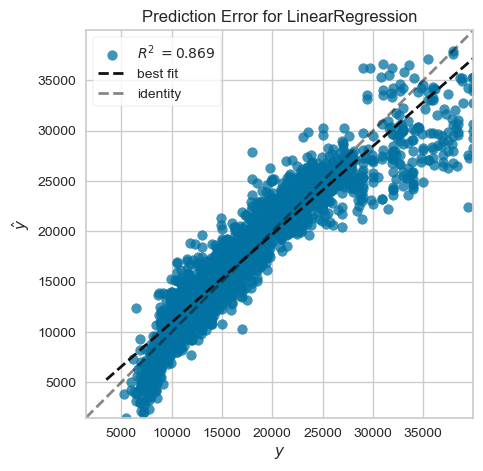

In [153]:
#Visualizing the result
visualizer = RadViz(size=(500, 1000))

visualizer = PredictionError(linear_m)
visualizer.fit(X_train_scaled, y_train) # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test) # Evaluate the model on the test data
visualizer.show();
#As we can see, there are some difference between the acual and the predicted line

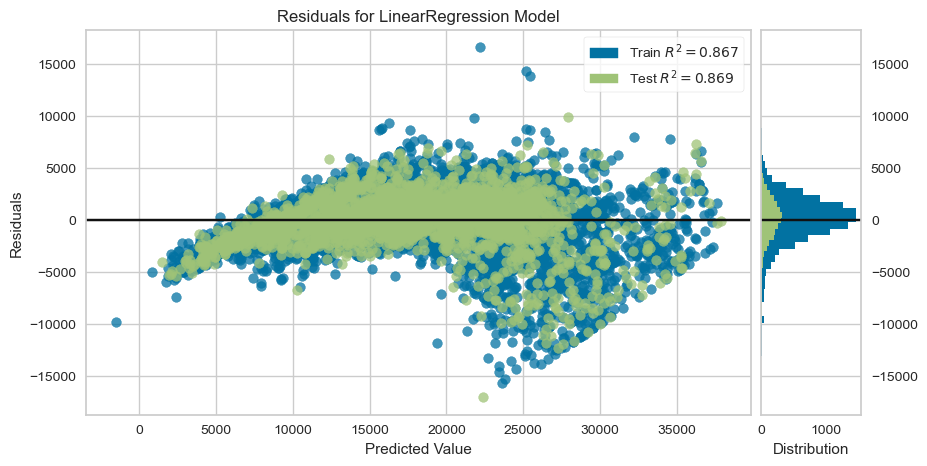

In [154]:
#Seeing the result with train and test for r2
visualizer = RadViz(size=(1000, 500))
visualizer = ResidualsPlot(linear_m)

visualizer.fit(X_train_scaled, y_train) # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test) # Evaluate the model on the test data
visualizer.show();
#As we can see, there are some mistakes

In [155]:
#Saving the result to use them later
linear_R2 = r2_score(y_test, y_pred)
linear_mae = mean_absolute_error(y_test, y_pred)
linear_rmse = mean_squared_error(y_test, y_pred, squared=False)

In [156]:
#Printing the result
print('linear_R2', linear_R2)
print('linear_mae', linear_mae)
print('linear_rmse', linear_rmse)

linear_R2 0.8694670283840308
linear_mae 1758.3653162757641
linear_rmse 2447.161729039157


## Ridge Model 

In [157]:
#Creaing Ridge model
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)

Ridge()

In [158]:
#Seeing the evaluation of the model
eval(ridge, X_train_scaled, y_train, X_test_scaled, y_test)
#As we can see, ther is no huge difference, so there is no overfitting

train        test
R2         0.867       0.869
mae     1769.156    1758.573
mse  6045751.615 5991831.172
rmse    2458.811    2447.822

In [159]:
#Creating crossvalidation
ridge_cro = Ridge()
scores = cross_validate(ridge_cro,
                        X_train_scaled,
                        y_train,
                        scoring=scoring,
                        cv=10,
                        return_train_score=True)
scores = pd.DataFrame(scores, index = range(1, 11))
scores

fit_time  score_time  test_r2  train_r2  test_neg_mean_absolute_error  \
1      0.012       0.003    0.871     0.867                     -1752.211   
2      0.011       0.003    0.864     0.867                     -1801.409   
3      0.013       0.003    0.862     0.867                     -1745.275   
4      0.011       0.005    0.871     0.867                     -1707.041   
5      0.011       0.003    0.859     0.868                     -1792.036   
6      0.010       0.003    0.857     0.868                     -1850.007   
7      0.010       0.005    0.871     0.866                     -1752.954   
8      0.011       0.004    0.868     0.867                     -1761.658   
9      0.011       0.004    0.871     0.866                     -1790.726   
10     0.010       0.007    0.858     0.868                     -1822.432   

    train_neg_mean_absolute_error  test_neg_mean_squared_error  \
1                       -1772.378                 -5869669.628   
2                       -1767.930                 -5928831.080   
3                       -1773.055                 -5980064.039   
4                       -1776.920                 -5626427.944   
5                       -1770.384                 -6141187.338   
6                       -1758.359                 -6827519.061   
7                       -1771.069                 -5824292.113   
8                       -1768.686                 -6145691.543   
9                       -1765.675                 -6428430.589   
10                      -1761.615                 -6484344.133   

    train_neg_mean_squared_error  test_neg_root_mean_squared_error  \
1                   -6067706.597                         -2422.740   
2                   -6062895.993                         -2434.919   
3                   -6055567.511                         -2445.417   
4                   -6093717.743                         -2372.009   
5                   -6039482.109                         -2478.142   
6                   -5960619.889                         -2612.952   
7                   -6074936.336                         -2413.357   
8                   -6037204.909                         -2479.051   
9                   -6018749.723                         -2535.435   
10                  -6006278.524                         -2546.438   

    train_neg_root_mean_squared_error  
1                           -2463.272  
2                           -2462.295  
3                           -2460.806  
4                           -2468.546  
5                           -2457.536  
6                           -2441.438  
7                           -2464.739  
8                           -2457.072  
9                           -2453.314  
10                          -2450.771

In [160]:
#Converting the scores to a dataframe
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                    0.865
train_r2                                   0.867
test_neg_mean_absolute_error           -1777.575
train_neg_mean_absolute_error          -1768.607
test_neg_mean_squared_error         -6125645.747
train_neg_mean_squared_error        -6041715.934
test_neg_root_mean_squared_error       -2474.046
train_neg_root_mean_squared_error      -2457.979
dtype: float64

In [161]:
#Creating gridSearch
alpha_space = np.linspace(0.001, 10, 100)

pipe_model = Ridge()

param_grid = {'alpha': alpha_space} 

ridge_grid_model = GridSearchCV(estimator=pipe_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          n_jobs = -1,
                          return_train_score=True)
ridge_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([1.000e-03, 1.020e-01, 2.030e-01, 3.040e-01, 4.050e-01, 5.060e-01,
       6.070e-01, 7.080e-01, 8.090e-01, 9.100e-01, 1.011e+00, 1.112e+00,
       1.213e+00, 1.314e+00, 1.415e+00, 1.516e+00, 1.617e+00, 1.718e+00,
       1.819e+00, 1.920e+00, 2.021e+00, 2.122e+00, 2.223e+00, 2.324e+00,
       2.425e+00, 2.526e+00, 2.627e+00, 2.728e+...
       6.667e+00, 6.768e+00, 6.869e+00, 6.970e+00, 7.071e+00, 7.172e+00,
       7.273e+00, 7.374e+00, 7.475e+00, 7.576e+00, 7.677e+00, 7.778e+00,
       7.879e+00, 7.980e+00, 8.081e+00, 8.182e+00, 8.283e+00, 8.384e+00,
       8.485e+00, 8.586e+00, 8.687e+00, 8.788e+00, 8.889e+00, 8.990e+00,
       9.091e+00, 9.192e+00, 9.293e+00, 9.394e+00, 9.495e+00, 9.596e+00,
       9.697e+00, 9.798e+00, 9.899e+00, 1.000e+01])},
             return_train_score=True, scoring='neg_mean_squared_error')

In [162]:
ridge_grid_model.best_params_

{'alpha': 2.5260000000000002}

In [163]:
#Creaing Ridge model with the parameters from gridSearch
ridge_m = Ridge(alpha= 3.0312727272727273)
ridge_m.fit(X_train_scaled, y_train)

Ridge(alpha=3.0312727272727273)

In [164]:
#Seeing the evaluation of the model
eval(ridge_m, X_train_scaled, y_train, X_test_scaled, y_test)
#As we can see, there is no overfitting

train        test
R2         0.867       0.869
mae     1768.687    1757.321
mse  6051757.664 5995400.034
rmse    2460.032    2448.551

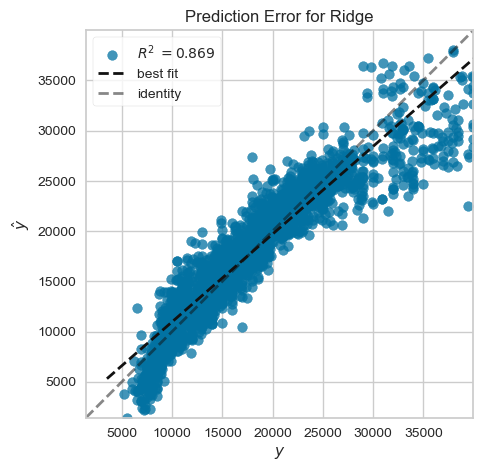

In [165]:
#Visualizing the result
visualizer = RadViz(size=(500, 1000))

visualizer = PredictionError(ridge_m)
visualizer.fit(X_train_scaled, y_train) # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test) # Evaluate the model on the test data
visualizer.show();
#As we can see, there are some difference between the acual and the predicted line

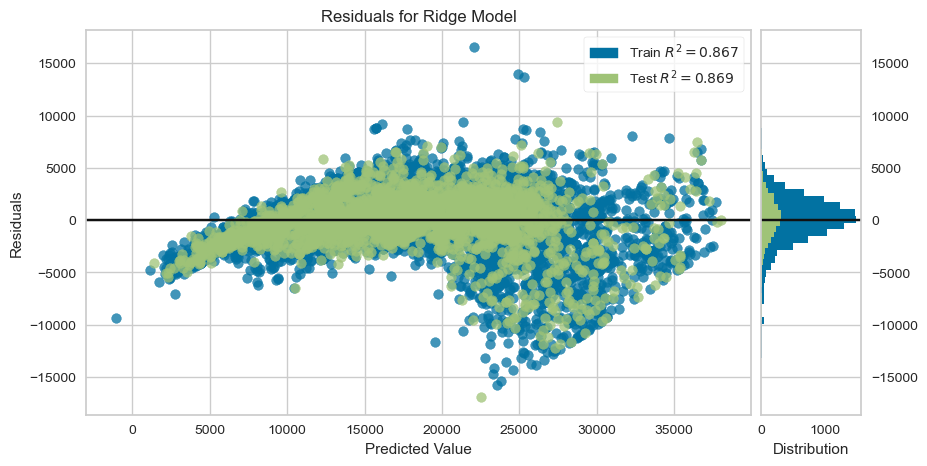

In [166]:
#Seeing the result with train and test for r2
visualizer = RadViz(size=(1000, 500))
visualizer = ResidualsPlot(ridge_m)

visualizer.fit(X_train_scaled, y_train) # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test) # Evaluate the model on the test data
visualizer.show();
#As we can see, there are some mistakes

In [167]:
#Prediction X_test
y_pred = ridge_m.predict(X_test_scaled)
rm_R2 = r2_score(y_test, y_pred)
rm_mae = mean_absolute_error(y_test, y_pred)
rm_rmse = mean_squared_error(y_test, y_pred, squared=False)

In [168]:
#Printing the result
print('ridge_R2', rm_R2)
print('ridge_mae', rm_mae)
print('ridge_rmse', rm_rmse)

ridge_R2 0.8693188201817106
ridge_mae 1757.3210301659738
ridge_rmse 2448.550598626757


## Lasso Model

In [169]:
#Creaing Lasso model
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)

Lasso()

In [170]:
#Seeing the evaluation of the model
eval(lasso, X_train_scaled, y_train, X_test_scaled, y_test)
#As we can see, ther is no huge difference, so there is no overfitting

train        test
R2         0.867       0.869
mae     1770.001    1758.080
mse  6052405.234 5997964.739
rmse    2460.164    2449.074

In [171]:
#Creating crossvalidation
lasso_cro = Lasso()
scores = cross_validate(lasso_cro,
                        X_train_scaled,
                        y_train,
                        scoring=scoring,
                        cv=10,
                        return_train_score=True)
scores = pd.DataFrame(scores, index = range(1, 11))
scores

fit_time  score_time  test_r2  train_r2  test_neg_mean_absolute_error  \
1      0.195       0.003    0.871     0.866                     -1752.413   
2      0.254       0.004    0.865     0.867                     -1794.888   
3      0.179       0.005    0.862     0.867                     -1748.794   
4      0.160       0.004    0.871     0.866                     -1704.956   
5      0.293       0.005    0.859     0.868                     -1793.523   
6      0.234       0.003    0.857     0.868                     -1850.627   
7      0.243       0.003    0.871     0.866                     -1752.554   
8      0.198       0.003    0.868     0.867                     -1763.066   
9      0.169       0.005    0.872     0.866                     -1788.197   
10     0.168       0.003    0.860     0.868                     -1818.855   

    train_neg_mean_absolute_error  test_neg_mean_squared_error  \
1                       -1773.006                 -5870602.974   
2                       -1768.666                 -5892850.647   
3                       -1773.721                 -5995910.607   
4                       -1778.056                 -5605926.670   
5                       -1771.318                 -6151206.612   
6                       -1759.454                 -6831259.907   
7                       -1771.514                 -5811108.716   
8                       -1769.304                 -6147771.982   
9                       -1766.930                 -6380004.176   
10                      -1763.630                 -6400516.077   

    train_neg_mean_squared_error  test_neg_root_mean_squared_error  \
1                   -6074064.425                         -2422.933   
2                   -6070031.347                         -2427.519   
3                   -6061896.388                         -2448.655   
4                   -6100610.814                         -2367.684   
5                   -6045763.432                         -2480.163   
6                   -5967147.822                         -2613.668   
7                   -6080709.330                         -2410.624   
8                   -6043634.768                         -2479.470   
9                   -6024004.355                         -2525.867   
10                  -6015682.323                         -2529.924   

    train_neg_root_mean_squared_error  
1                           -2464.562  
2                           -2463.743  
3                           -2462.092  
4                           -2469.941  
5                           -2458.813  
6                           -2442.775  
7                           -2465.909  
8                           -2458.381  
9                           -2454.385  
10                          -2452.689

In [172]:
#Converting the scores to a dataframe
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                    0.865
train_r2                                   0.867
test_neg_mean_absolute_error           -1776.787
train_neg_mean_absolute_error          -1769.560
test_neg_mean_squared_error         -6108715.837
train_neg_mean_squared_error        -6048354.500
test_neg_root_mean_squared_error       -2470.651
train_neg_root_mean_squared_error      -2459.329
dtype: float64

In [173]:
#Creating gridSearch

pipe_model = Lasso()


lasso_grid_model = GridSearchCV(estimator=pipe_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          n_jobs = -1,
                          return_train_score=True)
lasso_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([1.000e-03, 1.020e-01, 2.030e-01, 3.040e-01, 4.050e-01, 5.060e-01,
       6.070e-01, 7.080e-01, 8.090e-01, 9.100e-01, 1.011e+00, 1.112e+00,
       1.213e+00, 1.314e+00, 1.415e+00, 1.516e+00, 1.617e+00, 1.718e+00,
       1.819e+00, 1.920e+00, 2.021e+00, 2.122e+00, 2.223e+00, 2.324e+00,
       2.425e+00, 2.526e+00, 2.627e+00, 2.728e+...
       6.667e+00, 6.768e+00, 6.869e+00, 6.970e+00, 7.071e+00, 7.172e+00,
       7.273e+00, 7.374e+00, 7.475e+00, 7.576e+00, 7.677e+00, 7.778e+00,
       7.879e+00, 7.980e+00, 8.081e+00, 8.182e+00, 8.283e+00, 8.384e+00,
       8.485e+00, 8.586e+00, 8.687e+00, 8.788e+00, 8.889e+00, 8.990e+00,
       9.091e+00, 9.192e+00, 9.293e+00, 9.394e+00, 9.495e+00, 9.596e+00,
       9.697e+00, 9.798e+00, 9.899e+00, 1.000e+01])},
             return_train_score=True, scoring='neg_mean_squared_error')

In [174]:
lasso_grid_model.best_params_

{'alpha': 1.718}

In [175]:
#Creaing Ridge model with the parameters from gridSearch
lasso_m = Lasso(alpha= 2.021181818181818)
lasso_m.fit(X_train_scaled, y_train)

Lasso(alpha=2.021181818181818)

In [176]:
#Seeing the evaluation of the model
eval(lasso_m, X_train_scaled, y_train, X_test_scaled, y_test)
#As we can see, there is no overfitting

train        test
R2         0.867       0.869
mae     1771.038    1757.169
mse  6065850.331 6006028.628
rmse    2462.895    2450.720

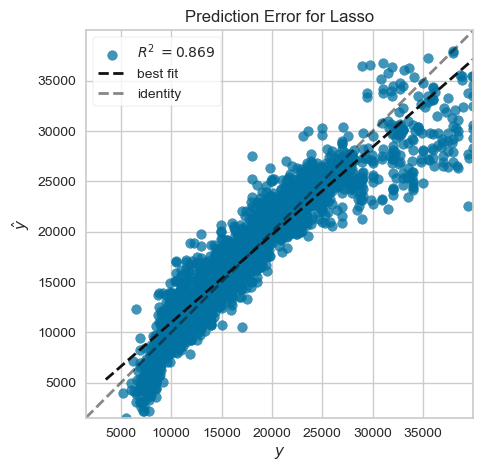

In [177]:
#Visualizing the result
visualizer = RadViz(size=(500, 1000))

visualizer = PredictionError(lasso_m)
visualizer.fit(X_train_scaled, y_train) # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test) # Evaluate the model on the test data
visualizer.show();
#As we can see, there are some difference between the acual and the predicted line

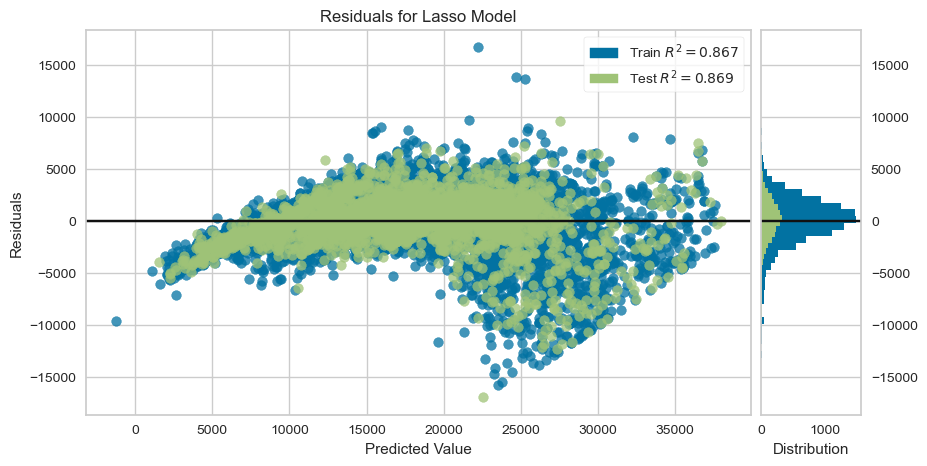

In [178]:
#Seeing the result with train and test for r2
visualizer = RadViz(size=(1000, 500))
visualizer = ResidualsPlot(lasso_m)

visualizer.fit(X_train_scaled, y_train) # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test) # Evaluate the model on the test data
visualizer.show();
#As we can see, there are some mistakes

In [179]:
#Prediction X_test
y_pred = lasso_m.predict(X_test_scaled)
l_R2 = r2_score(y_test, y_pred)
l_mae = mean_absolute_error(y_test, y_pred)
l_rmse = mean_squared_error(y_test, y_pred, squared=False)

In [180]:
#Printing the result
print('ridge_R2', l_R2)
print('ridge_mae', l_mae)
print('ridge_rmse', l_rmse)

ridge_R2 0.8690871497042422
ridge_mae 1757.1686989122488
ridge_rmse 2450.72002234423


## Elastic-Net Model 

In [181]:
#Creaing Lasso model
en = ElasticNet()
en.fit(X_train_scaled, y_train)

ElasticNet()

In [182]:
#Seeing the evaluation of the model
eval(en, X_train_scaled, y_train, X_test_scaled, y_test)
#As we can see, the result is so bad, so i am going to do gridsearch

train         test
R2          0.471        0.470
mae      3796.552     3811.281
mse  24063774.456 24318416.206
rmse     4905.484     4931.371

In [183]:
#Creating crossvalidation
en_model = ElasticNet()
scores = cross_validate(en_model,
                        X_train_scaled,
                        y_train,
                        scoring=scoring,
                        cv=10,
                        return_train_score=True)
scores = pd.DataFrame(scores, index = range(1, 11))
scores

fit_time  score_time  test_r2  train_r2  test_neg_mean_absolute_error  \
1      0.019       0.004    0.465     0.471                     -3842.596   
2      0.025       0.003    0.481     0.470                     -3774.786   
3      0.023       0.004    0.472     0.472                     -3691.568   
4      0.017       0.004    0.479     0.470                     -3703.833   
5      0.014       0.004    0.460     0.473                     -3745.767   
6      0.016       0.003    0.465     0.470                     -3859.061   
7      0.017       0.004    0.482     0.469                     -3761.961   
8      0.025       0.004    0.466     0.471                     -3809.954   
9      0.017       0.004    0.464     0.469                     -3988.132   
10     0.014       0.003    0.464     0.472                     -3806.971   

    train_neg_mean_absolute_error  test_neg_mean_squared_error  \
1                       -3791.740                -24287611.025   
2                       -3799.047                -22669004.165   
3                       -3804.210                -22928749.838   
4                       -3806.946                -22640945.561   
5                       -3801.855                -23532257.015   
6                       -3791.764                -25504406.396   
7                       -3797.812                -23431614.182   
8                       -3796.287                -24781815.371   
9                       -3783.596                -26663778.638   
10                      -3791.376                -24451989.011   

    train_neg_mean_squared_error  test_neg_root_mean_squared_error  \
1                  -24041857.738                         -4928.246   
2                  -24178699.910                         -4761.198   
3                  -24134822.502                         -4788.397   
4                  -24189474.254                         -4758.250   
5                  -24061125.490                         -4851.006   
6                  -23940898.378                         -5050.189   
7                  -24160011.877                         -4840.621   
8                  -24005122.777                         -4978.134   
9                  -23901727.662                         -5163.698   
10                 -24008339.522                         -4944.895   

    train_neg_root_mean_squared_error  
1                           -4903.250  
2                           -4917.184  
3                           -4912.720  
4                           -4918.280  
5                           -4905.214  
6                           -4892.944  
7                           -4915.283  
8                           -4899.502  
9                           -4888.939  
10                          -4899.831

In [184]:
#Converting the scores to a dataframe
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()
#The result is so bad

test_r2                                     0.470
train_r2                                    0.471
test_neg_mean_absolute_error            -3798.463
train_neg_mean_absolute_error           -3796.463
test_neg_mean_squared_error         -24089217.120
train_neg_mean_squared_error        -24062208.011
test_neg_root_mean_squared_error        -4906.463
train_neg_root_mean_squared_error       -4905.315
dtype: float64

In [185]:
#Creating gridSearch

pipe_model = ElasticNet()


en_grid_model = GridSearchCV(estimator=pipe_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          n_jobs = -1,
                          return_train_score=True)
en_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': array([1.000e-03, 1.020e-01, 2.030e-01, 3.040e-01, 4.050e-01, 5.060e-01,
       6.070e-01, 7.080e-01, 8.090e-01, 9.100e-01, 1.011e+00, 1.112e+00,
       1.213e+00, 1.314e+00, 1.415e+00, 1.516e+00, 1.617e+00, 1.718e+00,
       1.819e+00, 1.920e+00, 2.021e+00, 2.122e+00, 2.223e+00, 2.324e+00,
       2.425e+00, 2.526e+00, 2.627e+00, 2....
       6.667e+00, 6.768e+00, 6.869e+00, 6.970e+00, 7.071e+00, 7.172e+00,
       7.273e+00, 7.374e+00, 7.475e+00, 7.576e+00, 7.677e+00, 7.778e+00,
       7.879e+00, 7.980e+00, 8.081e+00, 8.182e+00, 8.283e+00, 8.384e+00,
       8.485e+00, 8.586e+00, 8.687e+00, 8.788e+00, 8.889e+00, 8.990e+00,
       9.091e+00, 9.192e+00, 9.293e+00, 9.394e+00, 9.495e+00, 9.596e+00,
       9.697e+00, 9.798e+00, 9.899e+00, 1.000e+01])},
             return_train_score=True, scoring='neg_mean_squared_error')

In [186]:
en_grid_model.best_params_

{'alpha': 0.001}

In [187]:
#Creaing Ridge model with the parameters from gridSearch
en_m = Lasso(alpha= 0.001)
en_m.fit(X_train_scaled, y_train)

Lasso(alpha=0.001)

In [188]:
#Seeing the evaluation of the model
eval(en_m, X_train_scaled, y_train, X_test_scaled, y_test)
#As we can see, there is no overfitting and it is much better than before gridsearch

train        test
R2         0.867       0.869
mae     1769.568    1759.526
mse  6044794.665 5991423.036
rmse    2458.616    2447.738

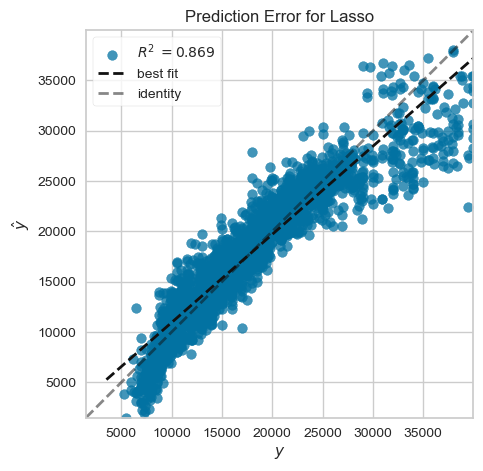

In [189]:
#Visualizing the result
visualizer = RadViz(size=(500, 1000))

visualizer = PredictionError(en_m)
visualizer.fit(X_train_scaled, y_train) # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test) # Evaluate the model on the test data
visualizer.show();
#As we can see, there are some difference between the acual and the predicted line

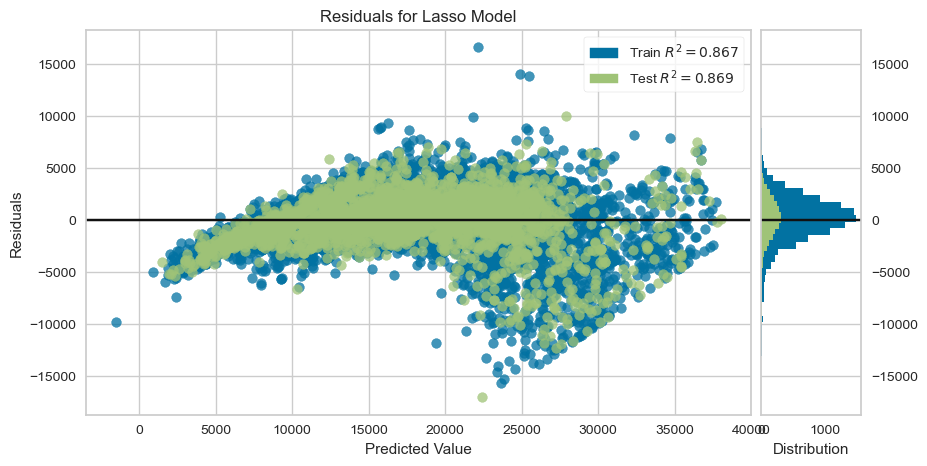

In [190]:
#Seeing the result with train and test for r2
visualizer = RadViz(size=(1000, 500))
visualizer = ResidualsPlot(en_m)

visualizer.fit(X_train_scaled, y_train) # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test) # Evaluate the model on the test data
visualizer.show();
#As we can see, there are some mistakes

In [191]:
#Prediction X_test
y_pred = en_m.predict(X_test_scaled)
en_R2 = r2_score(y_test, y_pred)
en_mae = mean_absolute_error(y_test, y_pred)
en_rmse = mean_squared_error(y_test, y_pred, squared=False)

In [192]:
#Printing the result
print('ridge_R2', en_R2)
print('ridge_mae', en_mae)
print('ridge_rmse', en_rmse)

ridge_R2 0.869405506437116
ridge_mae 1759.5259710052837
ridge_rmse 2447.7383512394777


## XG Boost Model

In [193]:
#Creating XG boost model
xg_model = XGBRegressor(random_state=s)

operations = [("encoder", trans), ("XG_model", xg_model)]

pipe_model = Pipeline(steps=operations)
#Fitting the model
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  Index(['make_model', 'body_type', 'Type', 'Fuel', 'Paint_Type',
       'Upholstery_type', 'Gearing_Type', 'Drive_chain'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('XG_model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              cols...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=101, ...))])

In [194]:
#Seeing the result of the model
eval(pipe_model, X_train, y_train, X_test, y_test)
#As we can see, the result of r2 is good and not so bad. However, if look on the others we can see a huge overfitting.
#I will try to use gridSearch and use the best params and see if the result will change or not.

train        test
R2        0.982       0.953
mae     654.307    1002.326
mse  816834.370 2133779.476
rmse    903.789    1460.746

In [195]:
#Creating crossvalidation
operations = [("encoder", trans), ("XG_model", xg_model)]
model = Pipeline(steps=operations)

scores = cross_validate(
    model, X_train, y_train, scoring=scoring, cv=10, n_jobs=-1, return_train_score=True
)

pd.DataFrame(scores)
pd.DataFrame(scores).iloc[:, 2:].mean()
#We can see the same here as well, the result of the metrics like mean squared error and the others 
#except for the r2 show an overfitting.

test_r2                                    0.946
train_r2                                   0.983
test_neg_mean_absolute_error           -1041.684
train_neg_mean_absolute_error           -639.691
test_neg_mean_squared_error         -2444983.166
train_neg_mean_squared_error         -774781.885
test_neg_root_mean_squared_error       -1562.330
train_neg_root_mean_squared_error       -880.163
dtype: float64

In [196]:
model.get_params()

{'memory': None,
 'steps': [('encoder',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('ordinalencoder', OrdinalEncoder(),
                                    Index(['make_model', 'body_type', 'Type', 'Fuel', 'Paint_Type',
          'Upholstery_type', 'Gearing_Type', 'Drive_chain'],
         dtype='object'))],
                     verbose_feature_names_out=False)),
  ('XG_model',
   XGBRegressor(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
              

In [164]:
#Creating scoring for gridSearch
scoring2 = 'neg_root_mean_squared_error'

In [201]:
#Creating the params of gridSearch
param_grid = {
    'XG_model__n_estimators': [200, 300, 400, 500],
    'XG_model__max_depth': [6, 8, 10, 12],
    'XG_model__learning_rate': [2.0, 1.0, 0.1]
}
#Creating the operations of the gridSearch
operations = [("encoder", trans), ("XG_model", xg_model)]
#Creating a pipeline with the operations as steps
gr_xg = Pipeline(steps=operations)
#Creating the gridSearch
xg_grid = GridSearchCV(gr_xg,
                          param_grid=param_grid,
                          scoring= scoring2,
                          cv=5,
                          verbose=1,
                          return_train_score=True)
#Fitting the gridSearch 
xg_grid.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(),
                                                                         Index(['make_model', 'body_type', 'Type', 'Fuel', 'Paint_Type',
       'Upholstery_type', 'Gearing_Type', 'Drive_chain'],
      dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('XG_model',
                                        XGBRegressor(base_score=None,
                                                     boos...
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=101, ...))]),
             param_grid={'XG_model__learning_rate': [2.0, 1.0, 0.1],
                         'XG_model__max_depth': [6, 8, 10, 12],
                         'XG_model__n_estimators': [200, 300, 400, 500]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

In [202]:
#Seeing the best params of the gridSearch to use it 
xg_grid.best_params_

{'XG_model__learning_rate': 0.1,
 'XG_model__max_depth': 6,
 'XG_model__n_estimators': 500}

In [203]:
#seeing the result of the grid search model
eval(xg_grid, X_train, y_train, X_test, y_test)
#From here, we can see that the result is better now, but for mse, it is still huge.

train        test
R2        0.988       0.957
mae     537.512     960.837
mse  551824.423 1973835.535
rmse    742.849    1404.933

In [204]:
#Creating the model of rf with the best params
xg = XGBRegressor(random_state=s, learning_rate = 0.1, n_estimators=500, max_depth = 6)

#the operations of the pipeline
operations = [("encoder", trans), ("XG_model", xg_model)]
#Creating the pipeline
pipe_xg = Pipeline(steps=operations)
#Fitting the model with the training data
pipe_xg.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  Index(['make_model', 'body_type', 'Type', 'Fuel', 'Paint_Type',
       'Upholstery_type', 'Gearing_Type', 'Drive_chain'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('XG_model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              cols...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=101, ...))])

In [205]:
#Seeing the result
eval(pipe_xg, X_train, y_train, X_test, y_test)
#As we can see, there is a huge overfitting in the other result, not r2.

train        test
R2        0.982       0.953
mae     654.307    1002.326
mse  816834.370 2133779.476
rmse    903.789    1460.746

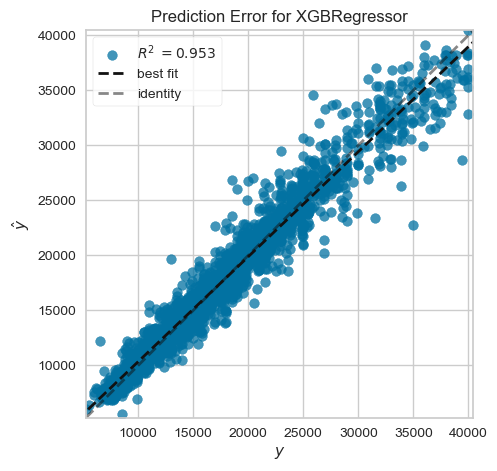

In [206]:
#Visualizing the result
visualizer = RadViz(size=(500, 1000))

visualizer = PredictionError(pipe_xg)
visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data
visualizer.show();
#As we can see, 

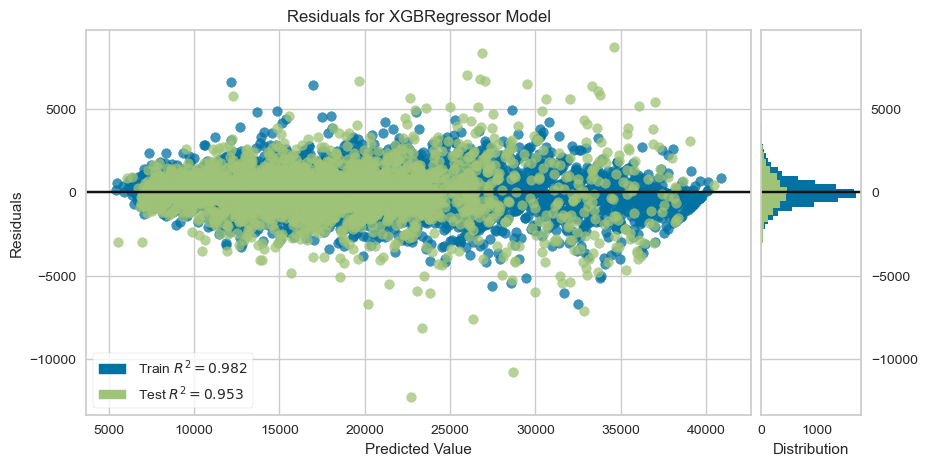

In [207]:
#Seeing the result with train and test for r2
visualizer = RadViz(size=(1000, 500))
visualizer = ResidualsPlot(pipe_xg)

visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data
visualizer.show();
#As we can see, there are some mistakes, and it started from about 30000

In [208]:
#Prediction X_test
y_pred = pipe_xg.predict(X_test)

In [209]:
#Saving the result to use them later
xg_R2 = r2_score(y_test, y_pred)
xg_mae = mean_absolute_error(y_test, y_pred)
xg_rmse = mean_squared_error(y_test, y_pred, squared=False)

In [210]:
#Printing the result
print('linear_R2', xg_R2)
print('linear_mae', xg_mae)
print('linear_rmse', xg_rmse)

linear_R2 0.9534902061887829
linear_mae 1002.3260524942253
linear_rmse 1460.7462052057924


### Vanilla RF Model

In [211]:
#Creating vanilla rf model
rf = RandomForestRegressor(random_state=s)

operations = [("encoder", trans), ("RF_model", rf)]
pipe_model = Pipeline(steps=operations)
pipe_model.fit(X_train, y_train)


#Note that, in the trees family, we do not use scaling for the data, as it is a great family

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  Index(['make_model', 'body_type', 'Type', 'Fuel', 'Paint_Type',
       'Upholstery_type', 'Gearing_Type', 'Drive_chain'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('RF_model', RandomForestRegressor(random_state=101))])

In [212]:
#Seeing the result of the model
eval(pipe_model, X_train, y_train, X_test, y_test)
#As we can see, the result of r2 is good and not so bad. However, if look on the others we can see a huge overfitting.
#I will try to use gridSearch and use the best params and see if the result will change or not.

train        test
R2        0.993       0.951
mae     369.540     970.162
mse  335533.456 2229049.270
rmse    579.252    1493.000

In [213]:
#Creating crossvalidation
operations = [("encoder", trans), ("RF_model", rf)]
model = Pipeline(steps=operations)

scores = cross_validate(
    model, X_train, y_train, scoring=scoring, cv=10, n_jobs=-1, return_train_score=True
)

pd.DataFrame(scores)
pd.DataFrame(scores).iloc[:, 2:].mean()
#We can see the same here as well, the result of the metrics like mean squared error and the others 
#except for the r2 show an overfitting.

test_r2                                    0.947
train_r2                                   0.992
test_neg_mean_absolute_error            -995.581
train_neg_mean_absolute_error           -372.931
test_neg_mean_squared_error         -2419519.265
train_neg_mean_squared_error         -342802.279
test_neg_root_mean_squared_error       -1553.370
train_neg_root_mean_squared_error       -585.478
dtype: float64

In [214]:
#Creating the params of gridSearch
param_grid = {
    "RF_model__n_estimators": [200, 300, 400],
    "RF_model__max_depth": [6, 8, 10],
    'RF_model__max_features':[2, 4, 6, 8, 'sqrt'],
}
#Creating the operations of the gridSearch
operations = [("encoder", trans), ("RF_model", rf)]
#Creating a pipeline with the operations as steps
gr_rf = Pipeline(steps=operations)
#Creating the gridSearch
rf_grid = GridSearchCV(gr_rf,
                          param_grid=param_grid,
                          scoring= scoring2,
                          cv=5,
                          verbose=1,
                          return_train_score=True)
#Fitting the gridSearch 
rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(),
                                                                         Index(['make_model', 'body_type', 'Type', 'Fuel', 'Paint_Type',
       'Upholstery_type', 'Gearing_Type', 'Drive_chain'],
      dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('RF_model',
                                        RandomForestRegressor(random_state=101))]),
             param_grid={'RF_model__max_depth': [6, 8, 10],
                         'RF_model__max_features': [2, 4, 6, 8, 'sqrt'],
                         'RF_model__n_estimators': [200, 300, 400]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

In [215]:
#Seeing the best params of the gridSearch to use it 
rf_grid.best_params_

{'RF_model__max_depth': 10,
 'RF_model__max_features': 8,
 'RF_model__n_estimators': 400}

In [216]:
pd.DataFrame(rf_grid.cv_results_).loc[
    rf_grid.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score    -1655.964
mean_train_score   -1278.017
Name: 41, dtype: object

In [217]:
rf_grid.best_score_

-1655.9639405716123

In [218]:
#seeing the result of the grid search model
eval(rf_grid, X_train, y_train, X_test, y_test)
#From here, we can see that the result is better now, but for mse, it is still huge.

train        test
R2         0.963       0.946
mae      926.927    1081.839
mse  1690694.478 2464465.344
rmse    1300.267    1569.862

In [219]:
#Creating the model of rf with the best params
rf = RandomForestRegressor(random_state=s, max_depth = 10, n_estimators=400, max_features = 8)

#the operations of the pipeline
operations = [("encoder", trans), ("RF_model", rf)]
#Creating the pipeline
pipe_rf = Pipeline(steps=operations)
#Fitting the model with the training data
pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  Index(['make_model', 'body_type', 'Type', 'Fuel', 'Paint_Type',
       'Upholstery_type', 'Gearing_Type', 'Drive_chain'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestRegressor(max_depth=10, max_features=8,
                                       n_estimators=400, random_state=101))])

In [220]:
#Seeing the result
eval(pipe_rf, X_train, y_train, X_test, y_test)
#As we can see, the result changed here with the params, and the overfitting decreased and it looks much better than the previous one.

train        test
R2         0.963       0.946
mae      926.927    1081.839
mse  1690694.478 2464465.344
rmse    1300.267    1569.862

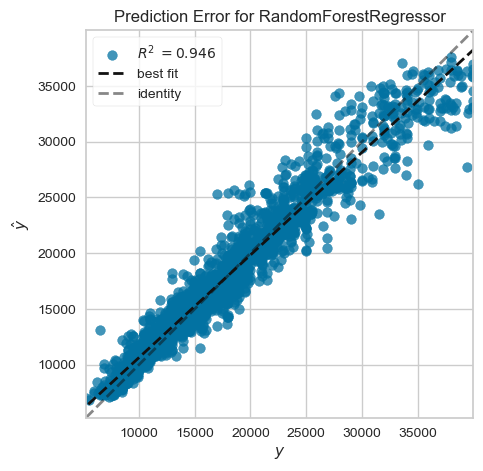

In [221]:
#Visualizing the result
visualizer = RadViz(size=(500, 1000))

visualizer = PredictionError(pipe_rf)
visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data
visualizer.show();
#As we can see, there are some difference between the acual and the predicted line, it nearly started to be different from around 30000

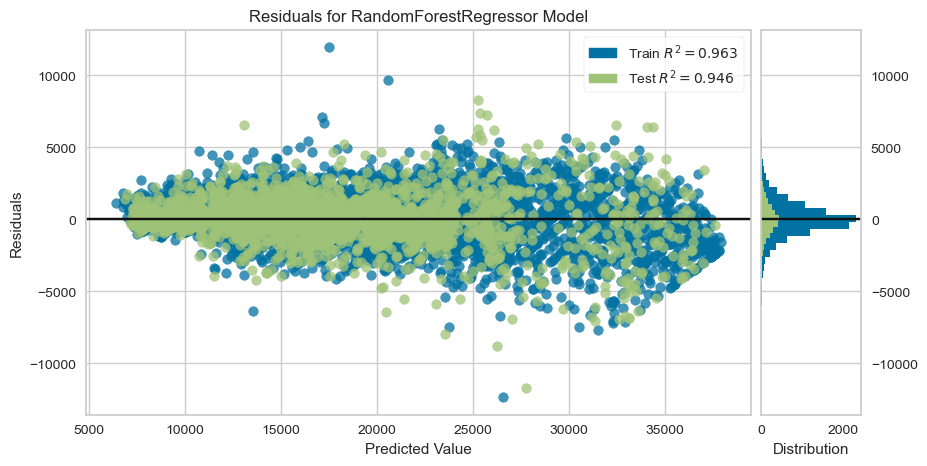

In [222]:
#Seeing the result with train and test for r2
visualizer = RadViz(size=(1000, 500))
visualizer = ResidualsPlot(pipe_rf)

visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data
visualizer.show();
#As we can see, there are some mistakes, and it started from about 30000

In [223]:
#Prediction X_test
y_pred = pipe_rf.predict(X_test)

In [224]:
#Saving the result to use them later
rf_R2 = r2_score(y_test, y_pred)
rf_mae = mean_absolute_error(y_test, y_pred)
rf_rmse = mean_squared_error(y_test, y_pred, squared=False)

In [225]:
#Printing the result
print('linear_R2', rf_R2)
print('linear_mae', rf_mae)
print('linear_rmse', rf_rmse)

linear_R2 0.9462822769303629
linear_mae 1081.8392967943787
linear_rmse 1569.8615682848022


In [226]:
#Creating the features to use them in the visualizing
features = pipe_rf["encoder"].get_feature_names_out()
features

array(['make_model', 'body_type', 'Type', 'Fuel', 'Paint_Type',
       'Upholstery_type', 'Gearing_Type', 'Drive_chain', 'km', 'Gears',
       'Comfort_Convenience', 'Entertainment_Media', 'Extras',
       'Safety_Security', 'age', 'Previous_Owners', 'hp_kW',
       'Inspection_new', 'Displacement_cc', 'Weight_kg', 'cons_comb'],
      dtype=object)

In [227]:
#Creating a dataframe of the features
rf_feature_imp = pd.DataFrame(data=pipe_rf["RF_model"].feature_importances_,
                              index = features,
                              columns=["Feature Importance"])

rf_feature_imp = rf_feature_imp.sort_values("Feature Importance", ascending=False)
rf_feature_imp

Feature Importance
hp_kW                             0.271
age                               0.150
make_model                        0.119
km                                0.111
Gears                             0.108
Weight_kg                         0.077
Gearing_Type                      0.031
Type                              0.027
Displacement_cc                   0.027
cons_comb                         0.022
body_type                         0.020
Comfort_Convenience               0.019
Upholstery_type                   0.006
Safety_Security                   0.005
Entertainment_Media               0.003
Extras                            0.002
Fuel                              0.002
Previous_Owners                   0.001
Inspection_new                    0.001
Paint_Type                        0.000
Drive_chain                       0.000

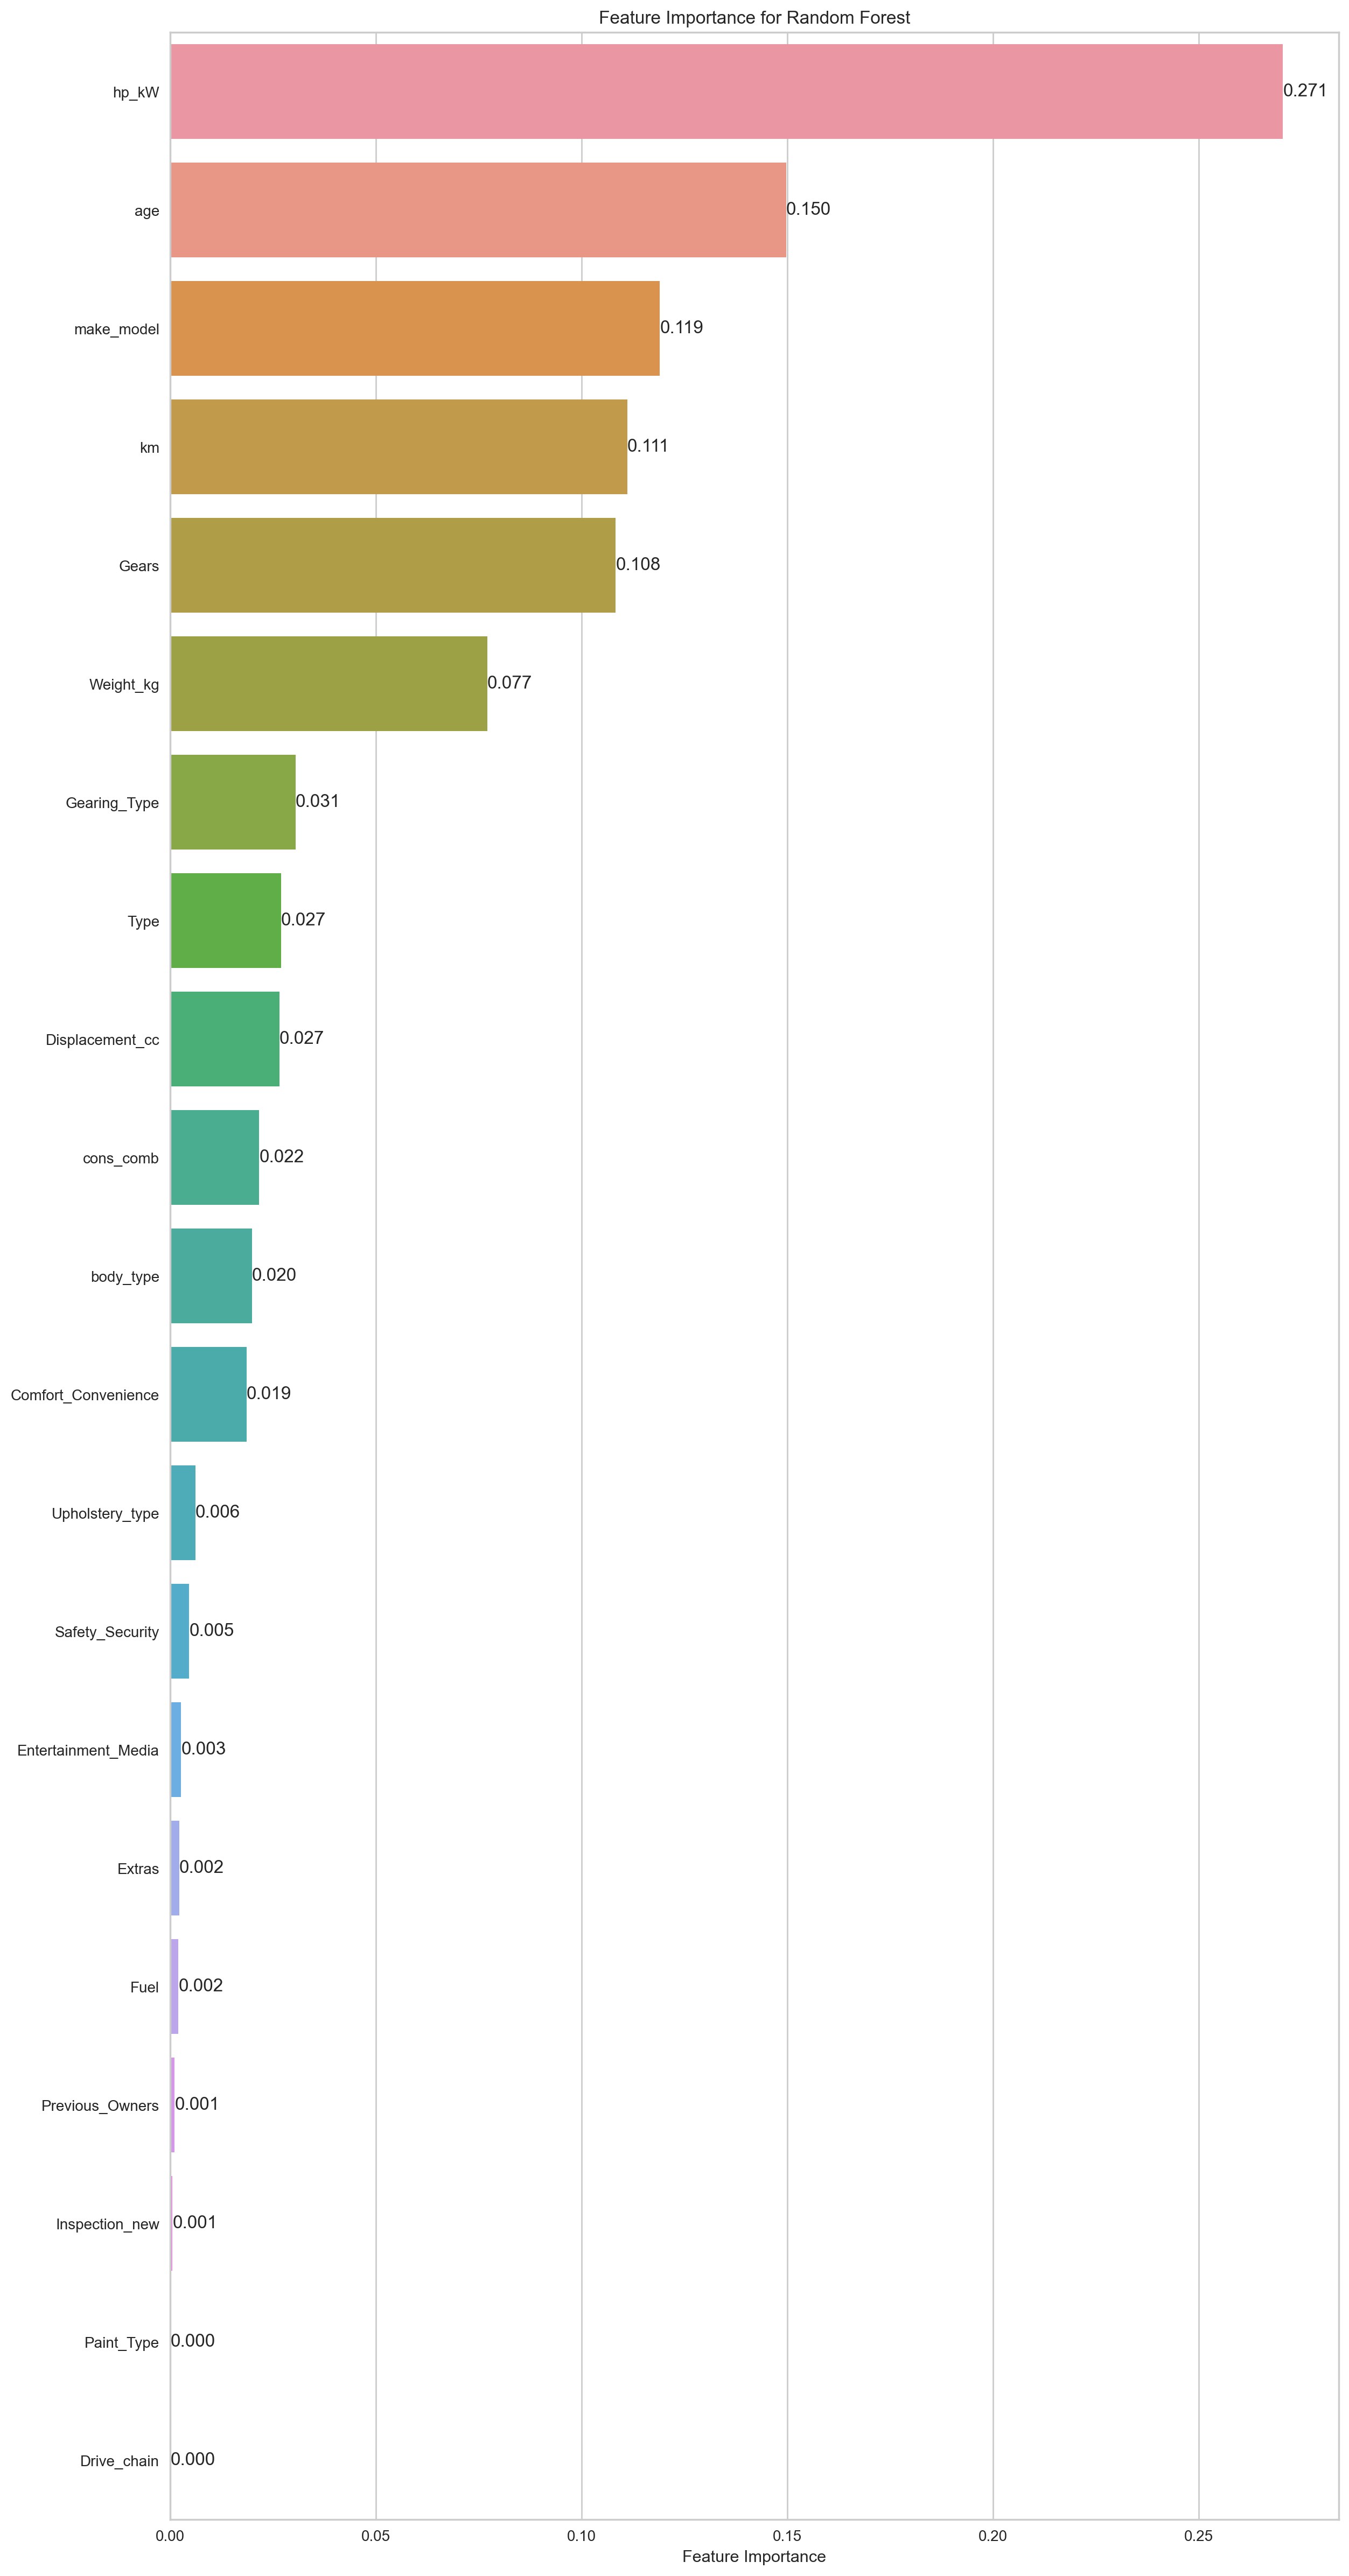

In [228]:
#Plotting the feature importance 
plt.figure(figsize=(14, 30), dpi=200)
ax = sns.barplot(x=rf_feature_imp["Feature Importance"],
                 y=rf_feature_imp.index)

ax.bar_label(ax.containers[0],fmt="%.3f")
plt.title("Feature Importance for Random Forest")
plt.show()
#From here we can see the importance of the features, I will take 6 of them and see the result
#['hp_kW', 'age', 'km', 'Gears', 'make_model']

In [229]:
# Create and train the RandomForestRegressor model
rf = RandomForestRegressor(random_state=s, max_depth = 10, n_estimators=400, max_features = 'sqrt')
rf.fit(X_train_trans, y_train)

# Get the feature importances
importances = rf.feature_importances_

# Sort the feature importances in descending order
sorted_indices = importances.argsort()[::-1]

# Print the feature importance ranking
for feature_idx in sorted_indices:
    print(f"{features[feature_idx]}: {importances[feature_idx]}")

hp_kW: 0.19150447076201146
age: 0.12942392154664722
Gears: 0.11453535782986518
km: 0.10658145315077931
make_model: 0.102949400006426
Weight_kg: 0.08403861329439527
Displacement_cc: 0.04787815726380892
Type: 0.040083146694755725
Gearing_Type: 0.03934885969593199
cons_comb: 0.03738215100373892
Comfort_Convenience: 0.031210688753030236
body_type: 0.02918159967376044
Upholstery_type: 0.019178173474559374
Safety_Security: 0.010211153153378429
Extras: 0.005135228184218212
Fuel: 0.004314329578881089
Entertainment_Media: 0.0038742992349901284
Previous_Owners: 0.0016343219806420777
Inspection_new: 0.0009778003522185072
Paint_Type: 0.00029111314563036976
Drive_chain: 0.0002657612203311048


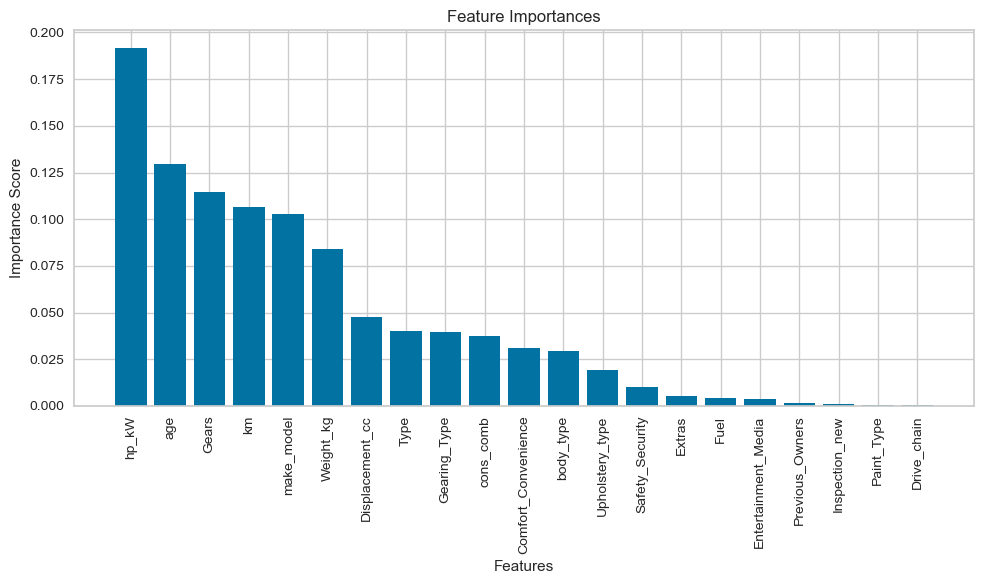

In [230]:
# Get the feature importances
importances = rf.feature_importances_

# Sort the feature importances in descending order
sorted_indices = importances.argsort()[::-1]

# Sort the feature names based on importance scores
sorted_features = np.array(features)[sorted_indices]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[sorted_indices])
plt.xticks(range(len(importances)), sorted_features, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

In [231]:
scores = {"linear_m": {"r2_score": linear_R2 ,
 "mae": linear_mae,
 "rmse": linear_rmse},

 "ridge_m": {"r2_score": rm_R2,
 "mae": rm_mae,
 "rmse": rm_rmse},

 "lasso_m": {"r2_score": l_R2,
 "mae": l_mae,
 "rmse": l_rmse},

 "elastic_m": {"r2_score": en_R2,
 "mae": en_mae,
 "rmse": en_rmse},
         
 "rf_m": {"r2_score": rf_R2,
 "mae": rf_mae,
 "rmse": rf_rmse},   


 "xg_m": {"r2_score": xg_R2,
 "mae": xg_mae ,
 "rmse": xg_rmse}}
scores = pd.DataFrame(scores).T
scores

r2_score      mae     rmse
linear_m      0.869 1758.365 2447.162
ridge_m       0.869 1757.321 2448.551
lasso_m       0.869 1757.169 2450.720
elastic_m     0.869 1759.526 2447.738
rf_m          0.946 1081.839 1569.862
xg_m          0.953 1002.326 1460.746

#### Comparing Models Performance In a Graph

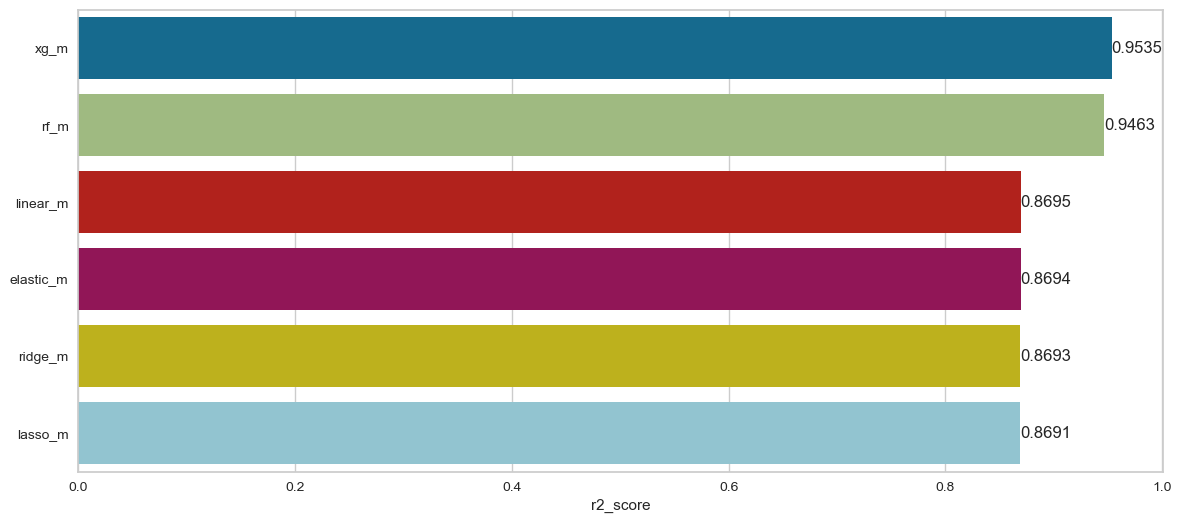

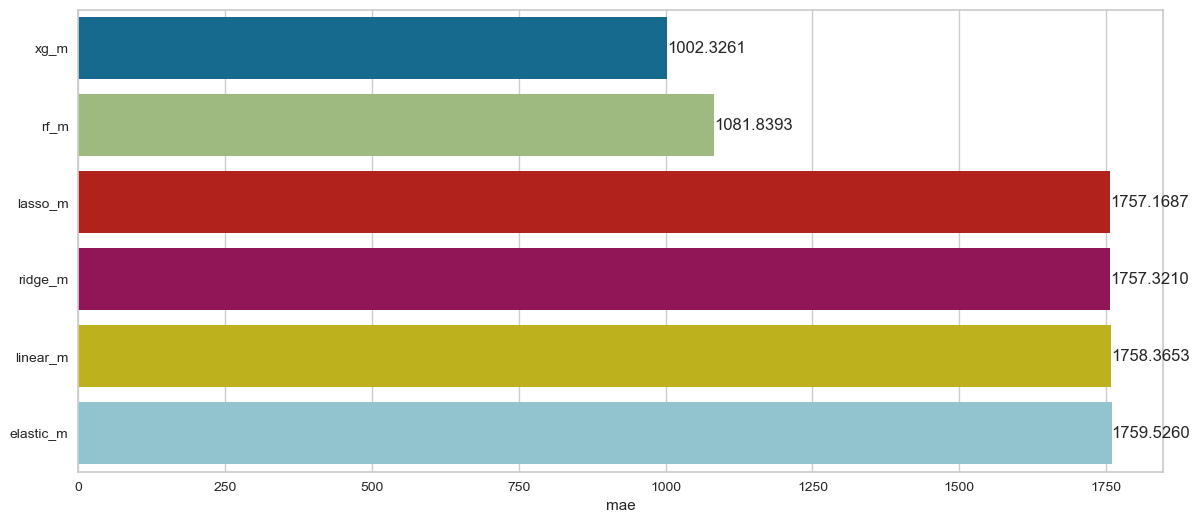

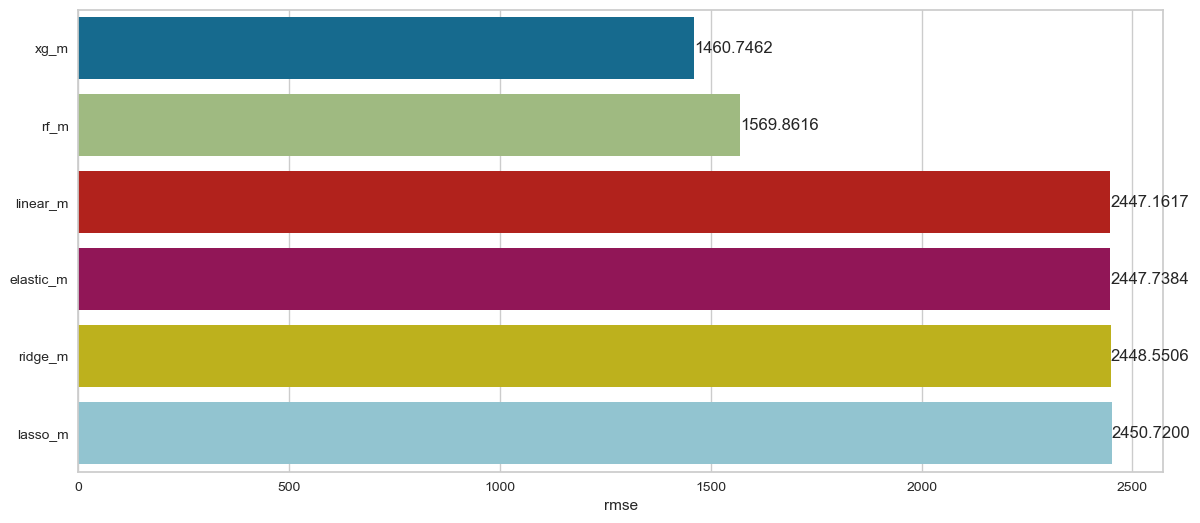

In [232]:
for i, j in enumerate(scores):
    plt.figure(i)
    if j == "r2_score":
        ascending = False # if our metric is r2_score the barplot will be sorted from largest to smallest
    else:
        ascending = True # if our metric is mae or rmse then barplot will be sorted from smallest to largest
    compare = scores.sort_values(by=j, ascending=ascending) # reorders compare df by corresponding metric
    ax = sns.barplot(x = compare[j] , y= compare.index) # The metric scores of compare[j] are drawn sequentially from compare df
                                                        # and visualized in the barplot.
                                                        # y=compare.index will write the model names on the y-axis of our image.
    ax.bar_label(ax.containers[0], fmt="%.4f");

In [233]:
#From here, we can see that XG boost model is betten than others in the scores, but i has a lot of overfitting. Also,
# When applying it AWS, it will not work perfectly as they do not finish it yet. So, i am going with the second option
# which is random forest.

## Using the features from feature importance only

In [181]:
#Creating a new dataframe from the first dataframe
df_co = df.copy()
df_co.head()

make_model body_type  price        km  Type     Fuel  Gears  \
0    Audi A1    Sedans  15770 56013.000  Used   Diesel  7.000   
1    Audi A1    Sedans  14500 80000.000  Used  Benzine  7.000   
2    Audi A1    Sedans  14640 83450.000  Used   Diesel  7.000   
3    Audi A1    Sedans  14500 73000.000  Used   Diesel  6.000   
4    Audi A1    Sedans  16790 16200.000  Used   Diesel  7.000   

   Comfort_Convenience  Entertainment_Media  Extras  Safety_Security   age  \
0                   16                    4       3               14 3.000   
1                    9                    5       4               15 2.000   
2                   13                    2       2               12 3.000   
3                   16                    8       3               14 3.000   
4                   13                    7       4               13 3.000   

   Previous_Owners   hp_kW  Inspection_new Paint_Type Upholstery_type  \
0            2.000  66.000               1   Metallic           Cloth   
1            1.000 141.000               0   Metallic           Cloth   
2            1.000  85.000               0   Metallic           Cloth   
3            1.000  66.000               0   Metallic           Cloth   
4            1.000  66.000               1   Metallic           Cloth   

  Gearing_Type  Displacement_cc  Weight_kg Drive_chain  cons_comb  
0    Automatic         1422.000   1220.000       front      3.800  
1    Automatic         1798.000   1255.000       front      5.600  
2    Automatic         1598.000   1135.000       front      3.800  
3    Automatic         1422.000   1195.000       front      3.800  
4    Automatic         1422.000   1135.000       front      4.100

In [182]:
#Seeing the columns of df_co
df_co.columns

Index(['make_model', 'body_type', 'price', 'km', 'Type', 'Fuel', 'Gears',
       'Comfort_Convenience', 'Entertainment_Media', 'Extras',
       'Safety_Security', 'age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Displacement_cc',
       'Weight_kg', 'Drive_chain', 'cons_comb'],
      dtype='object')

In [183]:
#Seeing the columns of df
df.columns

Index(['make_model', 'body_type', 'price', 'km', 'Type', 'Fuel', 'Gears',
       'Comfort_Convenience', 'Entertainment_Media', 'Extras',
       'Safety_Security', 'age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Displacement_cc',
       'Weight_kg', 'Drive_chain', 'cons_comb'],
      dtype='object')

In [184]:
#Dropping the unnecessary columns
df_co = df_co.drop(['body_type', 'Displacement_cc', 'Type',  'Fuel', 'Comfort_Convenience', 'Entertainment_Media', 'Extras','Safety_Security', 'Previous_Owners', 'Inspection_new','Paint_Type', 'Upholstery_type','Drive_chain', 'cons_comb'], axis=1)

df_co.reset_index(drop=True, inplace=True)
#Seeing the head
df_co.head()
#As we can see, we do not have all of the columns now


#['hp_kW', 'age', 'km', 'Gears', 'make_model', 'Weight_kg', 'Gearing_Type' ]

make_model  price        km  Gears   age   hp_kW Gearing_Type  Weight_kg
0    Audi A1  15770 56013.000  7.000 3.000  66.000    Automatic   1220.000
1    Audi A1  14500 80000.000  7.000 2.000 141.000    Automatic   1255.000
2    Audi A1  14640 83450.000  7.000 3.000  85.000    Automatic   1135.000
3    Audi A1  14500 73000.000  6.000 3.000  66.000    Automatic   1195.000
4    Audi A1  16790 16200.000  7.000 3.000  66.000    Automatic   1135.000

## Modeling

### Train | Test Split

In [185]:
#Splitting the data to X and y
X= df_co.drop(columns="price")
y= df_co.price

In [186]:
#Seeing the head of X
X.head()

make_model        km  Gears   age   hp_kW Gearing_Type  Weight_kg
0    Audi A1 56013.000  7.000 3.000  66.000    Automatic   1220.000
1    Audi A1 80000.000  7.000 2.000 141.000    Automatic   1255.000
2    Audi A1 83450.000  7.000 3.000  85.000    Automatic   1135.000
3    Audi A1 73000.000  6.000 3.000  66.000    Automatic   1195.000
4    Audi A1 16200.000  7.000 3.000  66.000    Automatic   1135.000

In [187]:
#seeing the head of y
y.head()

0    15770
1    14500
2    14640
3    14500
4    16790
Name: price, dtype: int64

In [188]:
#Seeing the shape of X and y
print('X shape is:', X.shape)
print('y shape is:', y.shape)

X shape is: (14070, 7)
y shape is: (14070,)


In [189]:
#Splitting the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t, random_state=s)

In [190]:
#Seeing the shape of X_train and X_test
print('X_train, shape is:', X_train.shape)
print('X_test shape is:', X_test.shape)


#Seeing the shape of y_train and y_test
print('y_train, shape is:', y_train.shape)
print('y_test shape is:', y_test.shape)

X_train, shape is: (11256, 7)
X_test shape is: (2814, 7)
y_train, shape is: (11256,)
y_test shape is: (2814,)


In [191]:
#Seeing the head of X_train
X_train.head()

make_model         km  Gears   age   hp_kW Gearing_Type  Weight_kg
8940       Opel Corsa      9.000  6.000 0.000  66.000    Automatic   1163.000
13846  Renault Espace  21709.000  6.000 2.000 118.000    Automatic   1734.000
11299   Opel Insignia   1647.363  6.000 0.000 100.000    Automatic   1487.000
2917          Audi A3 156000.000  6.000 3.000  81.000       Manual   1335.000
10757   Opel Insignia  29900.000  6.000 1.000 125.000    Automatic   1487.000

In [192]:
#Seeing the head of X_test
X_test.head()

make_model        km  Gears   age   hp_kW Gearing_Type  Weight_kg
2102         Audi A1  4500.000  5.000 0.000  66.000       Manual   1135.000
1985         Audi A1  7500.000  7.000 0.000  85.000    Automatic   1680.000
11586  Opel Insignia  1647.363  6.000 0.000 121.000       Manual   1487.000
666          Audi A1 11707.000  5.000 1.000  60.000       Manual   1110.000
7666      Opel Corsa 22635.000  6.000 3.000  66.000    Automatic   1203.000

In [193]:
#Seeing the head of y_train
y_train.head()

8940     16990
13846    29990
11299    34490
2917     11990
10757    23970
Name: price, dtype: int64

In [194]:
#Seeing the head of y_test
y_test.head()

2102     20000
1985     24999
11586    33335
666      14220
7666     11990
Name: price, dtype: int64

In [198]:
#Seeing the object classes in the data set
df_co.select_dtypes(include="object").head(1)

make_model Gearing_Type
0    Audi A1    Automatic

In [199]:
cat_v = X_train.select_dtypes("object").columns
cat_v

Index(['make_model', 'Gearing_Type'], dtype='object')

In [200]:
#Creating ordinal encoder
ord_enc = OrdinalEncoder()
trans = make_column_transformer((ord_enc, cat_v), remainder='passthrough', verbose_feature_names_out=False).set_output(transform="pandas") 

In [201]:
#Seeing the head of X_train
X_train.head()

make_model         km  Gears   age   hp_kW Gearing_Type  Weight_kg
8940       Opel Corsa      9.000  6.000 0.000  66.000    Automatic   1163.000
13846  Renault Espace  21709.000  6.000 2.000 118.000    Automatic   1734.000
11299   Opel Insignia   1647.363  6.000 0.000 100.000    Automatic   1487.000
2917          Audi A3 156000.000  6.000 3.000  81.000       Manual   1335.000
10757   Opel Insignia  29900.000  6.000 1.000 125.000    Automatic   1487.000

In [202]:
#Fitting the trans with X_train
X_train_trans = trans.fit_transform(X_train)

#Fitting the trans with X_test
X_test_trans = trans.transform(X_test)

In [203]:
#Seeing X_train_trans after converting
X_train_trans

make_model  Gearing_Type         km  Gears   age   hp_kW  Weight_kg
8940        3.000         0.000      9.000  6.000 0.000  66.000   1163.000
13846       6.000         0.000  21709.000  6.000 2.000 118.000   1734.000
11299       4.000         0.000   1647.363  6.000 0.000 100.000   1487.000
2917        1.000         1.000 156000.000  6.000 3.000  81.000   1335.000
10757       4.000         0.000  29900.000  6.000 1.000 125.000   1487.000
...           ...           ...        ...    ...   ...     ...        ...
5695        2.000         1.000  36600.000  5.000 3.000  77.000   1263.000
8006        3.000         0.000   8930.000  6.000 1.000  66.000   1203.000
1361        0.000         0.000   7987.000  7.000 1.000 141.000   1135.000
1547        0.000         0.000   6600.000  7.000 1.000  85.000   1135.000
13151       5.000         1.000   1647.363  5.000 0.000  66.000   1084.000

[11256 rows x 7 columns]

In [204]:
#Seeing X_train without transforming or using encoder on it
X_train

make_model         km  Gears   age   hp_kW Gearing_Type  Weight_kg
8940       Opel Corsa      9.000  6.000 0.000  66.000    Automatic   1163.000
13846  Renault Espace  21709.000  6.000 2.000 118.000    Automatic   1734.000
11299   Opel Insignia   1647.363  6.000 0.000 100.000    Automatic   1487.000
2917          Audi A3 156000.000  6.000 3.000  81.000       Manual   1335.000
10757   Opel Insignia  29900.000  6.000 1.000 125.000    Automatic   1487.000
...               ...        ...    ...   ...     ...          ...        ...
5695       Opel Astra  36600.000  5.000 3.000  77.000       Manual   1263.000
8006       Opel Corsa   8930.000  6.000 1.000  66.000    Automatic   1203.000
1361          Audi A1   7987.000  7.000 1.000 141.000    Automatic   1135.000
1547          Audi A1   6600.000  7.000 1.000  85.000    Automatic   1135.000
13151    Renault Clio   1647.363  5.000 0.000  66.000       Manual   1084.000

[11256 rows x 7 columns]

In [205]:
#Seeing the shape of X_train_trans and X_test_trans
X_train_trans.shape, X_test_trans.shape 

((11256, 7), (2814, 7))

In [206]:
#Seeing the head of X_train_trans
X_train_trans.head()

make_model  Gearing_Type         km  Gears   age   hp_kW  Weight_kg
8940        3.000         0.000      9.000  6.000 0.000  66.000   1163.000
13846       6.000         0.000  21709.000  6.000 2.000 118.000   1734.000
11299       4.000         0.000   1647.363  6.000 0.000 100.000   1487.000
2917        1.000         1.000 156000.000  6.000 3.000  81.000   1335.000
10757       4.000         0.000  29900.000  6.000 1.000 125.000   1487.000

In [207]:
#Seeing the head of X_test_trans
X_test_trans.head()

make_model  Gearing_Type        km  Gears   age   hp_kW  Weight_kg
2102        0.000         1.000  4500.000  5.000 0.000  66.000   1135.000
1985        0.000         0.000  7500.000  7.000 0.000  85.000   1680.000
11586       4.000         1.000  1647.363  6.000 0.000 121.000   1487.000
666         0.000         1.000 11707.000  5.000 1.000  60.000   1110.000
7666        3.000         0.000 22635.000  6.000 3.000  66.000   1203.000

In [208]:
#Creating the model of rf with the best params
rf_model = RandomForestRegressor(random_state=s)

#the operations of the pipeline
operations = [("encoder", trans), ("RF_model", rf_model)]
#Creating the pipeline
pipe_rf = Pipeline(steps=operations)
#Fitting the model with the training data
pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  Index(['make_model', 'Gearing_Type'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('RF_model', RandomForestRegressor(random_state=101))])

In [209]:
#Seeing the result
eval(pipe_rf, X_train, y_train, X_test, y_test)
#As we can see, there is an overfitting

train        test
R2        0.984       0.934
mae     502.918    1123.807
mse  736533.190 3033006.621
rmse    858.215    1741.553

In [210]:
#Creating the params of gridSearch
param_grid = {
    "RF_model__n_estimators": [200, 300, 400],
    "RF_model__max_depth": [6, 8, 10],
    'RF_model__max_features':[2, 4,'sqrt'],
}
rf = RandomForestRegressor(random_state=s)
#Creating the operations of the gridSearch
operations = [("encoder", trans), ("RF_model", rf)]
# Creating a pipeline with the operations as steps
gr_rf2 = Pipeline(steps=operations)

#Creating the gridSearch
rf_grid2 = GridSearchCV(gr_rf2,
                          param_grid=param_grid,
                          scoring= scoring2,
                          cv=5,
                          verbose=1,
                          return_train_score=True)
#Fitting the gridSearch 
rf_grid2.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(),
                                                                         Index(['make_model', 'Gearing_Type'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('RF_model',
                                        RandomForestRegressor(random_state=101))]),
             param_grid={'RF_model__max_depth': [6, 8, 10],
                         'RF_model__max_features': [2, 4, 'sqrt'],
                         'RF_model__n_estimators': [200, 300, 400]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

In [211]:
#Seeing the best params of the gridSearch to use it 
rf_grid2.best_params_

{'RF_model__max_depth': 10,
 'RF_model__max_features': 4,
 'RF_model__n_estimators': 300}

In [212]:
#seeing the result of the grid search model
eval(rf_grid2, X_train, y_train, X_test, y_test)
#From here, we can see that the result is better now, but for mse, it is still huge.

train        test
R2         0.955       0.940
mae      984.458    1121.068
mse  2047191.461 2736831.357
rmse    1430.801    1654.337

In [213]:
#Creating the model of rf with the best params
rf_model = RandomForestRegressor(max_depth= 10, max_features = 4, n_estimators= 300,  random_state=s)

#the operations of the pipeline
operations = [("encoder", trans), ("RF_model", rf_model)]
#Creating the pipeline
pipe_rf_m = Pipeline(steps=operations)
#Fitting the model with the training data
pipe_rf_m.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  Index(['make_model', 'Gearing_Type'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestRegressor(max_depth=10, max_features=4,
                                       n_estimators=300, random_state=101))])

In [214]:
#seeing the result of the grid search model
eval(pipe_rf_m, X_train, y_train, X_test, y_test)
#From here, we can see that the result is better now, but for mse, it is still huge.

train        test
R2         0.955       0.940
mae      984.458    1121.068
mse  2047191.461 2736831.357
rmse    1430.801    1654.337

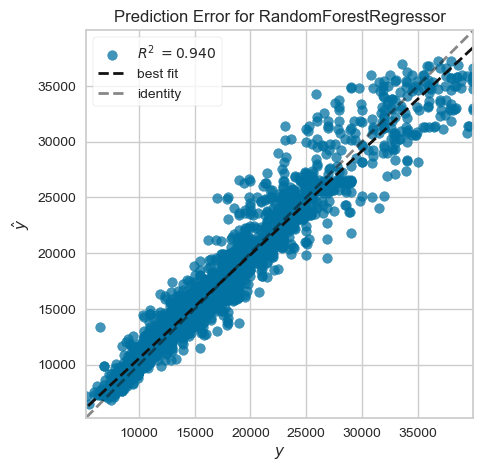

In [215]:
#Visualizing the result
visualizer = RadViz(size=(500, 1000))

visualizer = PredictionError(pipe_rf_m)
visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data
visualizer.show();
#As we can see, there are some difference between the acual and the predicted line, it nearly started to be different from around 30000

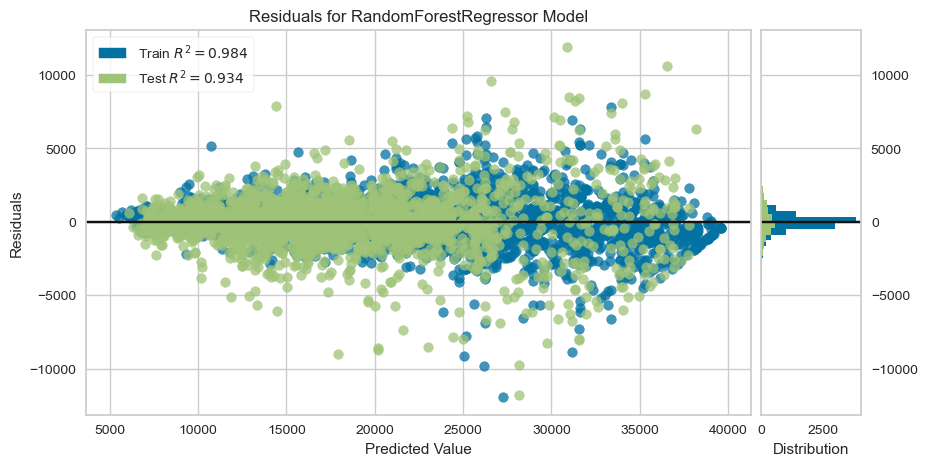

In [216]:
#Seeing the result with train and test for r2
visualizer = RadViz(size=(1000, 500))
visualizer = ResidualsPlot(pipe_rf)

visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data
visualizer.show();
#As we can see, there are some mistakes, and it started from about 30000

In [217]:
#Prediction X_test
y_pred = pipe_rf.predict(X_test)

## Final Modle

In [218]:
#Creating the model of rf with the best params
rf = RandomForestRegressor(max_depth= 10, max_features = 4, n_estimators= 300,  random_state=s)

#the operations of the pipeline
operations = [("encoder", trans), ("RF_model", rf)]
#Creating the pipeline
final_rf = Pipeline(steps=operations)
#Fitting the model with the whole data
final_rf.fit(X, y)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  Index(['make_model', 'Gearing_Type'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestRegressor(max_depth=10, max_features=4,
                                       n_estimators=300, random_state=101))])

In [220]:
df_co.columns

Index(['make_model', 'price', 'km', 'Gears', 'age', 'hp_kW', 'Gearing_Type',
       'Weight_kg'],
      dtype='object')

In [221]:
df_co.Weight_kg

0       1220.000
1       1255.000
2       1135.000
3       1195.000
4       1135.000
          ...   
14065   1734.000
14066   1758.000
14067   1734.000
14068   1708.000
14069   1734.000
Name: Weight_kg, Length: 14070, dtype: float64

In [222]:
df_co['Gearing_Type']

0        Automatic
1        Automatic
2        Automatic
3        Automatic
4        Automatic
           ...    
14065    Automatic
14066    Automatic
14067    Automatic
14068    Automatic
14069    Automatic
Name: Gearing_Type, Length: 14070, dtype: object

In [224]:
my_dict = {
    'make_model': 'Renault Espace',
    'km': 80000.000,
    'Type': 'Used', 
    'Gears': 7.000, 
    'age': 2.000,
    'hp_kW': 66.000,
    'Gearing_Type': 'Automatic',
    'Weight_kg': 1734.000,
}

In [225]:
data = pd.DataFrame.from_dict([my_dict])
data

make_model        km  Type  Gears   age  hp_kW Gearing_Type  Weight_kg
0  Renault Espace 80000.000  Used  7.000 2.000 66.000    Automatic   1734.000

In [226]:
prediction = final_rf.predict(data)
print(prediction)

[15154.94148048]


In [227]:
print("The estimated price is {}. ".format(int(prediction[0])))

The estimated price is 15154. 


## Saving the model

In [228]:
pickle.dump(final_rf, open('final_rf', 'wb'))

In [229]:
new_model = pickle.load(open('final_rf', 'rb'))